## Ciclos de vida de las cigarras

In [30]:
# Preámbulo
import itertools as it
import pandas as pd
import matplotlib.pyplot as plt
from math import ceil, lcm

In [ ]:
# Parámetros
# Parámetros variables
L = list(range(2,21)) # Longitudes del ciclo
C = list(range(4, 12)) # Longitudes del ciclo de depredadores
# Parámetros fijos
K = 10000 # Capacidad total de carga
Q = 2500 # Capacidad de carga de los depredadores
x0 = 100 # Población inicial de ninfas
y0 = 10 # Población inicial de crias de depredadores
f = 10 # Ninfas por cigarra
g = 10 # Crias por depredador
alfa = 0.95 # Ratio de supervivencia (cicadas y depredadores)
k = 10 # Ciclos de depredadores por ciclo de ninfas a simular

In [32]:
# Funciones de evolución de la población de cigarras
def calc_crias(df, i, f, alfa, L, tipo = 'cicadas'): # Número de crias producidas
    col = 'Emergentes' if tipo == 'cicadas' else 'Dep Adultos'
    umbral = df.loc[i, 'Dep Adultos'] if tipo == 'cicadas' else max(0, df.loc[i, 'Dep Adultos'] - df.loc[i, 'Emergentes'])
    Hn = f * max((df.loc[max(0, i), col] - umbral), 0)
    return ceil(Hn)

def calc_carga(df, i, K, L, alfa, tipo = 'cicadas'): # Carga residual
    sum = 0
    col = 'x' if tipo == 'cicadas' else 'y'
    for j in range(1, L):
        sum += df.loc[max(0, i-j), col] * pow(alfa, j)
    Kn = K - sum
    if Kn < 0:
        return 0
    return ceil(Kn)

def calc_adultos(df, i, alfa, L, tipo = 'cicadas'): # Número de cicadas emergentes o depredadores adultos
    col = 'x' if tipo == 'cicadas' else 'y'
    return ceil(df.loc[max(i-L,0), col] * pow(alfa, L))

def calc_xn(df, i, tipo = 'cicadas'): # Crias
    col_producidas = 'H' if tipo == 'cicadas' else 'G'
    col_carga = 'K res' if tipo == 'cicadas' else 'Q res'
    return ceil(min(df.loc[i, col_producidas], df.loc[i, col_carga]))

In [33]:
# Funciones de simulación y graficación
def simulacion(x0, y0, K, Q, k, alfa, L, C, f, g): # Simula y genera un DataFrame con los resultados
    n = k * C * L  # Número de años a simular
    df = pd.DataFrame(index=range(n), columns=['x', 'y', 'K res', 'Q res', 'H', 'G', 'Dep Adultos', 'Emergentes'])
    df.loc[0, 'x'] = x0
    df.loc[0, 'y'] = y0
    df.loc[0, 'K res'] = K - x0
    df.loc[0, 'Q res'] = Q - y0
    df.loc[0, 'Dep Adultos'] = calc_adultos(df, 0, alfa, C, tipo='depredadores')
    df.loc[0, 'Emergentes'] = calc_adultos(df, 0, alfa, L)
    df.loc[0, 'G'] = calc_crias(df, 0, g, alfa, C, tipo='depredadores')
    df.loc[0, 'H'] = calc_crias(df, 0, f, alfa, L)

    for i in range(1, n):
        df.loc[i, 'Dep Adultos'] = calc_adultos(df, i, alfa, C, tipo='depredadores')
        df.loc[i, 'Emergentes'] = calc_adultos(df, i, alfa, L)
        df.loc[i, 'G'] = calc_crias(df, i, g, alfa, C, tipo='depredadores')
        df.loc[i, 'H'] = calc_crias(df, i, f, alfa, L)
        df.loc[i, 'Q res'] = calc_carga(df, i, Q, C, alfa, tipo='depredadores')
        df.loc[i, 'K res'] = calc_carga(df, i, K, L, alfa)
        df.loc[i, 'x'] = calc_xn(df, i)
        df.loc[i, 'y'] = calc_xn(df, i, tipo='depredadores')

    return df

def graficar(df, C, L):  # Genera un gráfico de lineas de la emergencia anual
    coincidencias = [i for i in df.index if i % L == 0 and i % C == 0]
    puntos = df.loc[coincidencias, 'Emergentes']
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.plot(df.index, df['Emergentes'], color='blue')
    ax.plot(df.index, df['Dep Adultos'], color='orange', label='Depredadores Adultos')
    ax.plot(coincidencias, puntos, 'ro', markersize=5, label='Coincidencias')
    ax.set_title(f"Emergencia anual para los parámetros C={C}, L={L}")
    ax.set_xlabel('Año')
    ax.set_ylabel('Emergentes')
    ax.grid(True)
    ax.legend()
    plt.show()

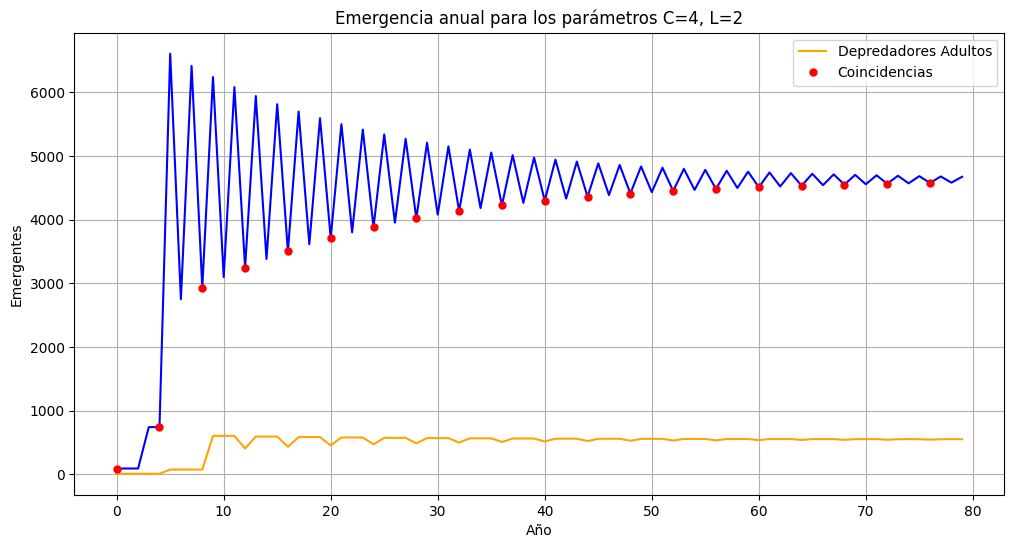

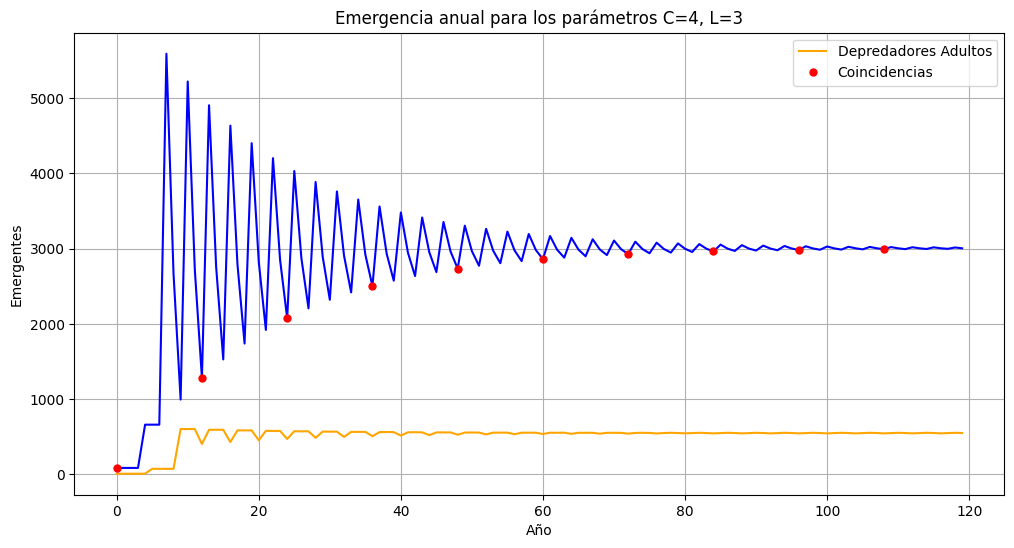

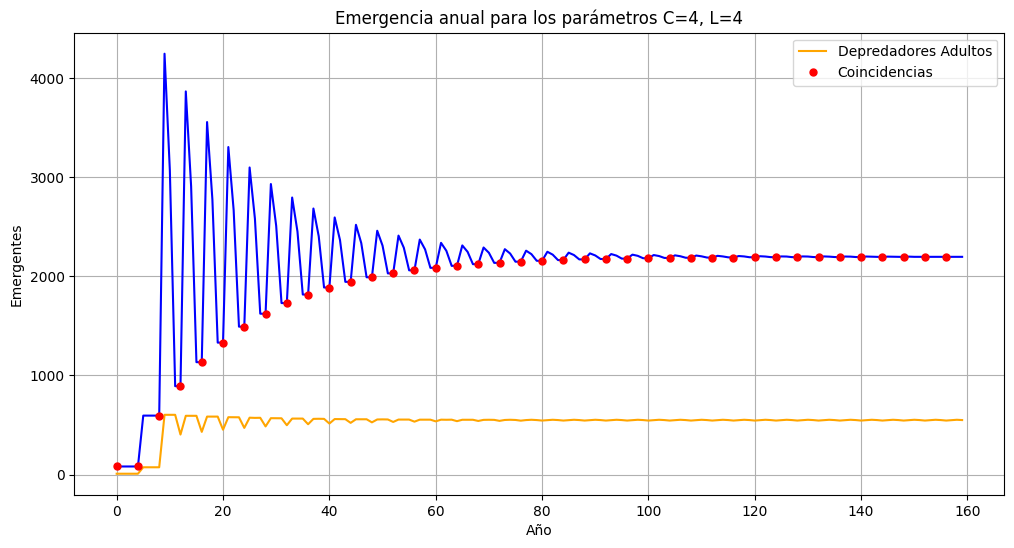

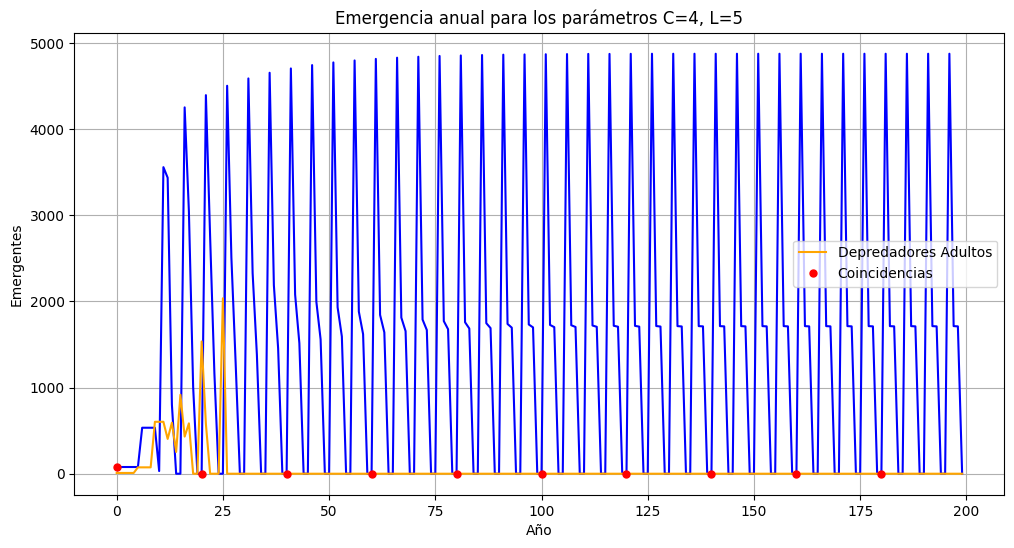

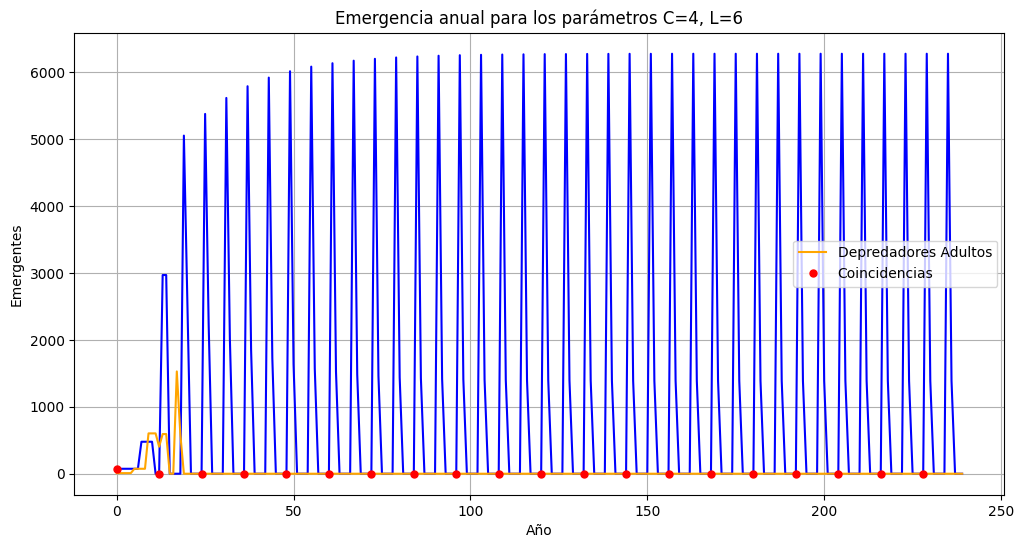

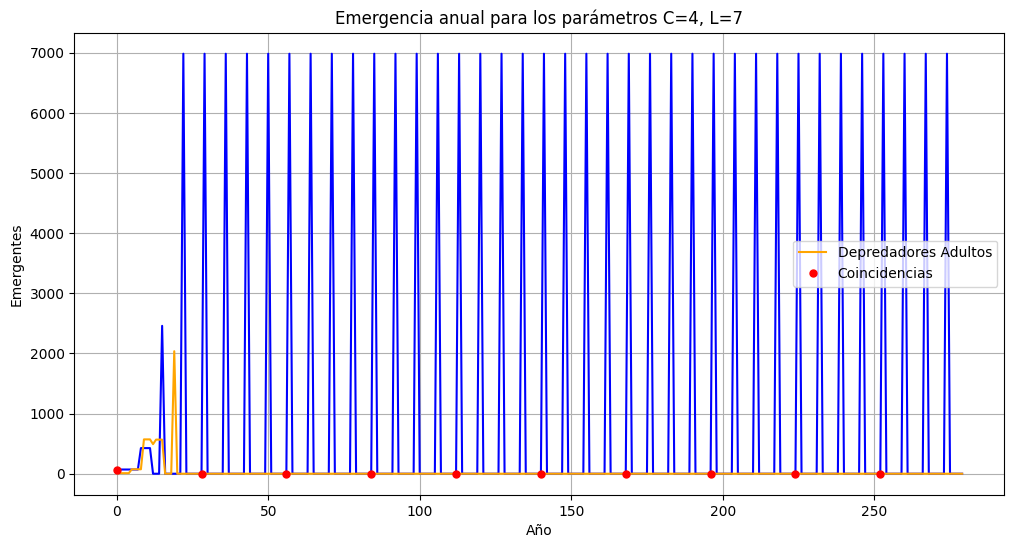

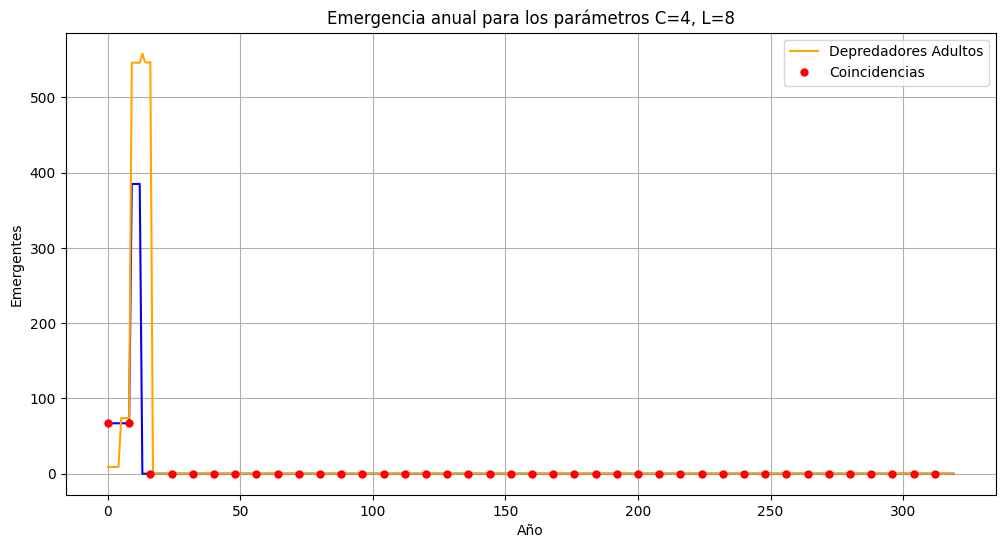

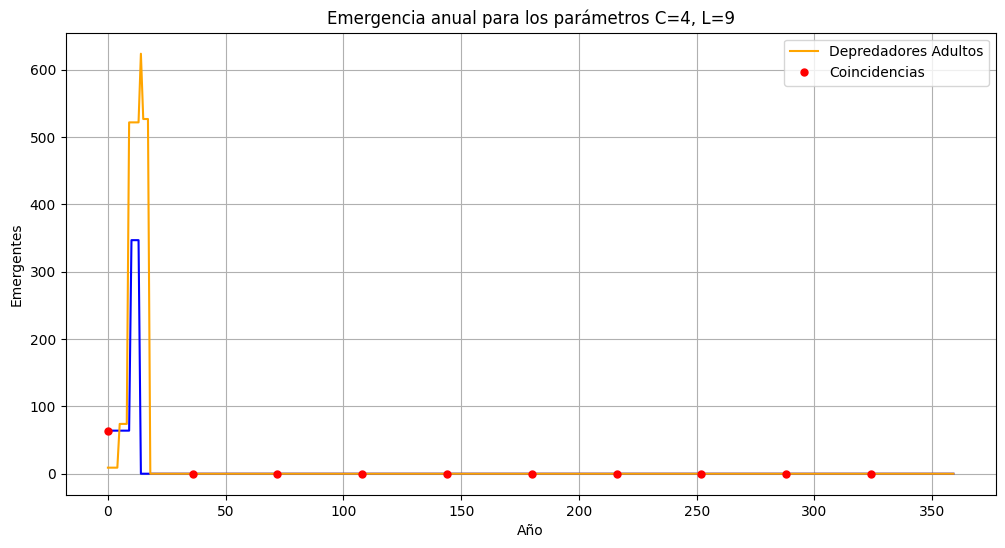

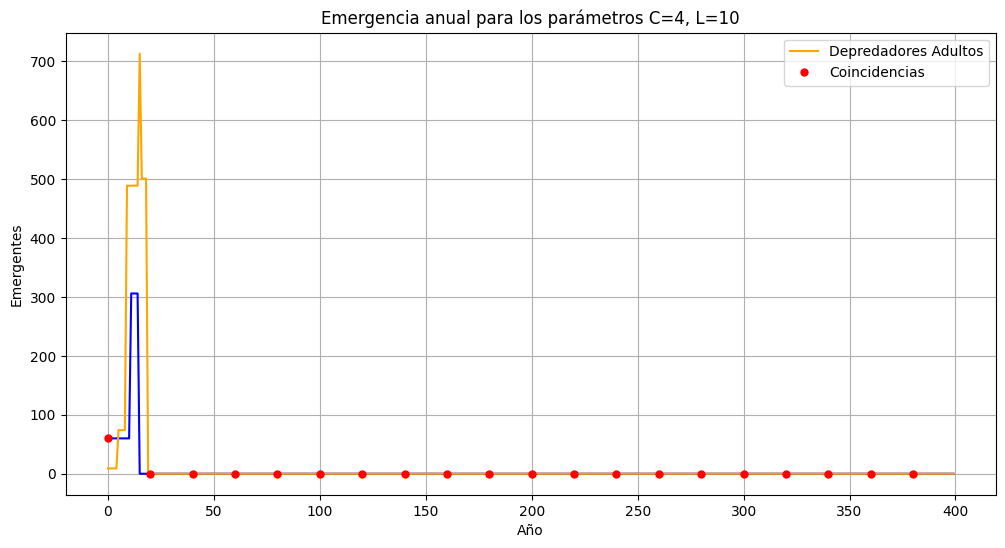

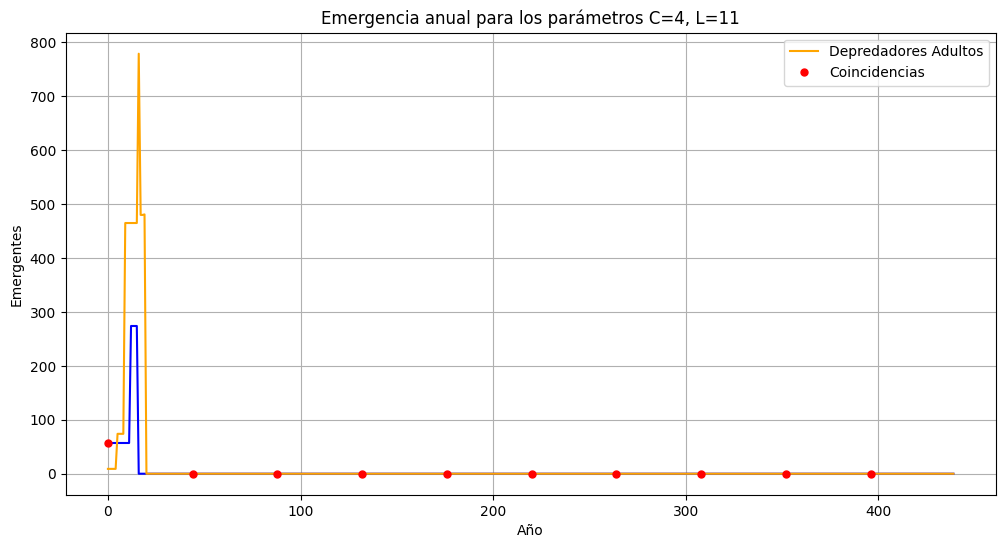

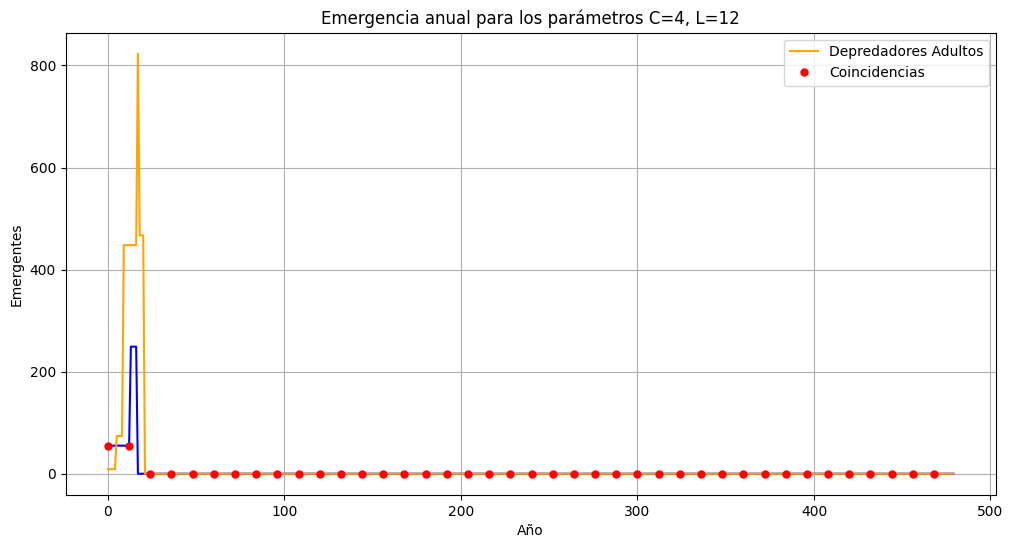

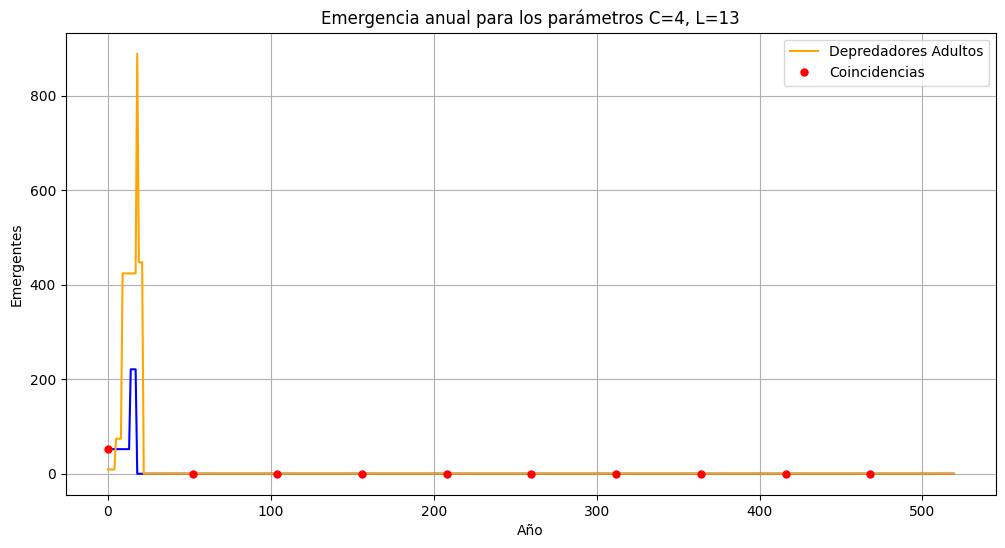

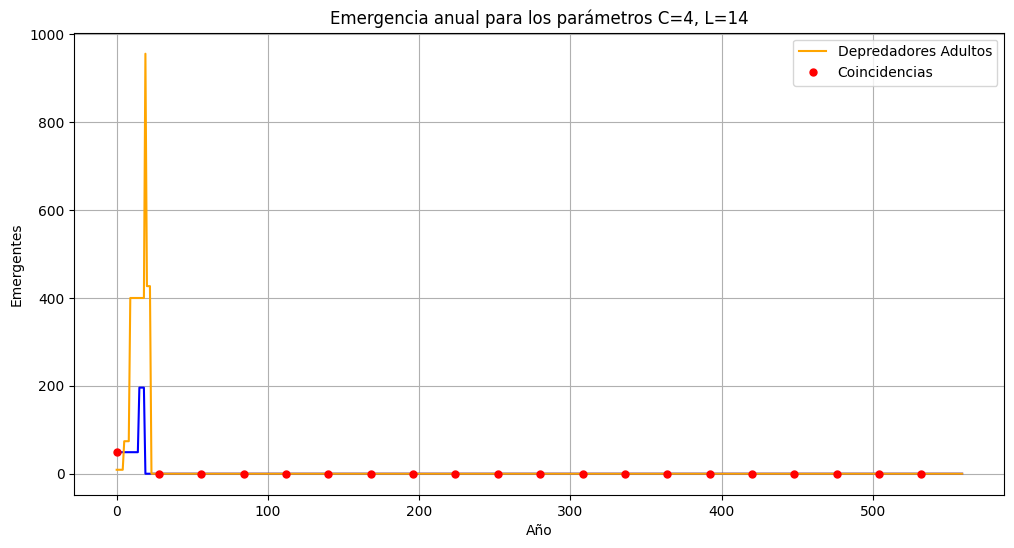

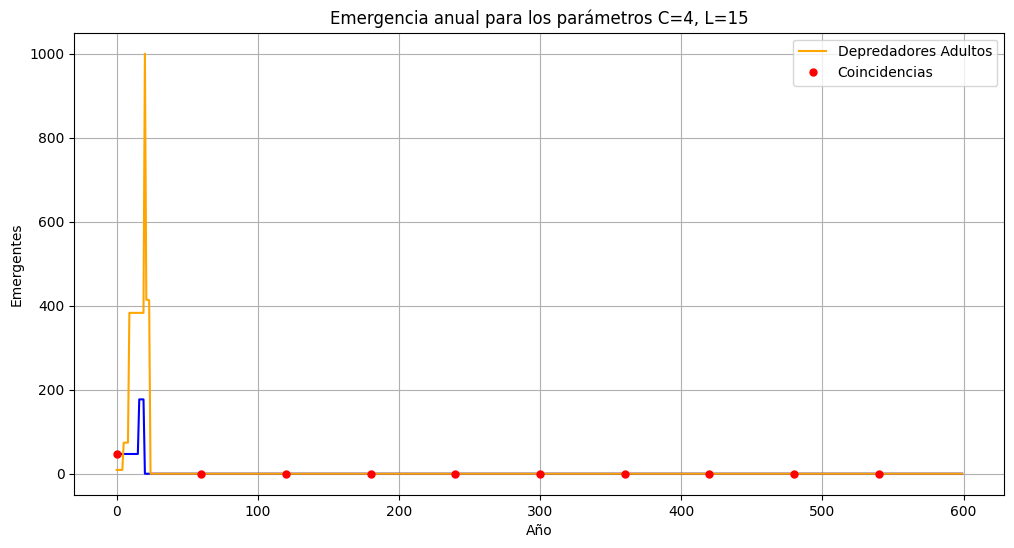

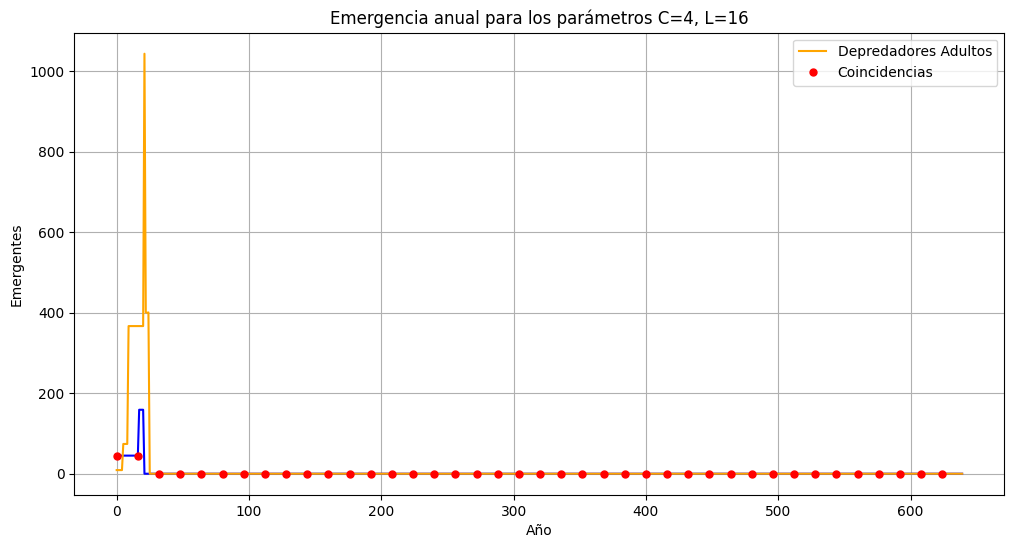

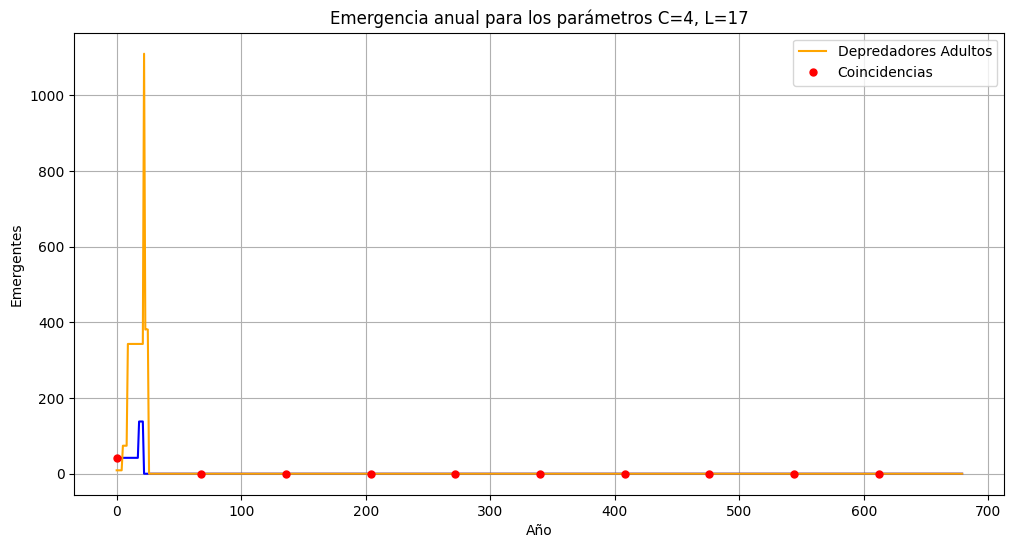

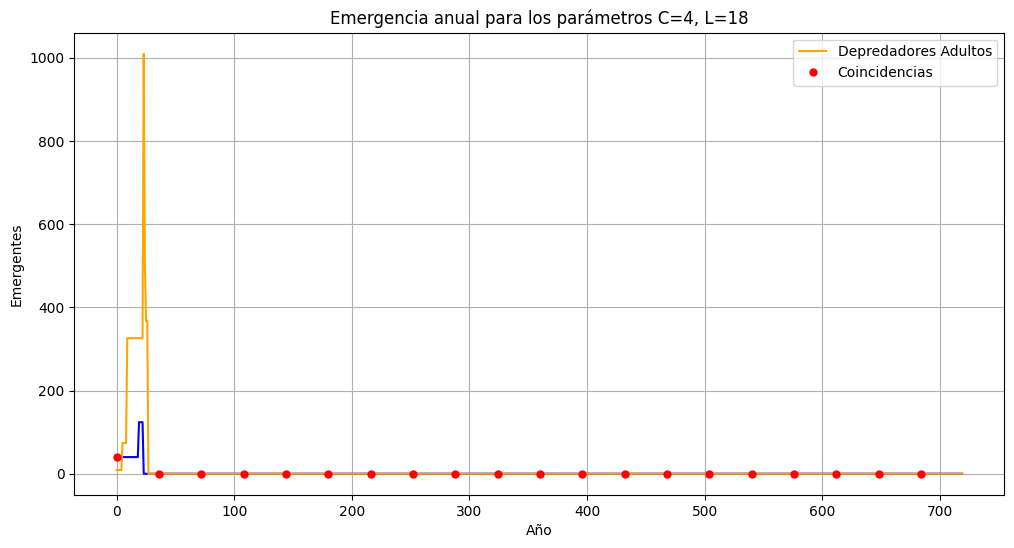

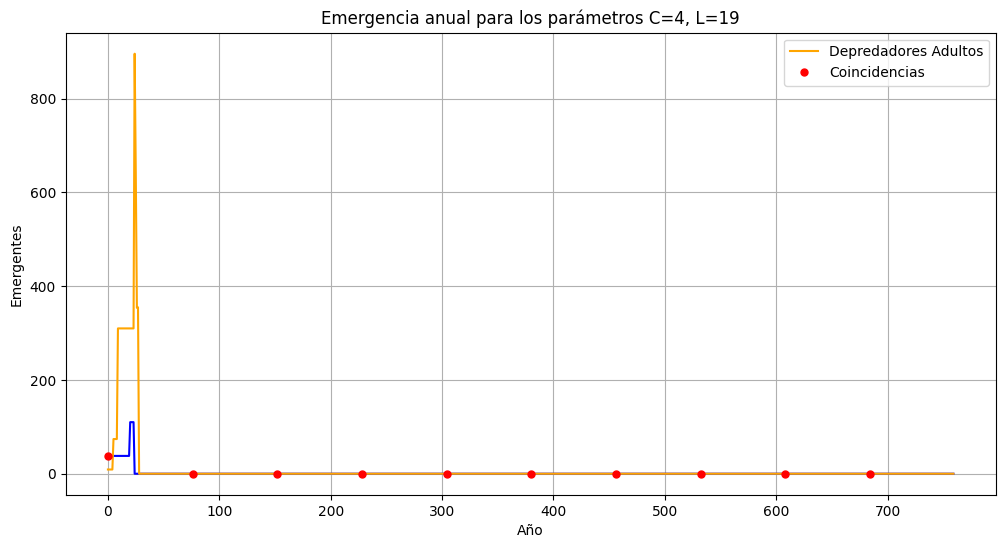

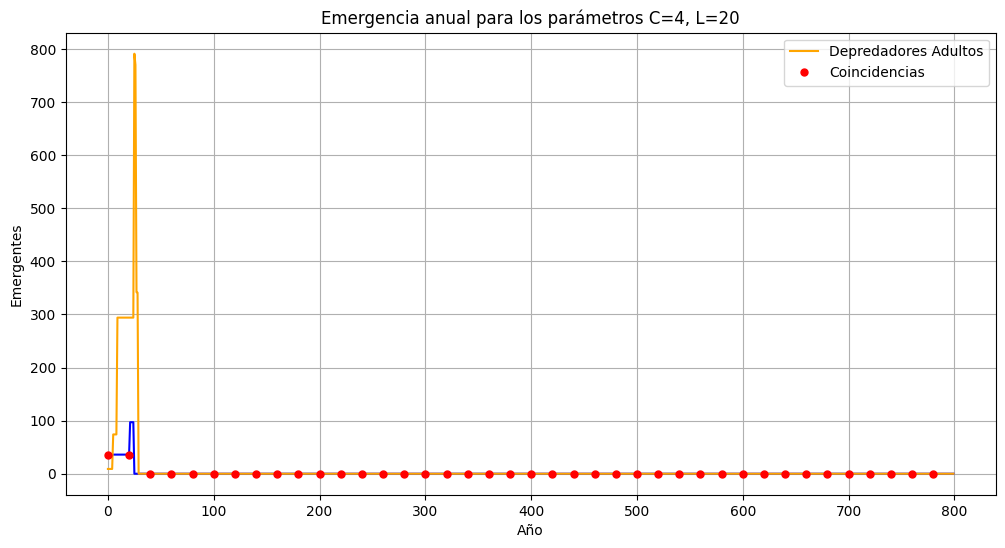

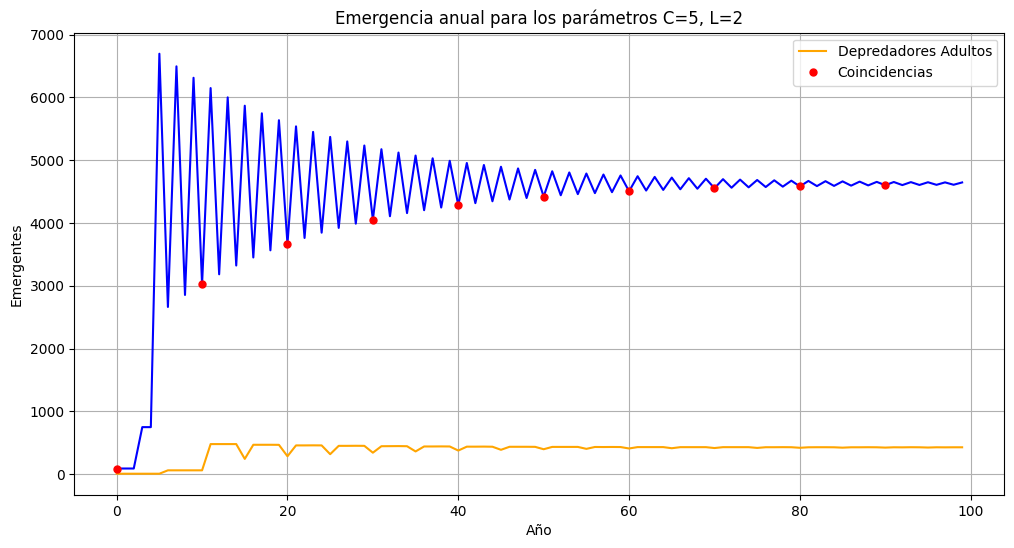

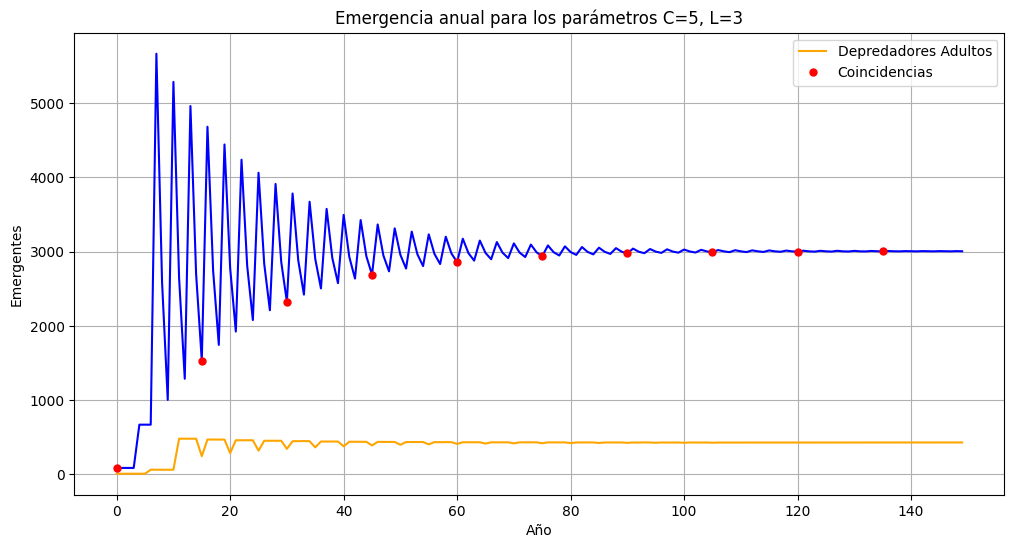

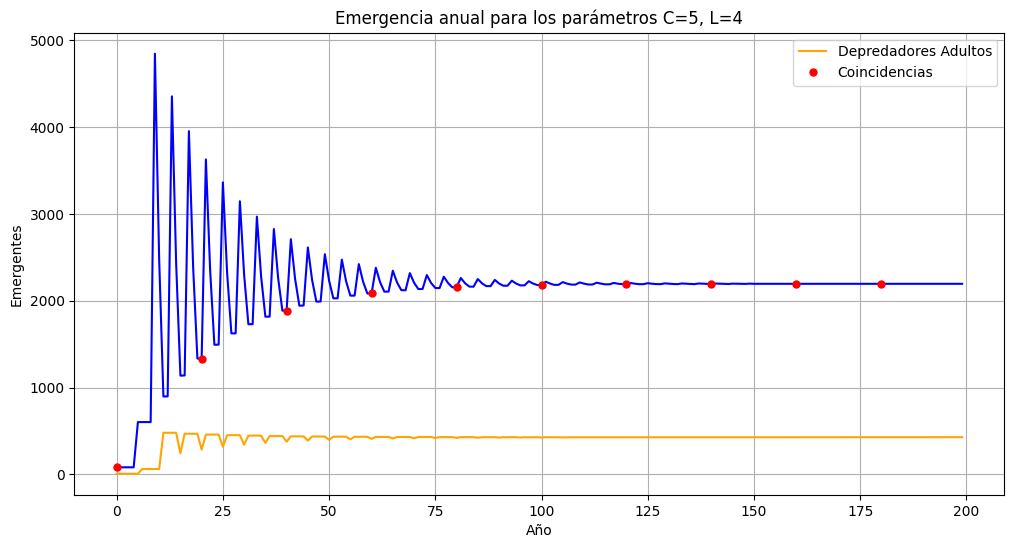

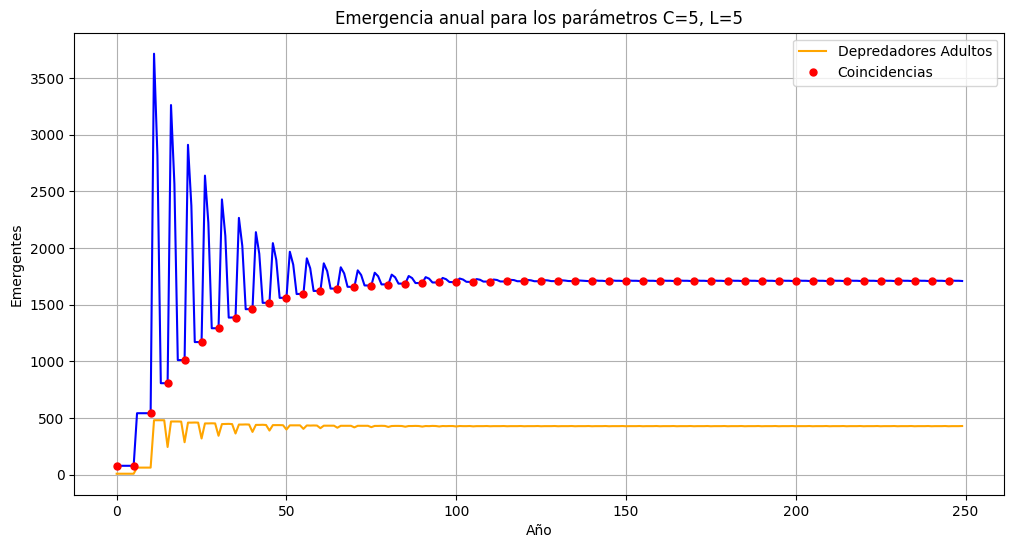

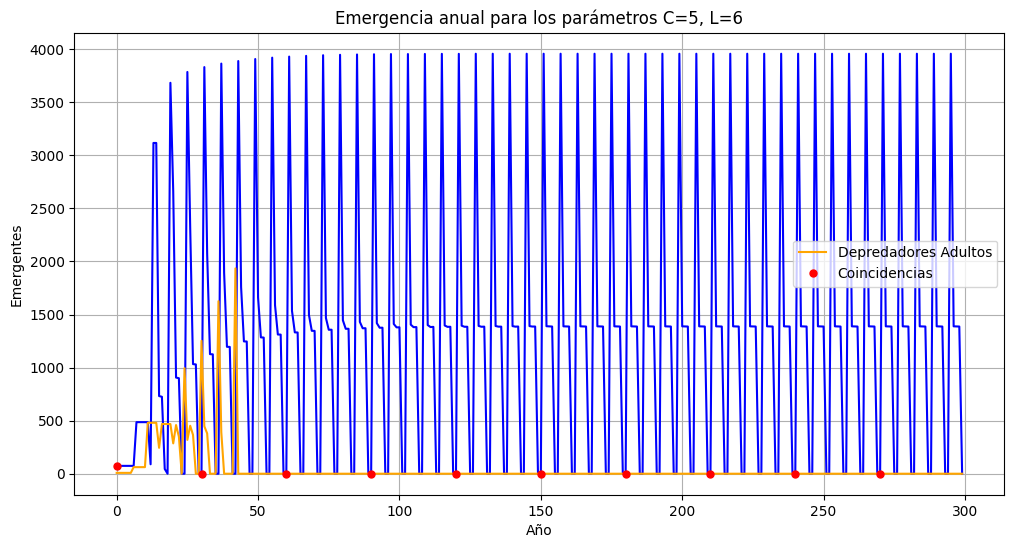

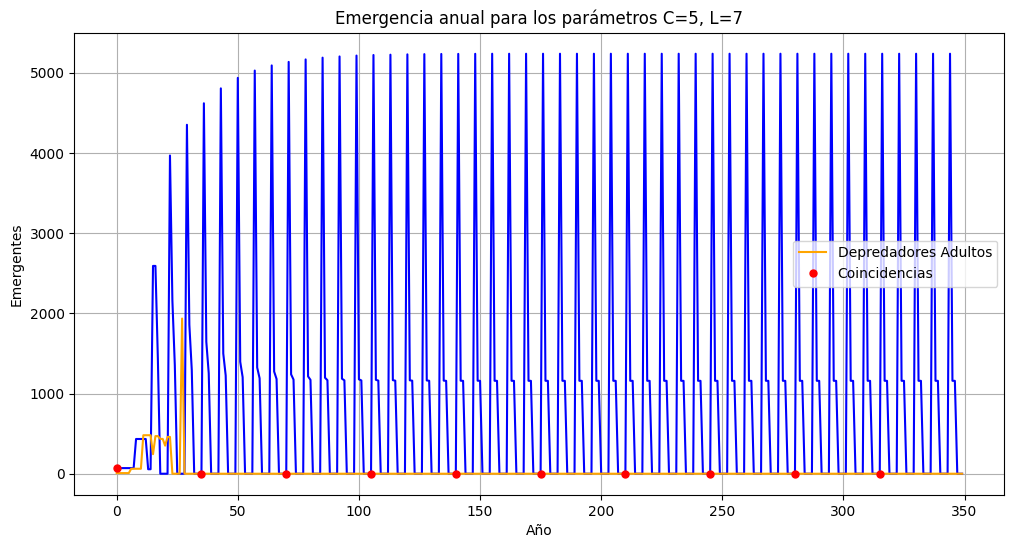

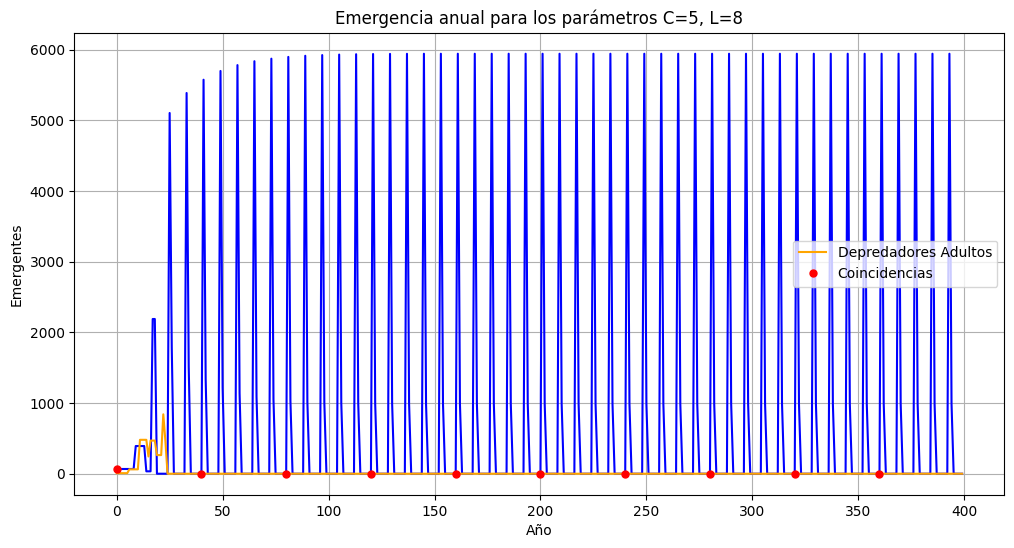

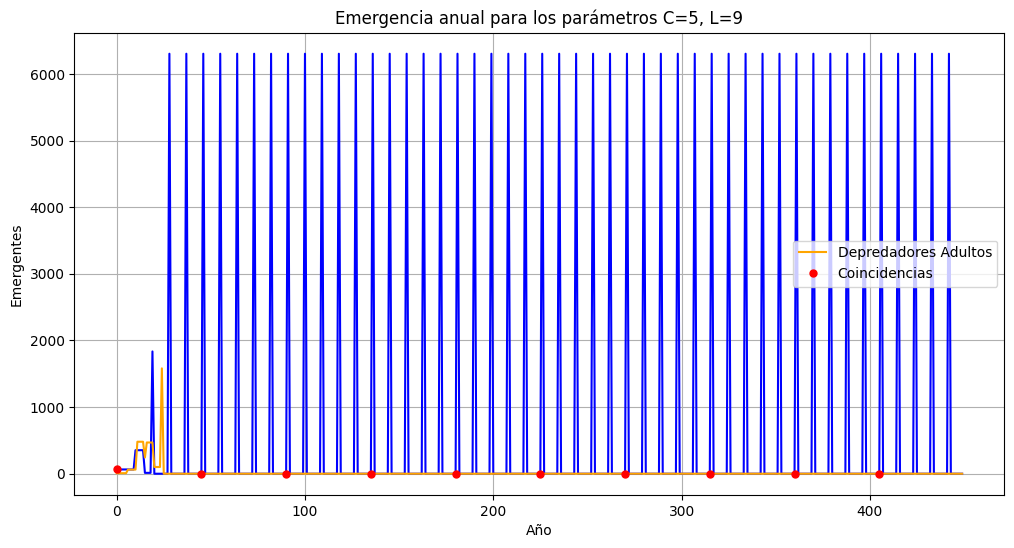

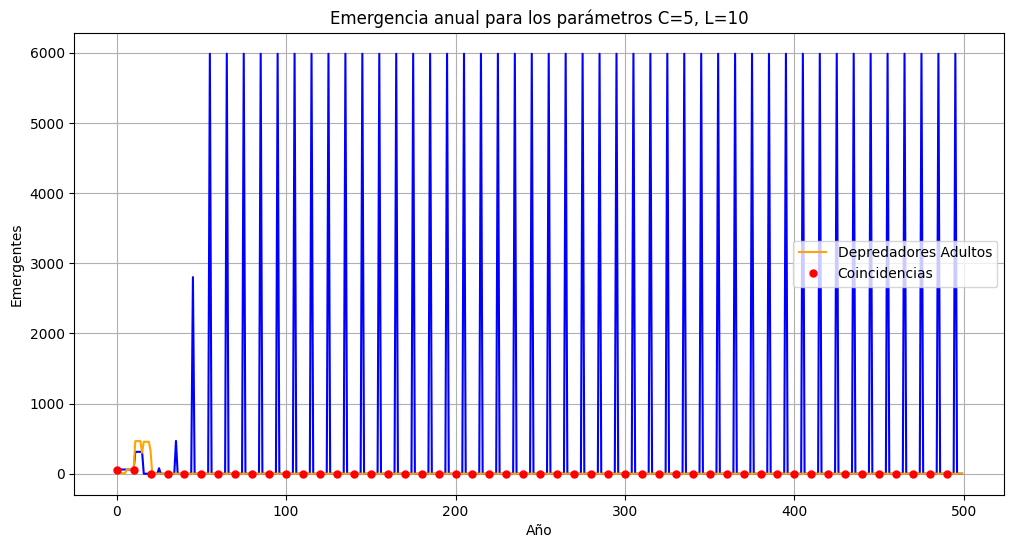

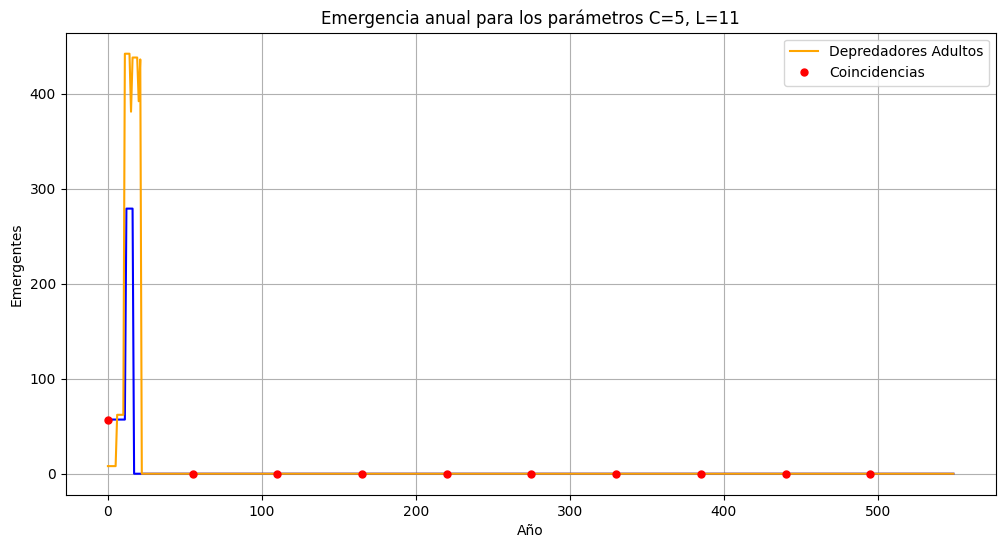

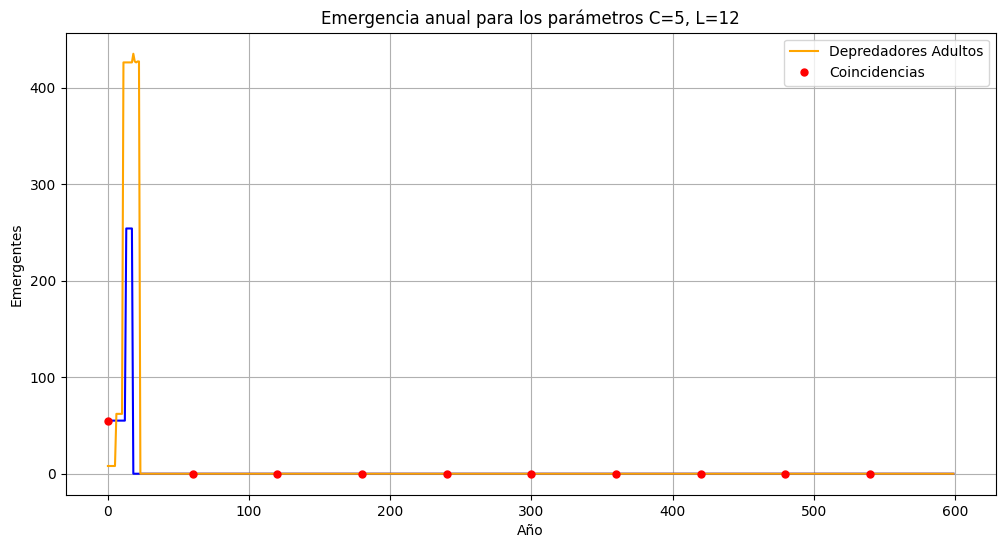

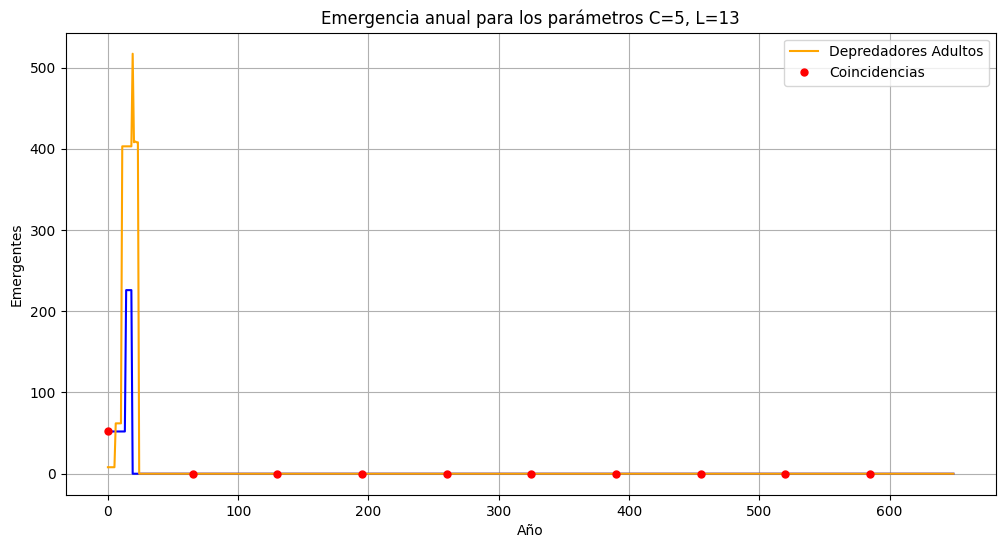

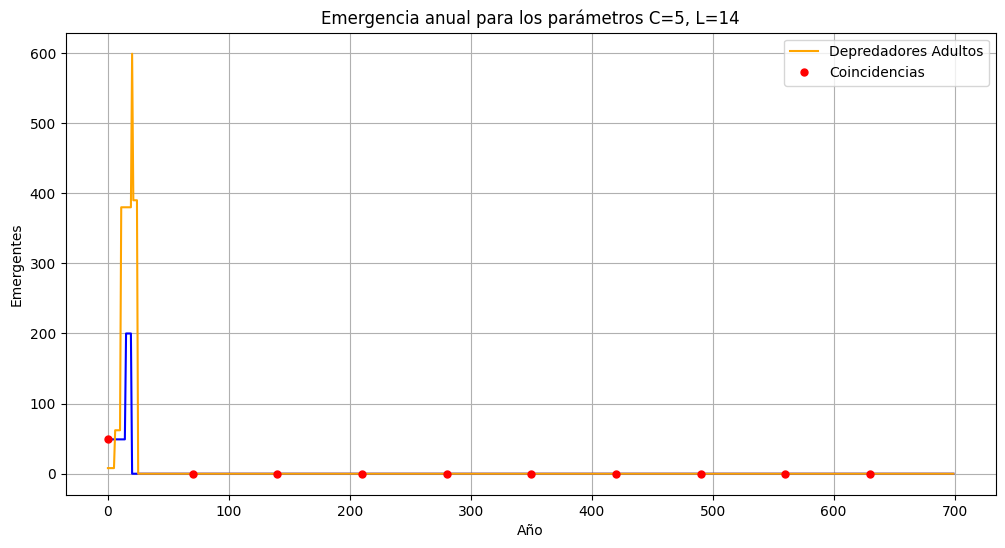

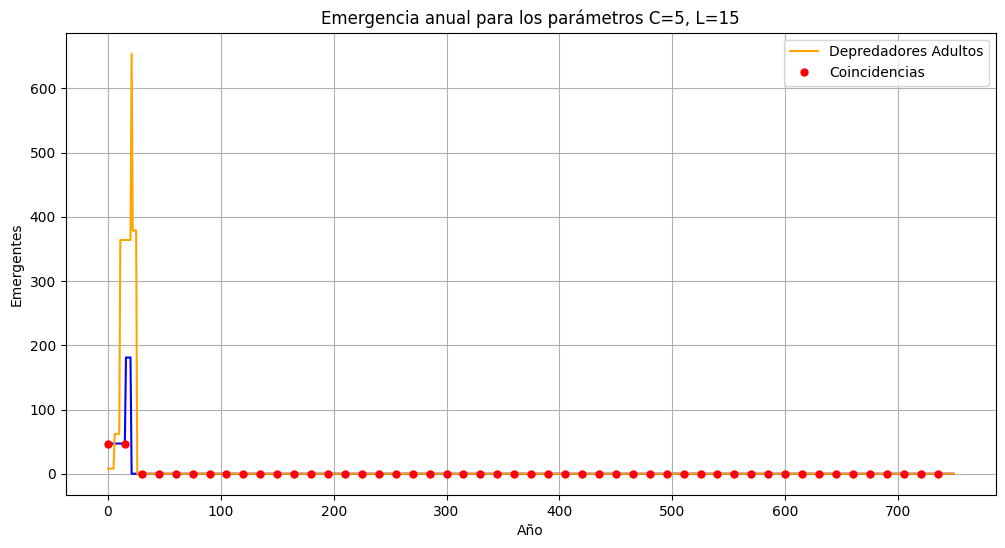

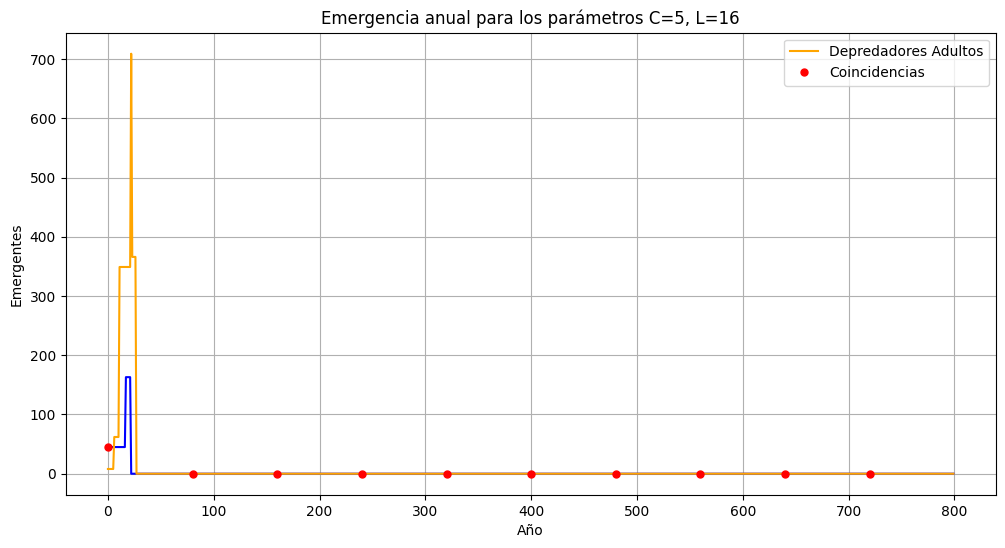

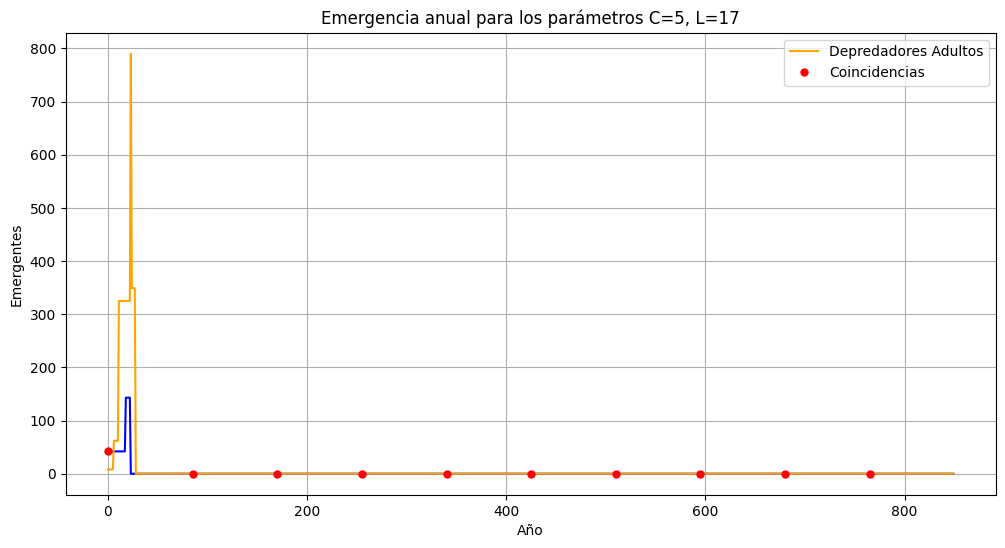

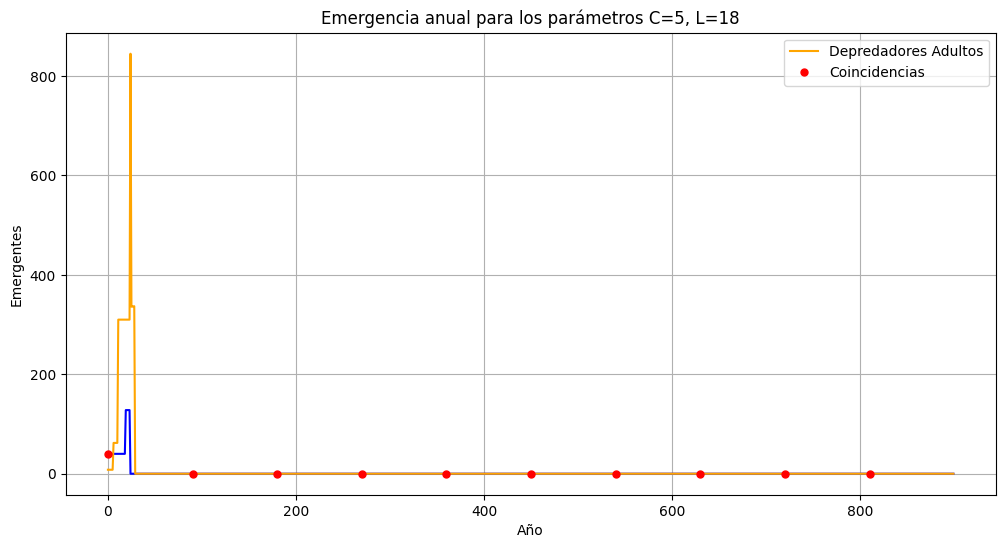

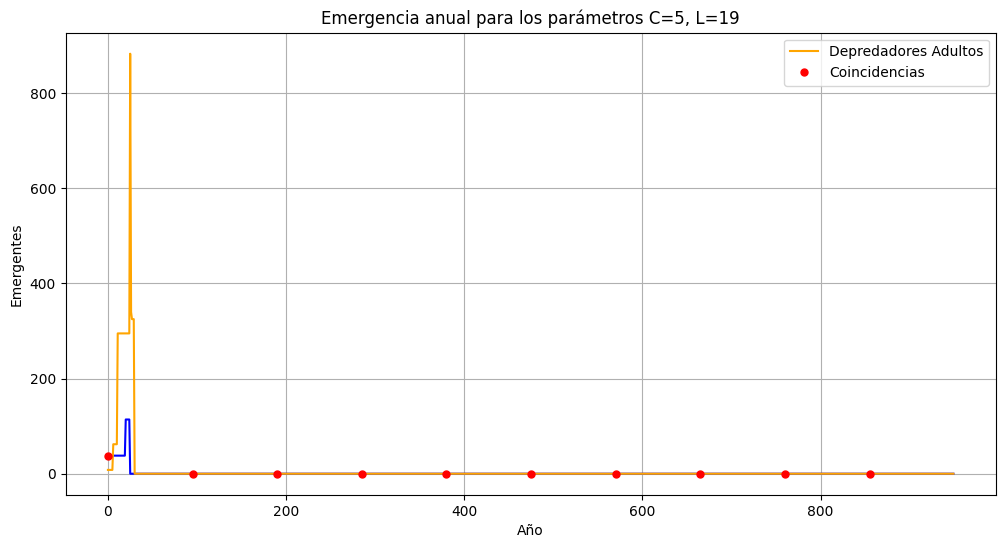

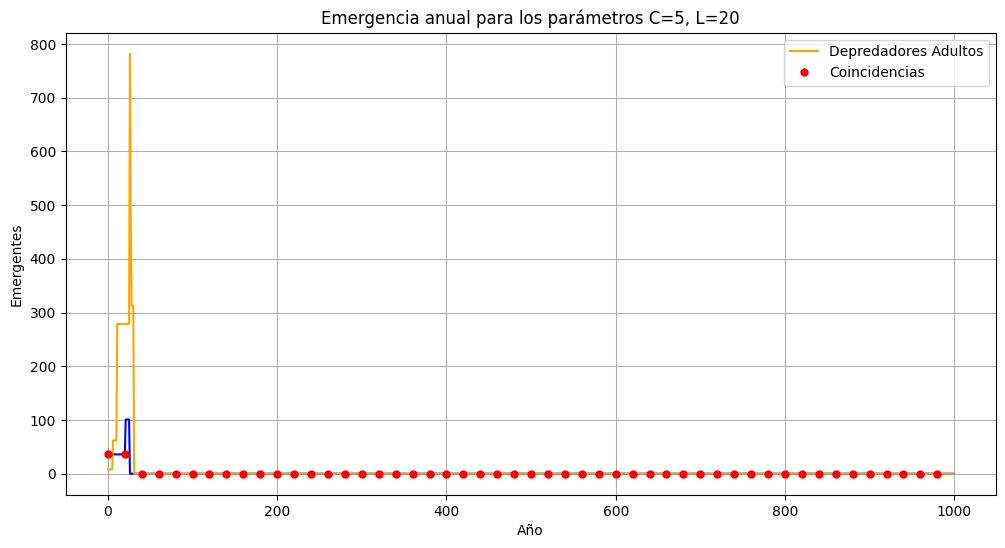

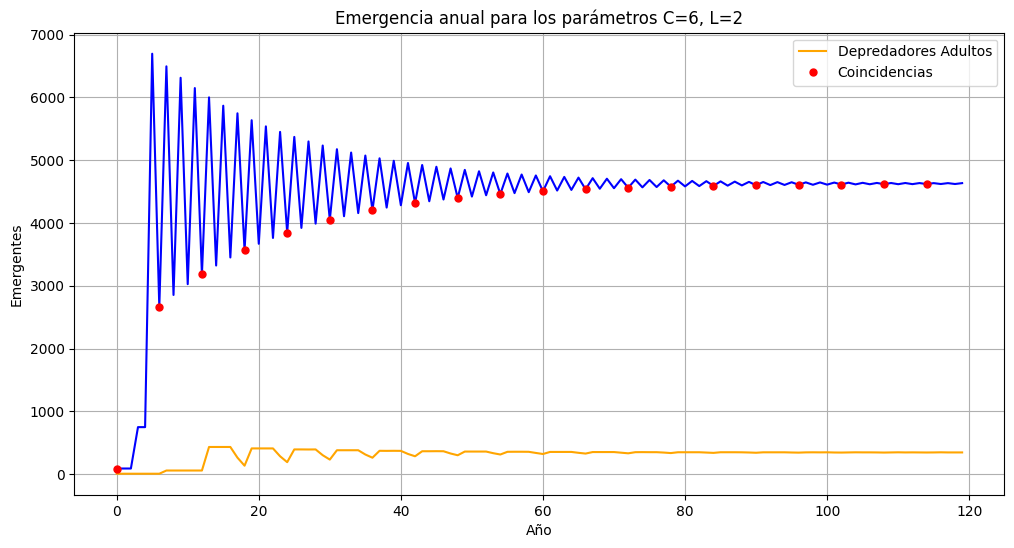

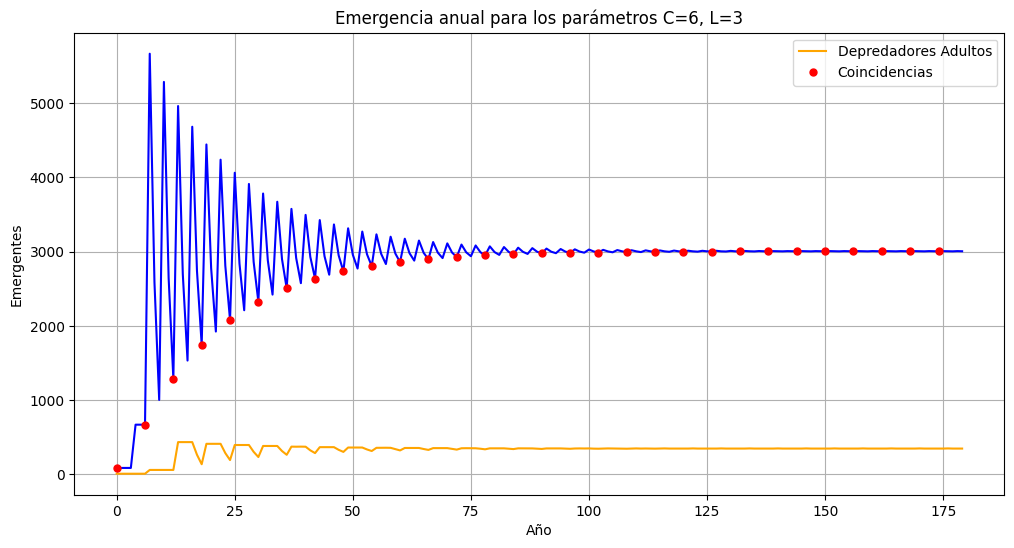

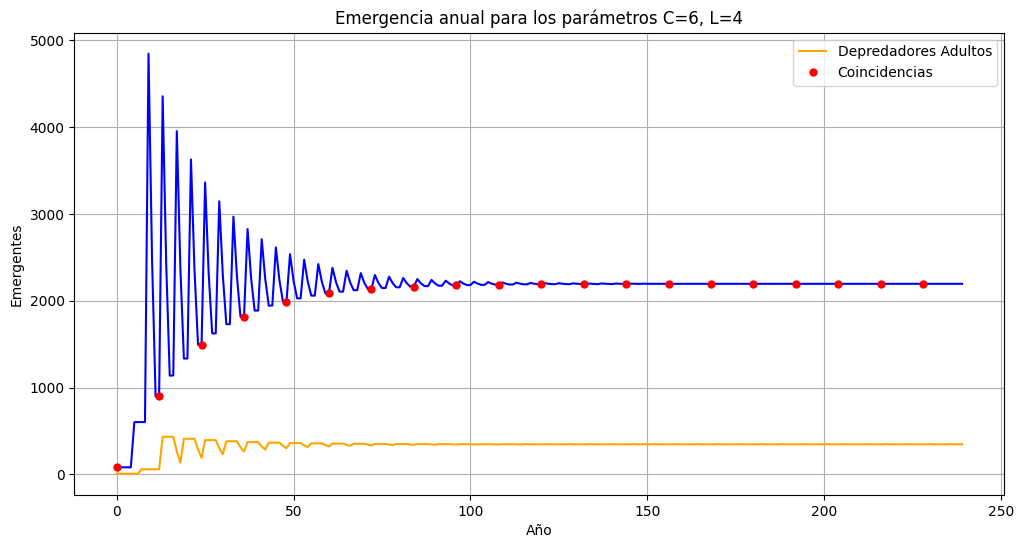

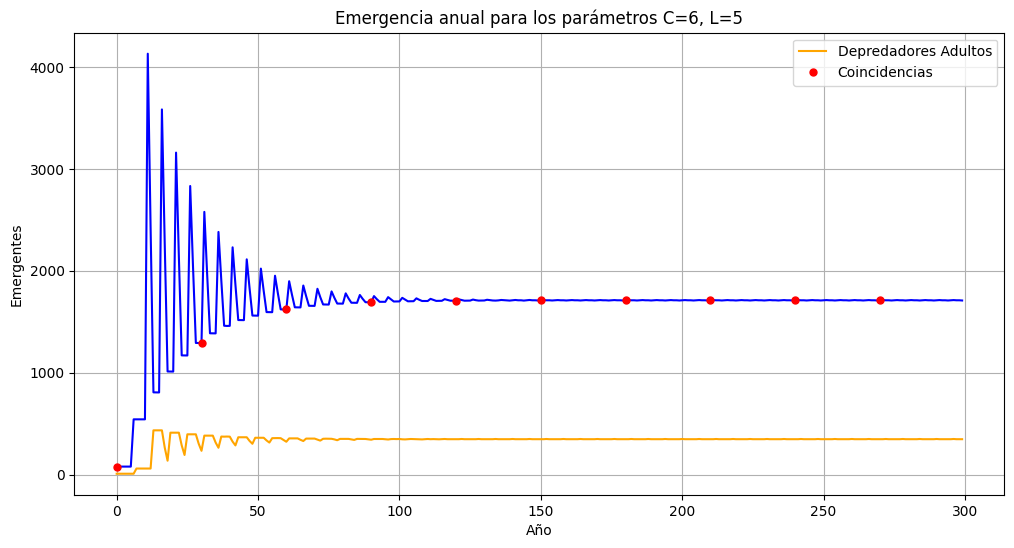

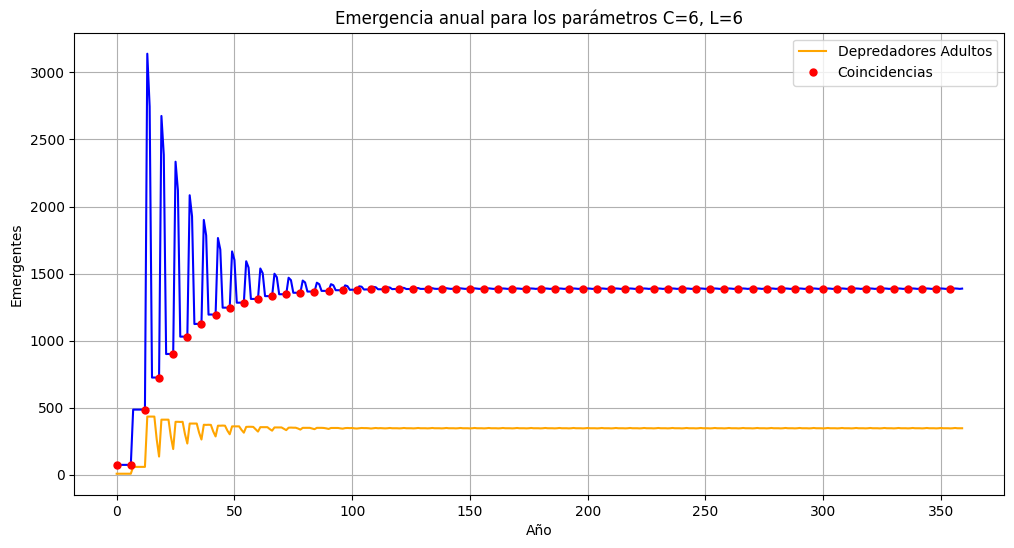

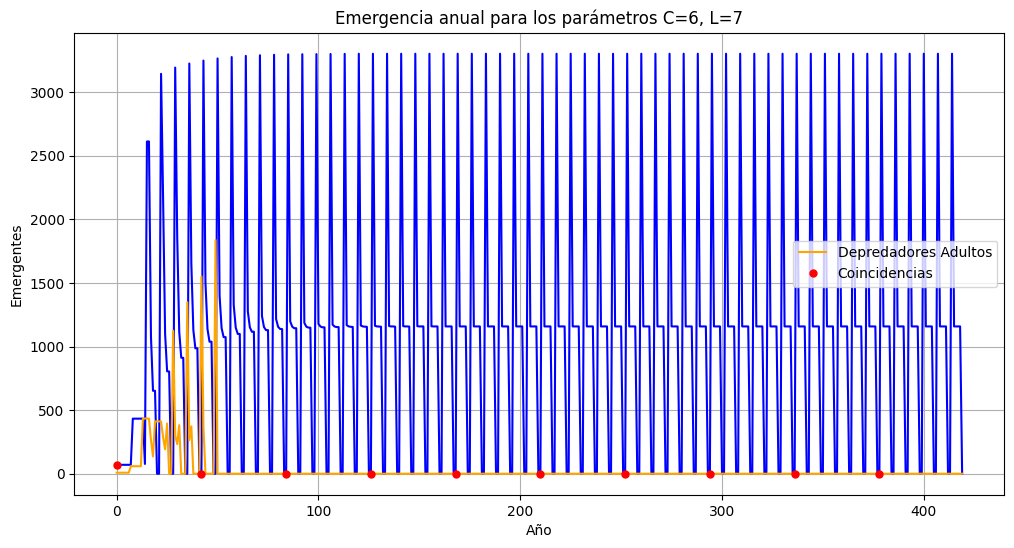

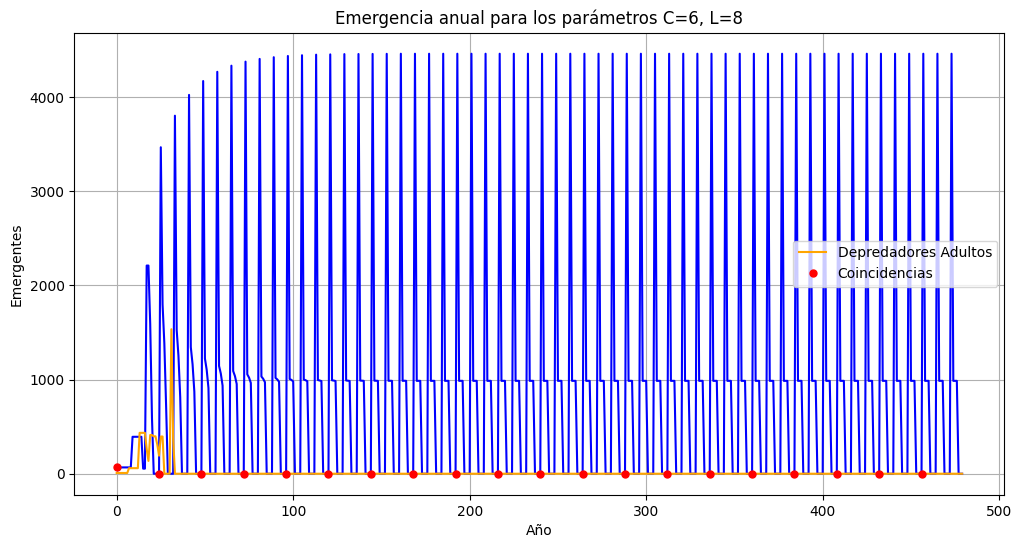

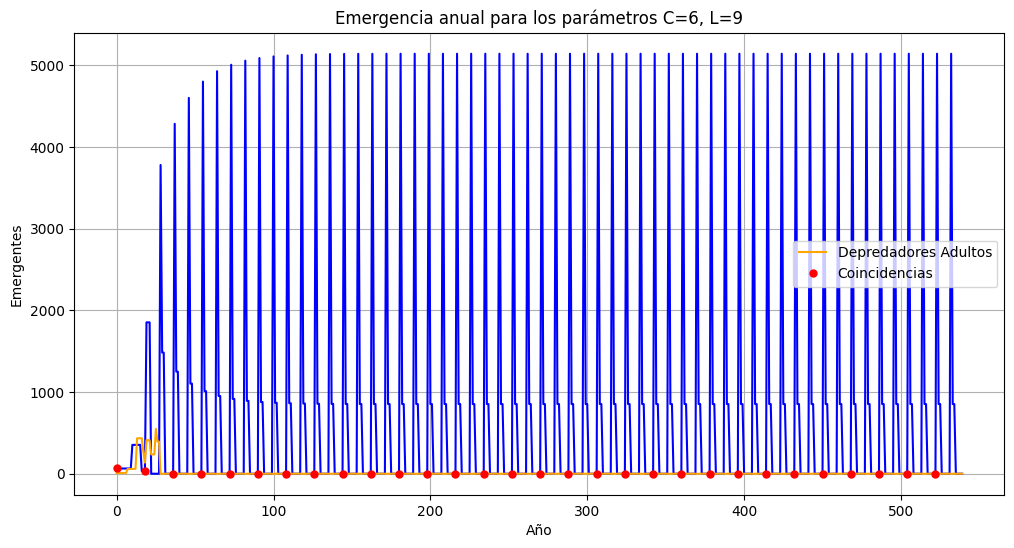

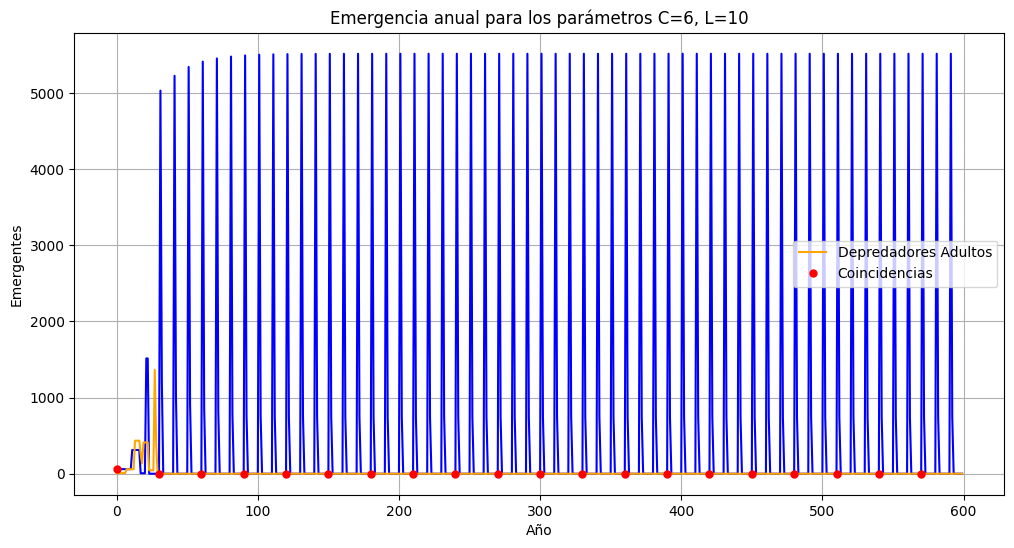

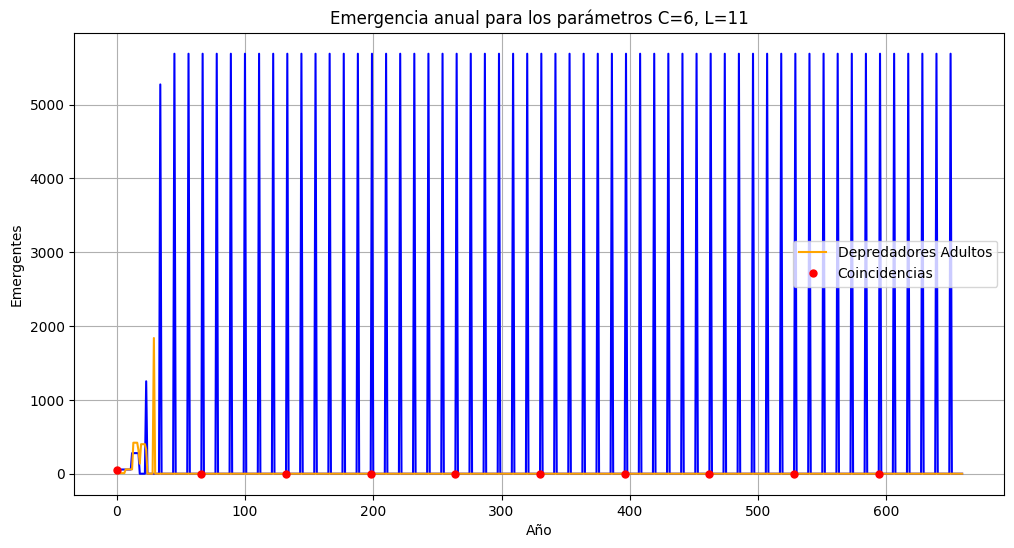

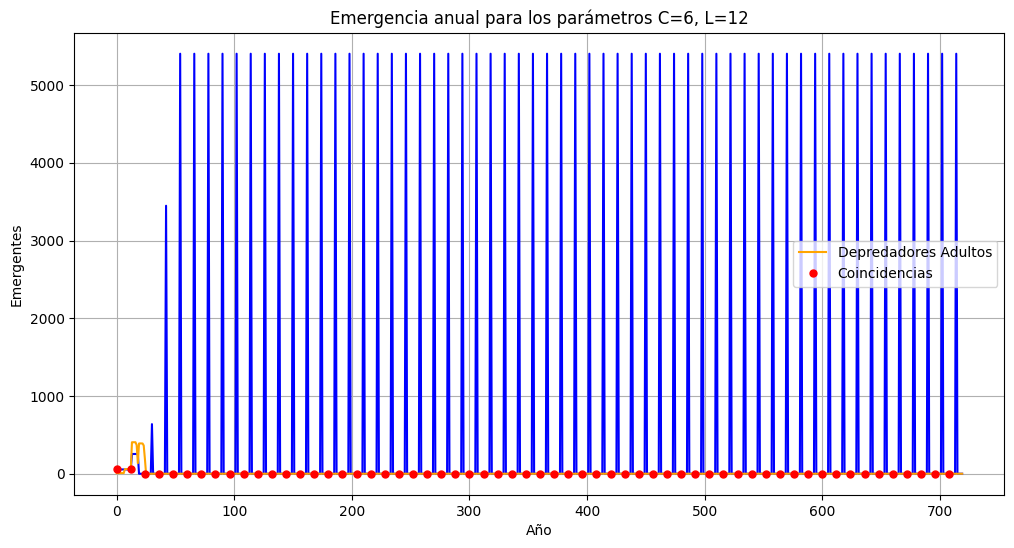

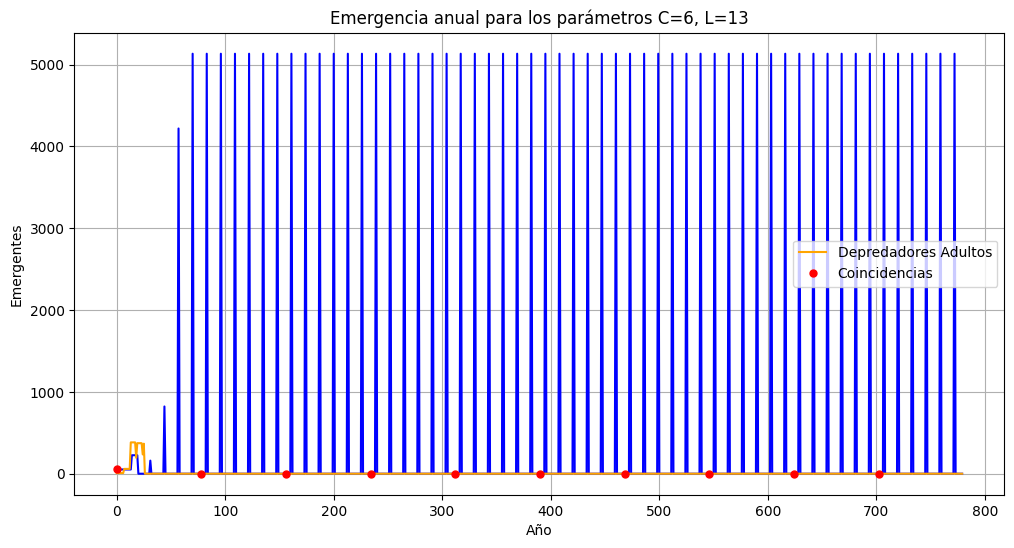

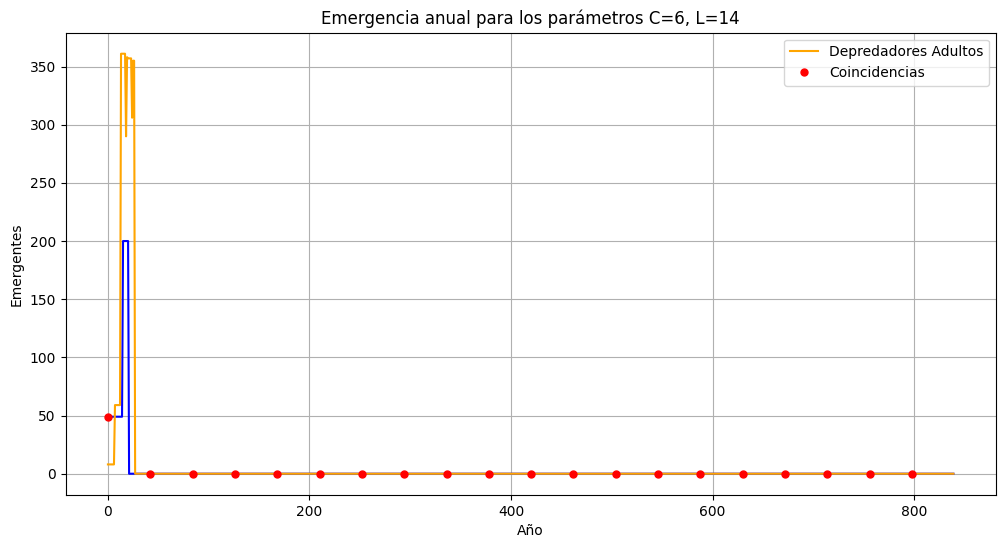

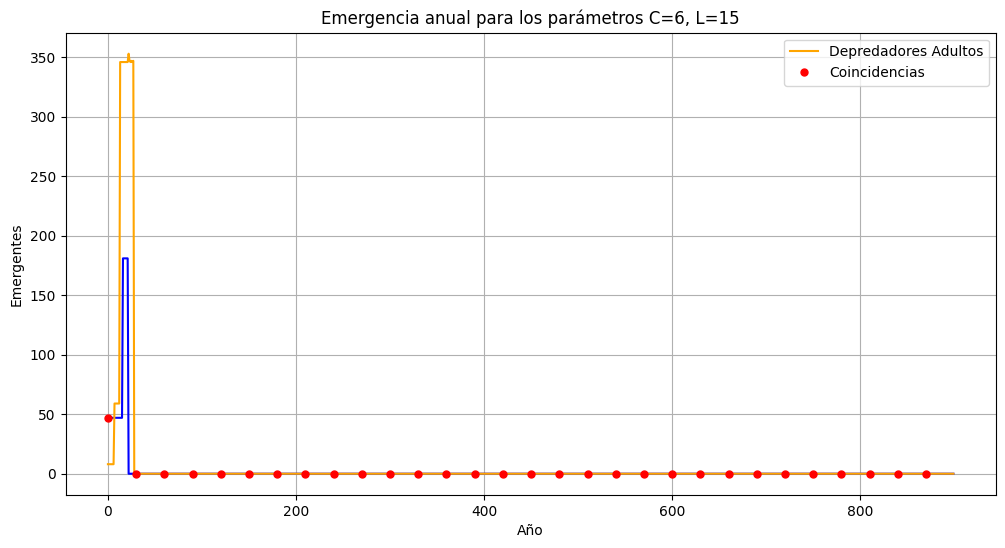

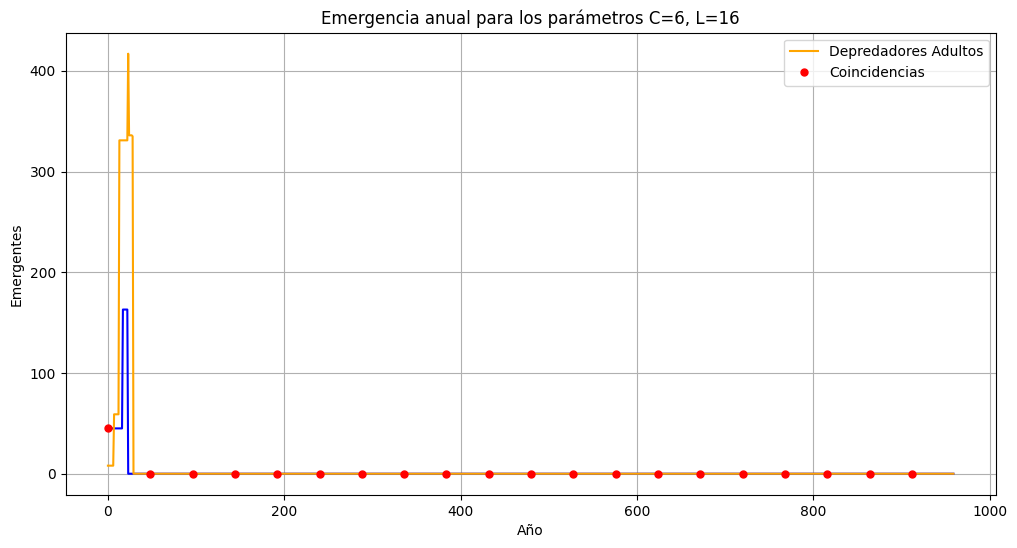

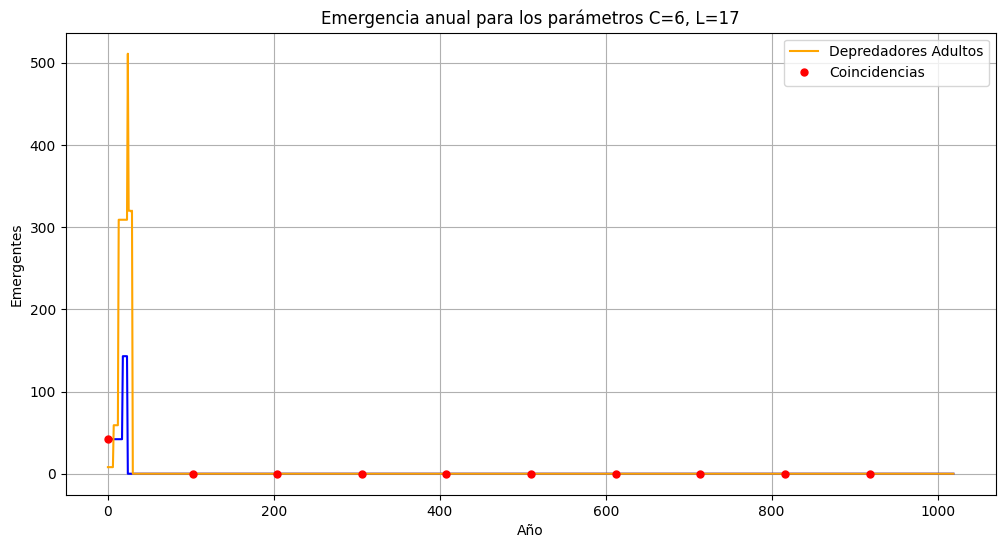

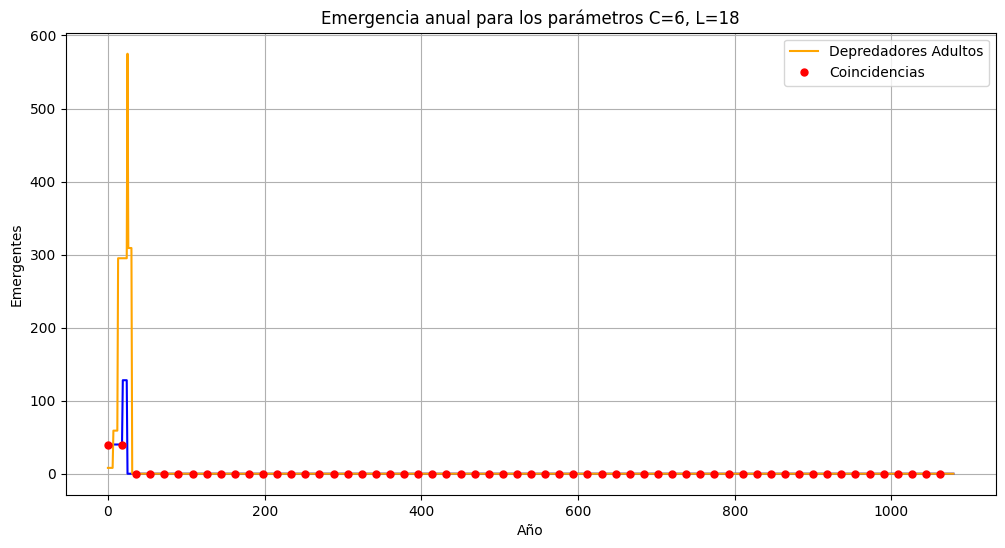

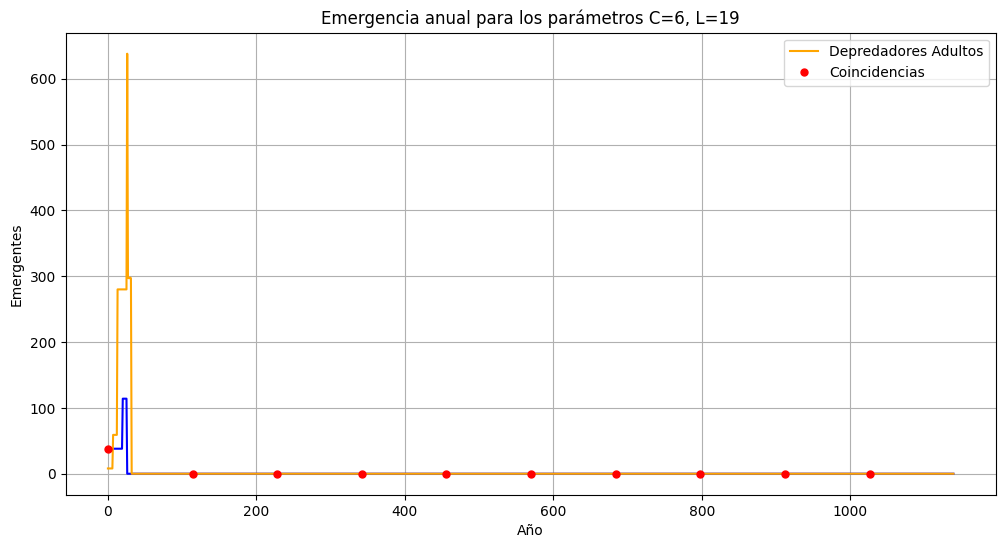

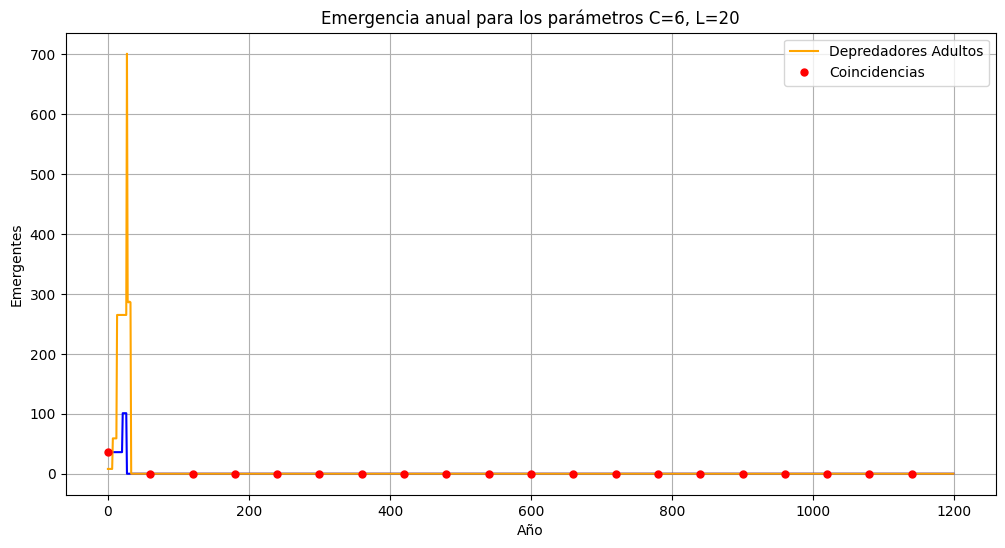

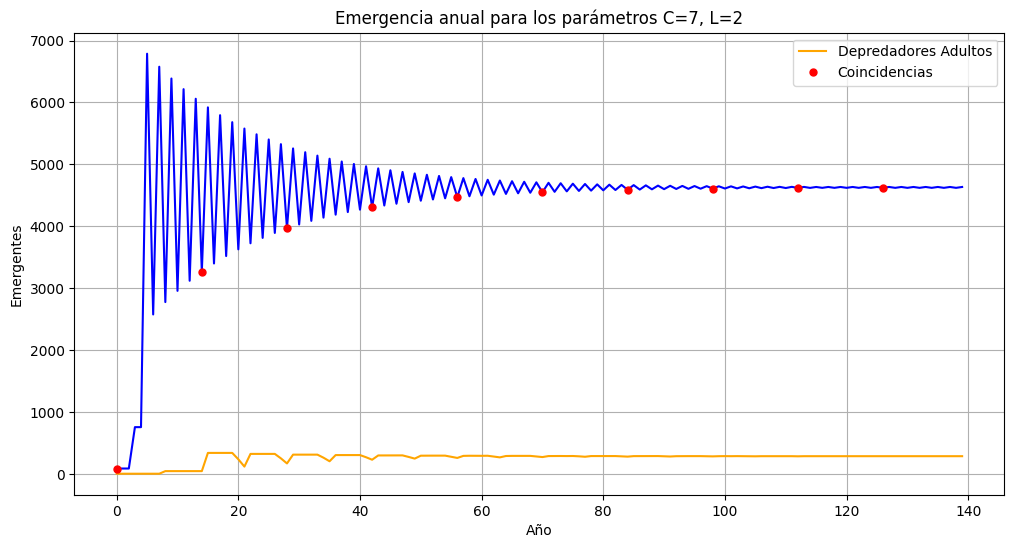

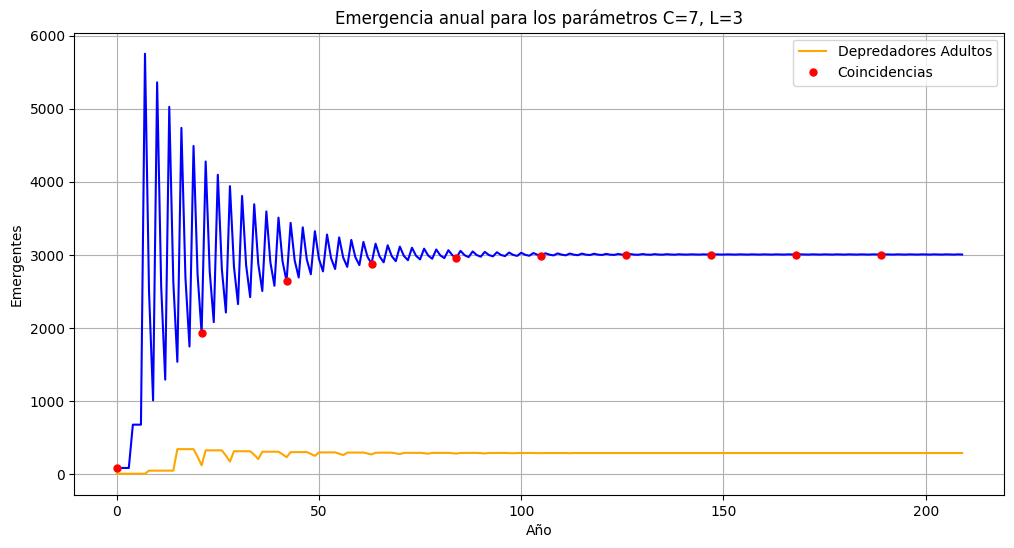

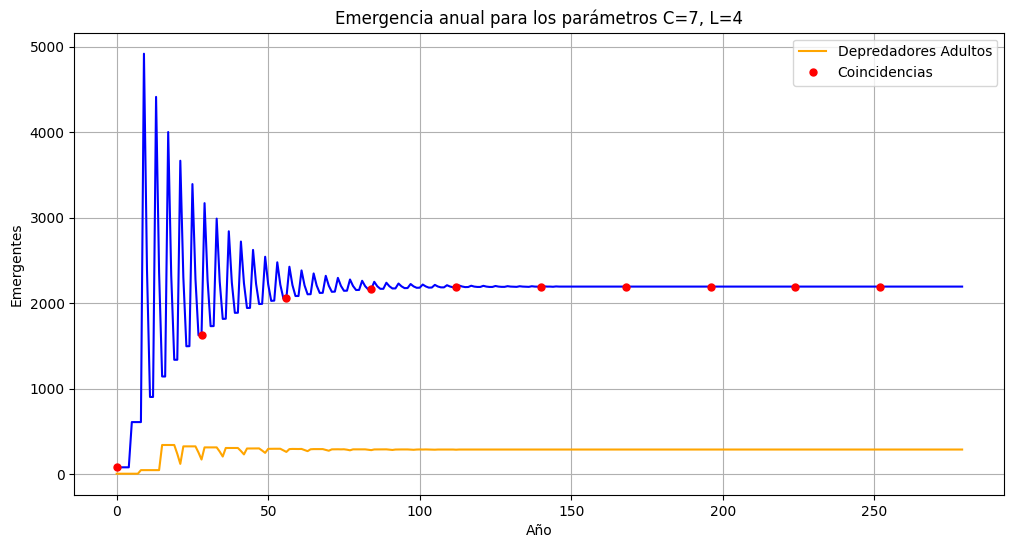

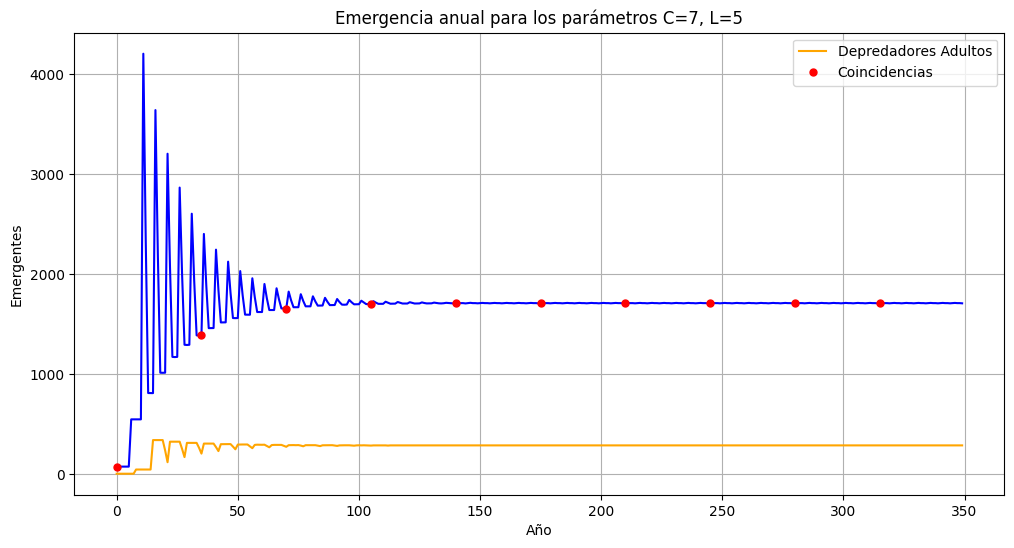

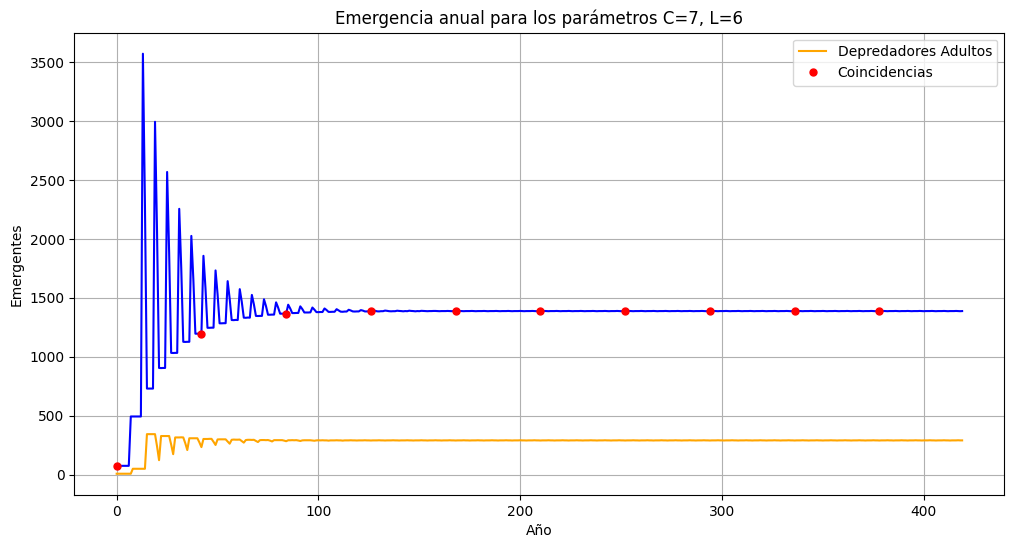

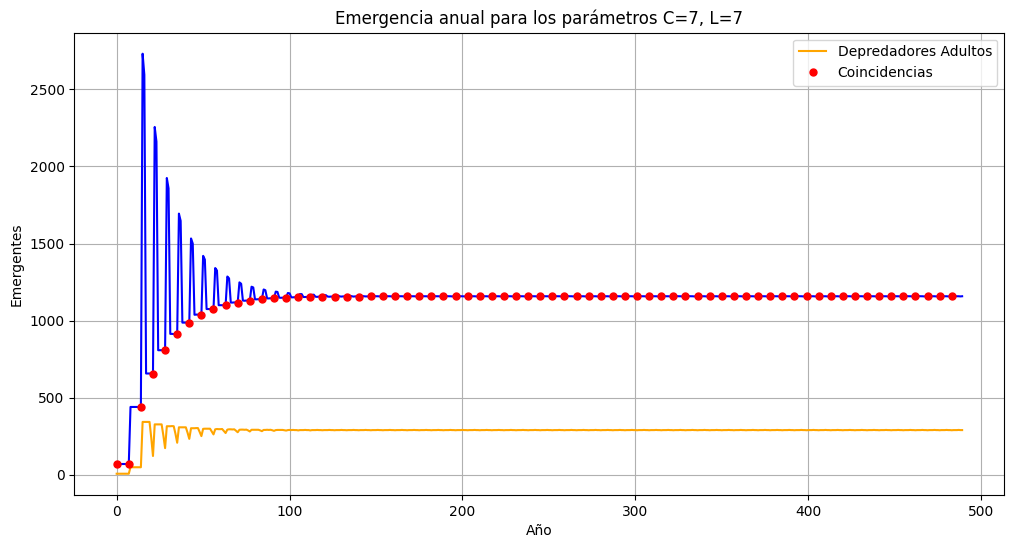

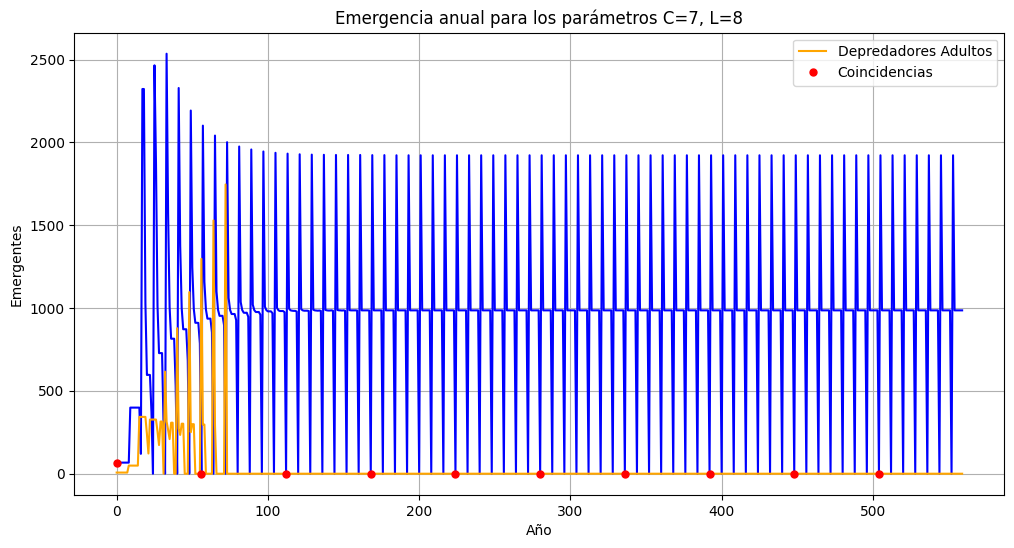

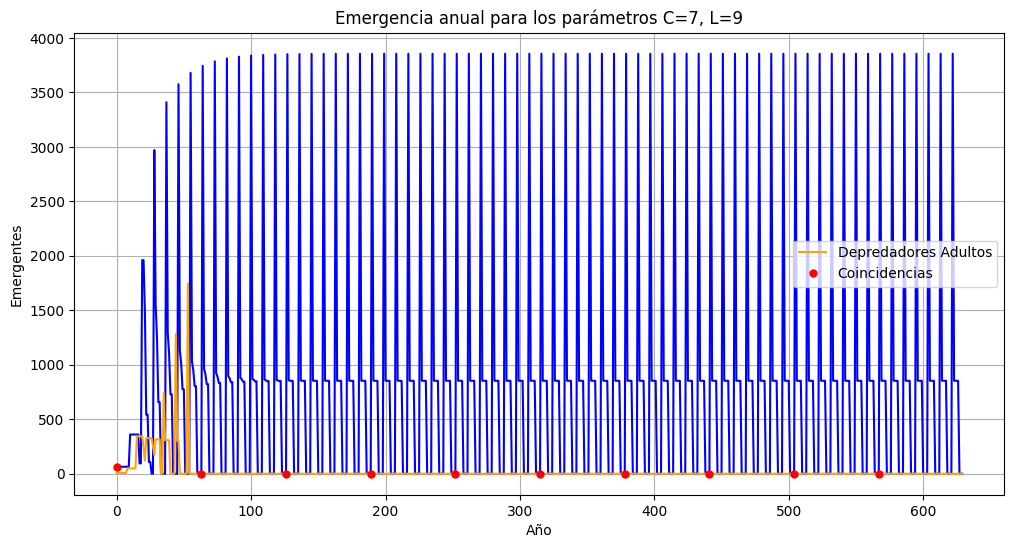

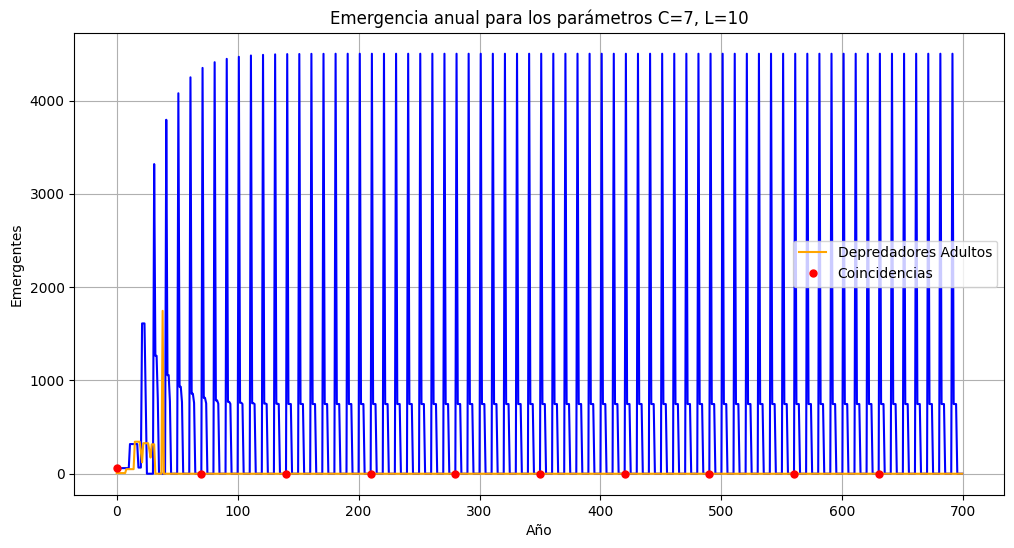

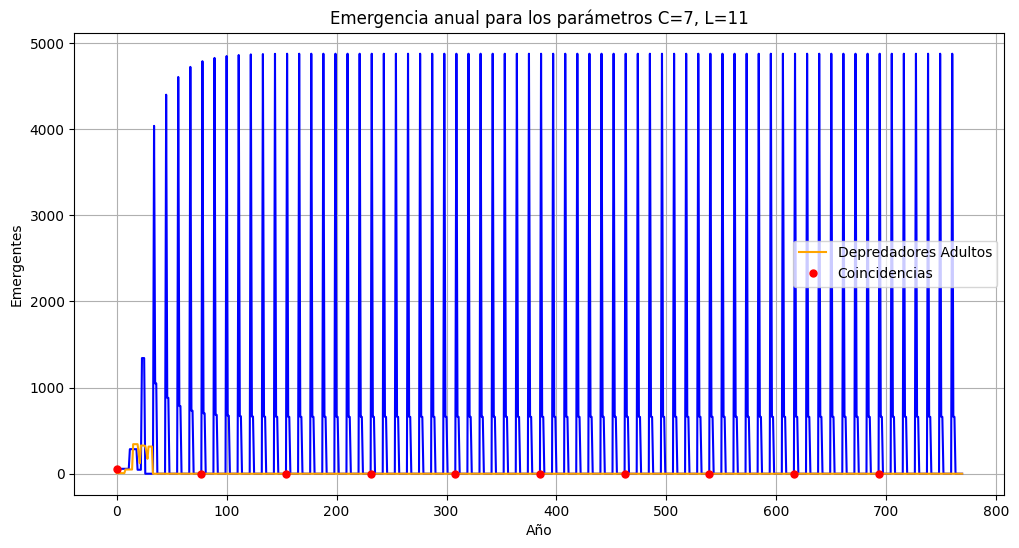

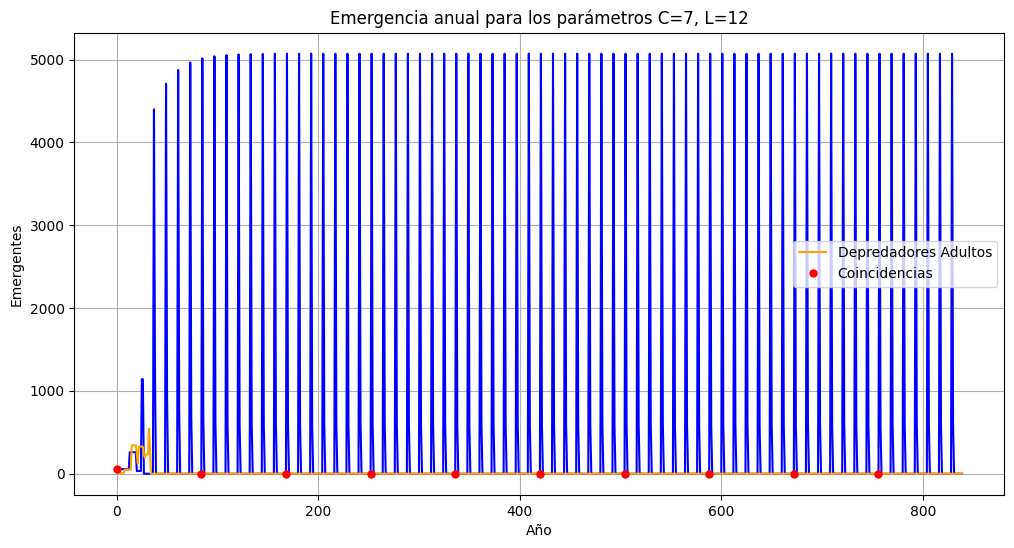

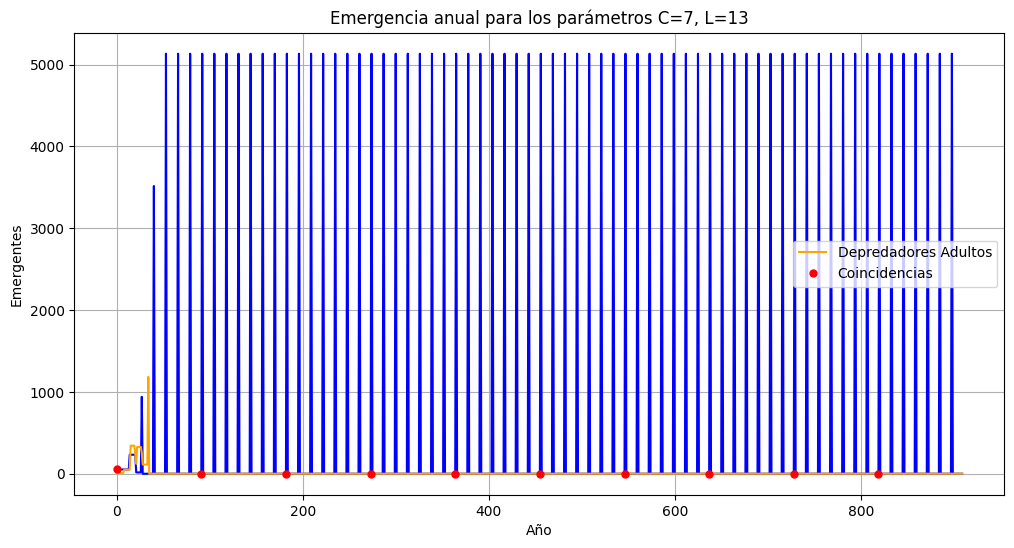

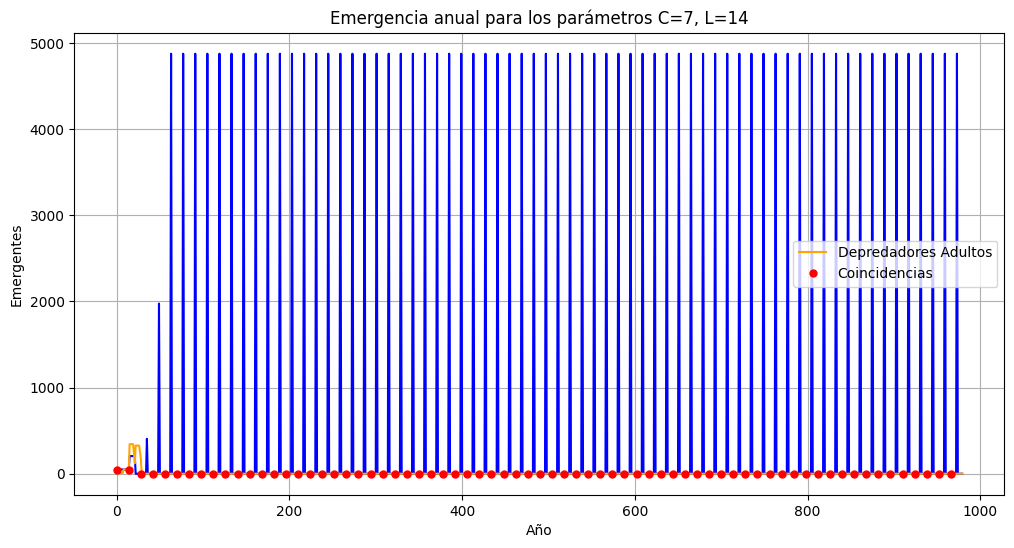

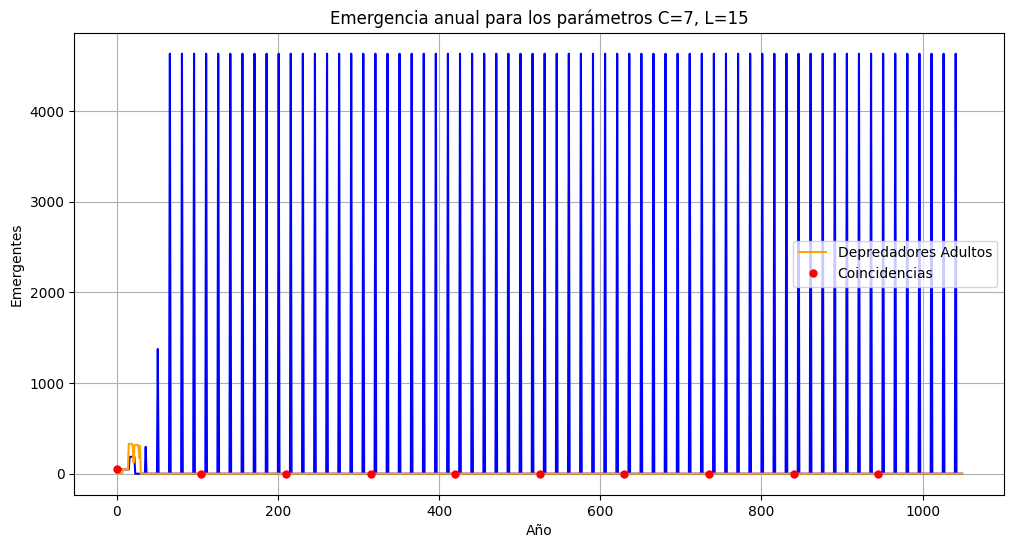

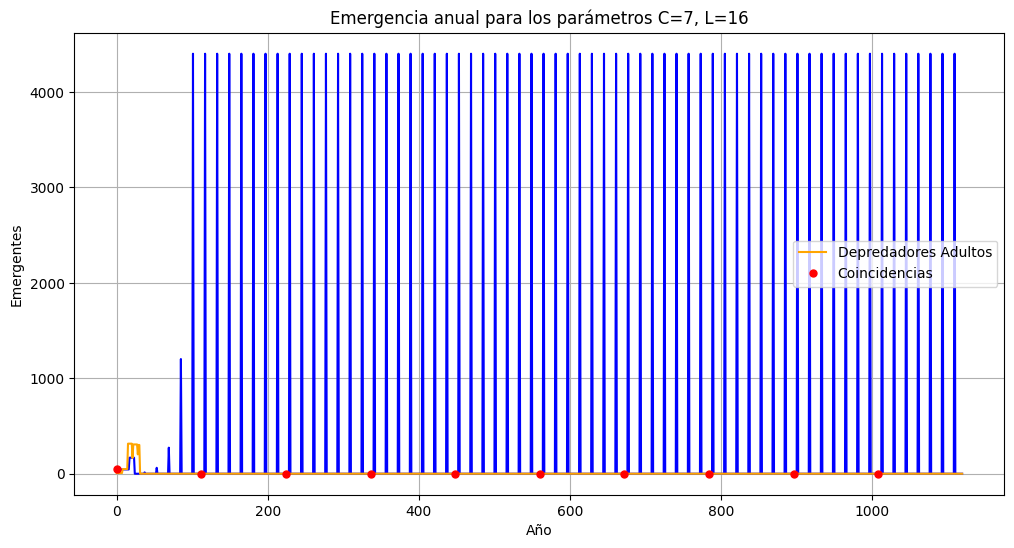

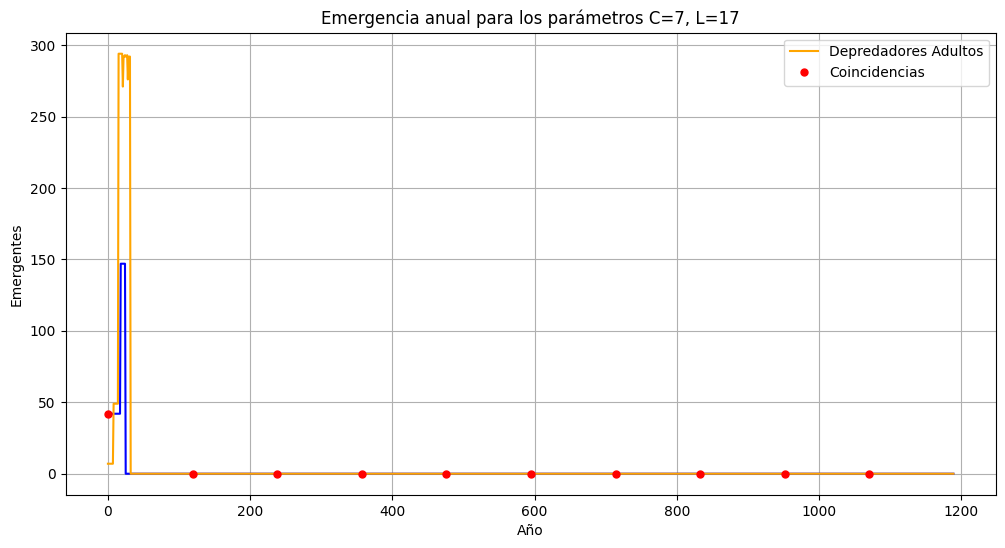

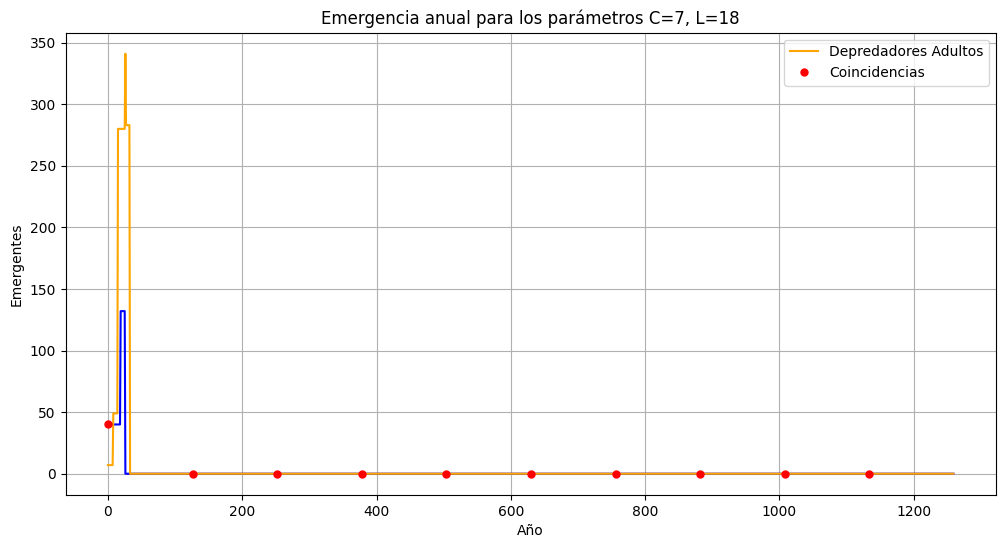

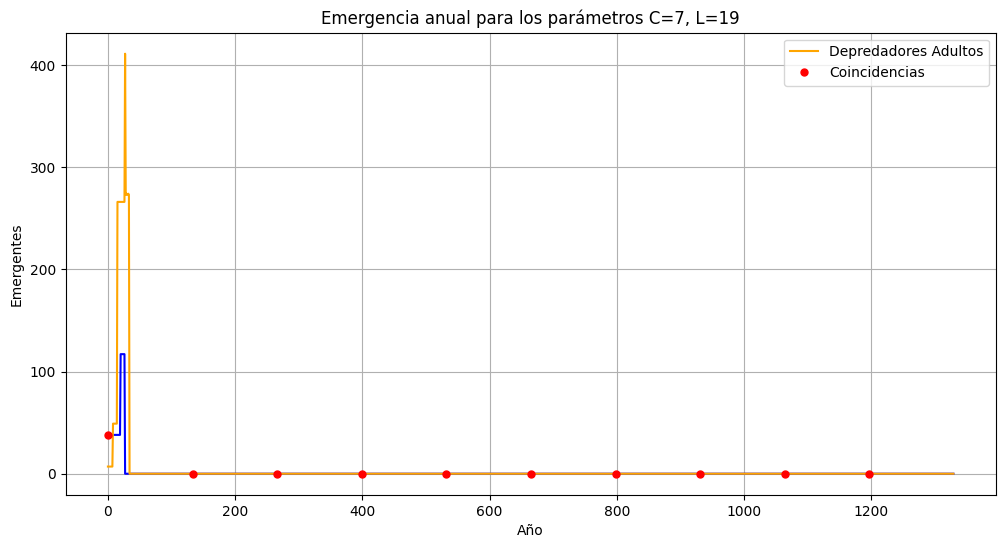

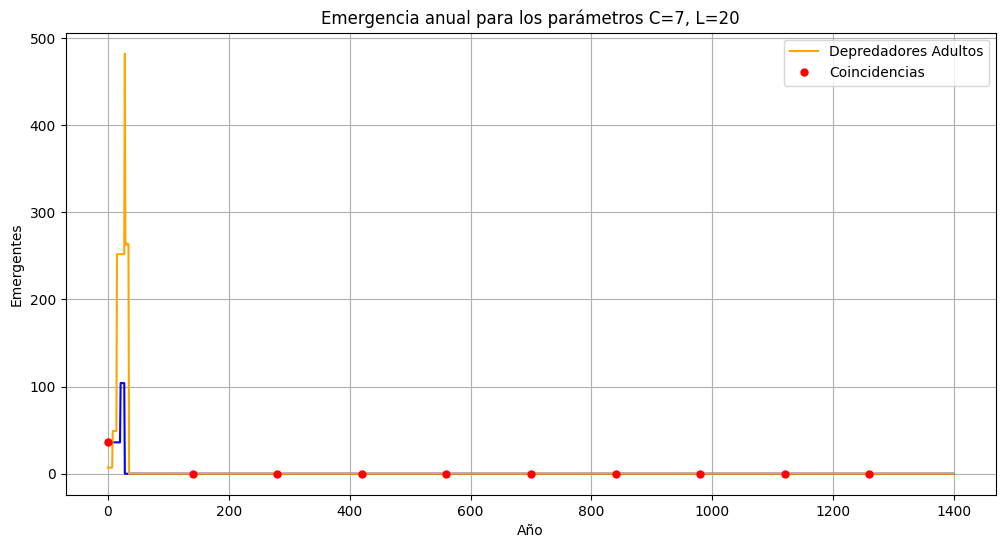

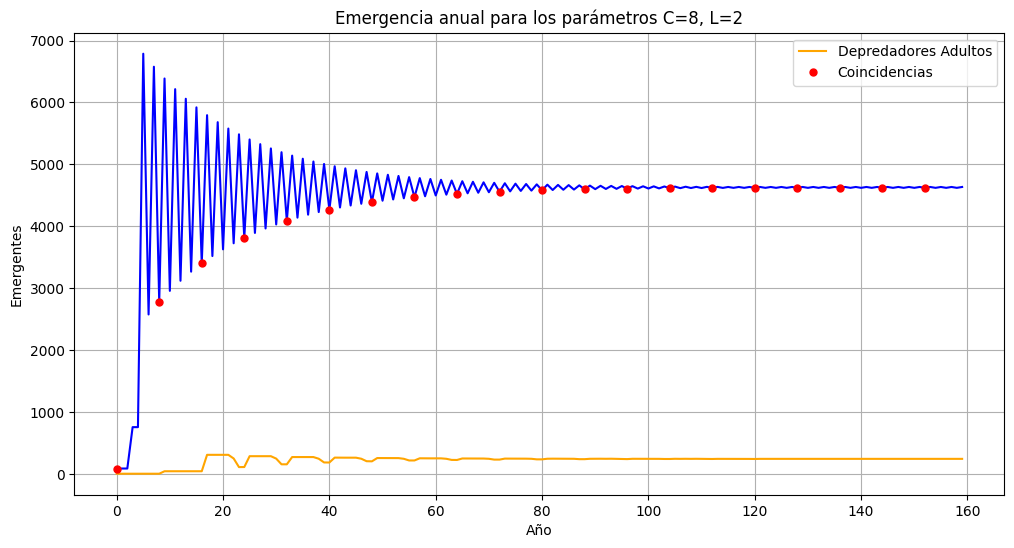

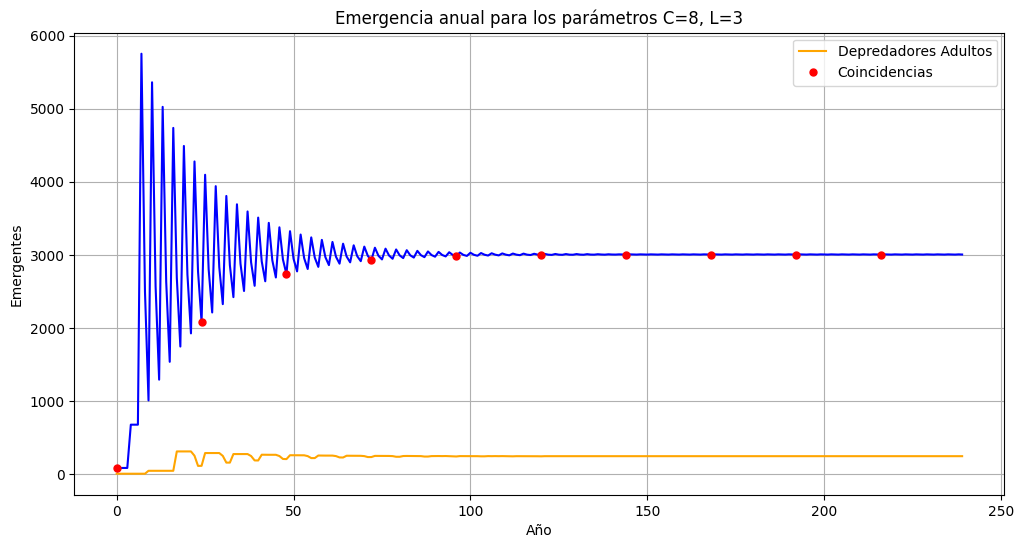

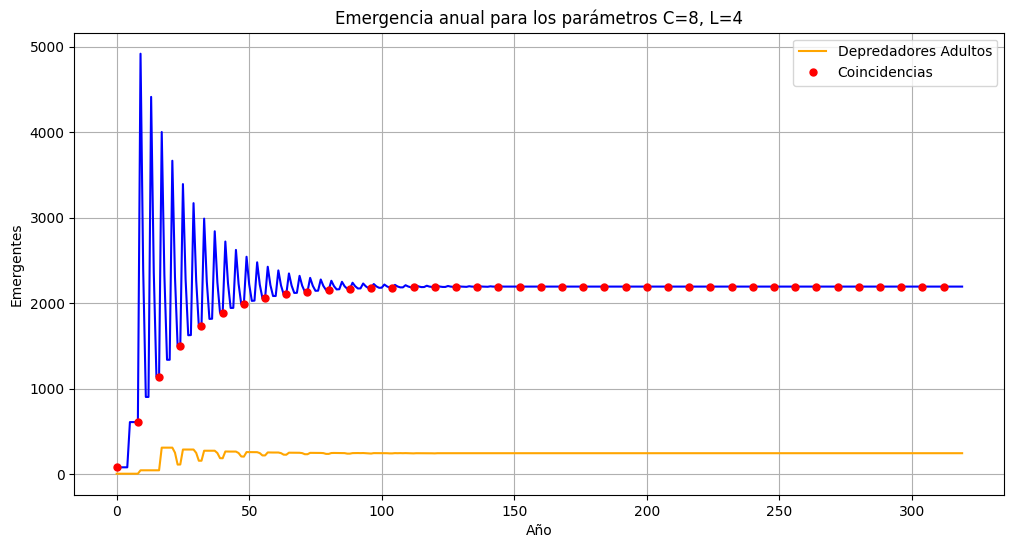

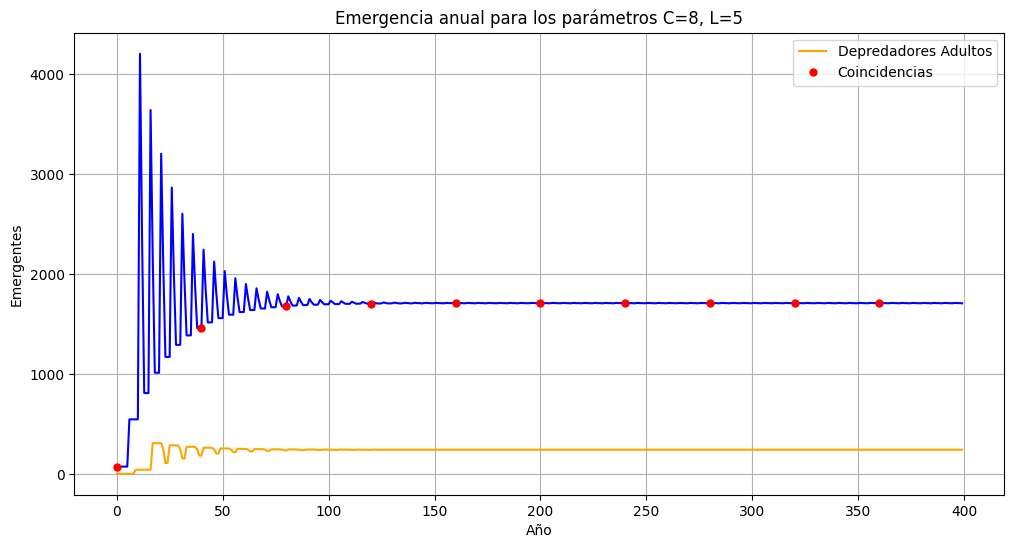

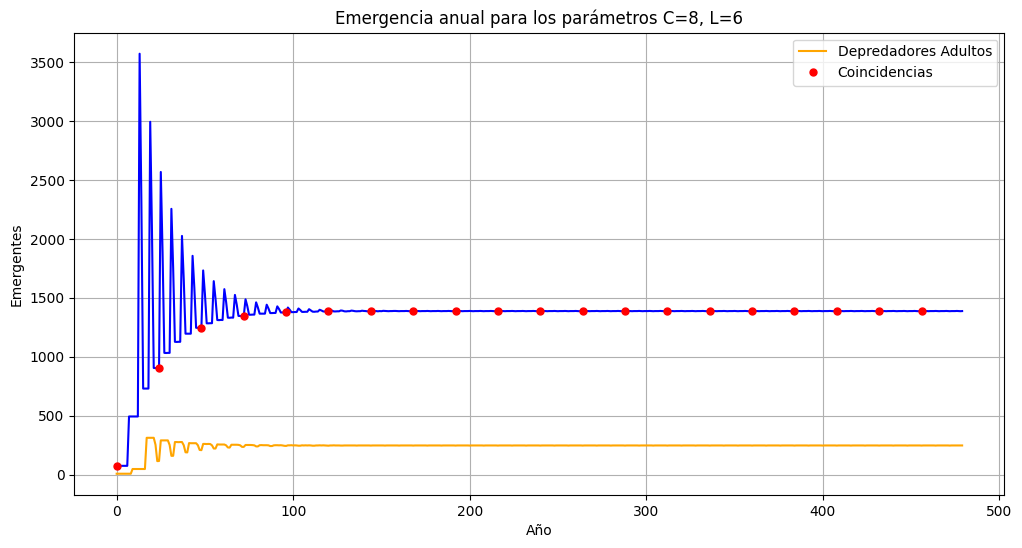

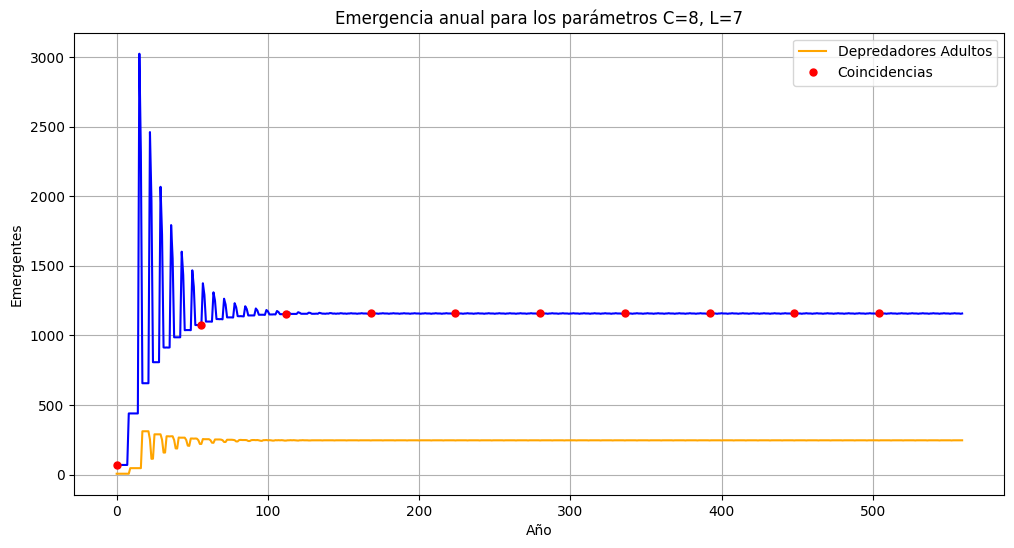

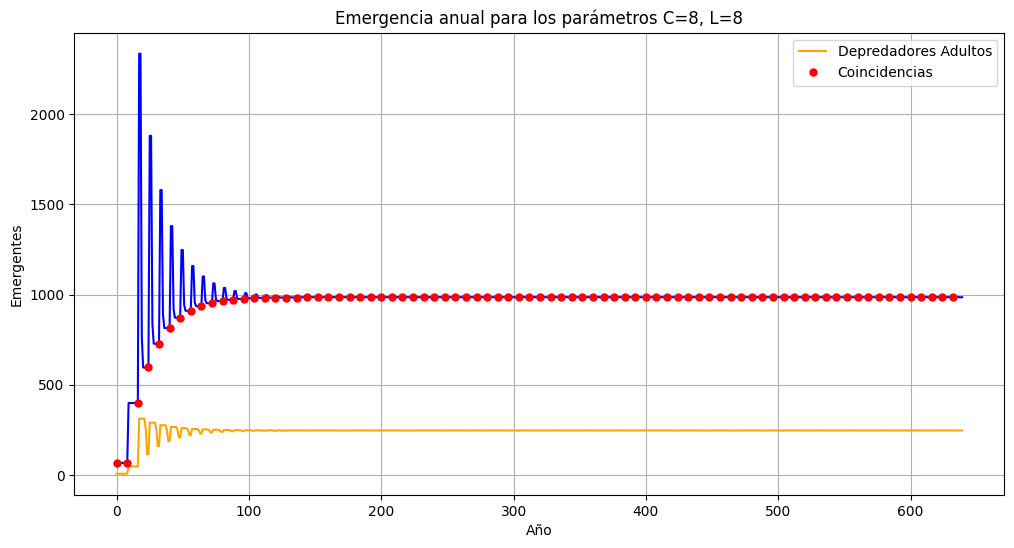

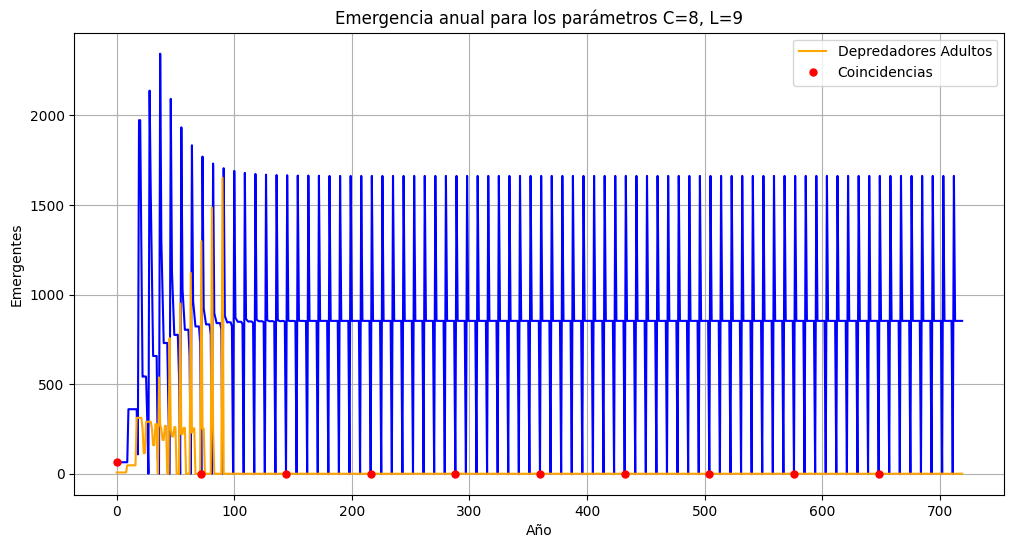

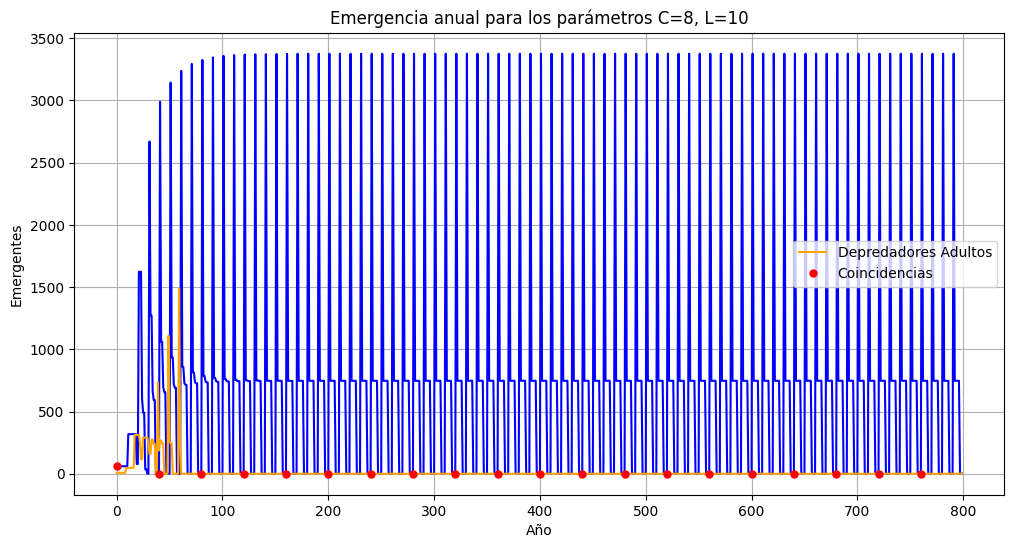

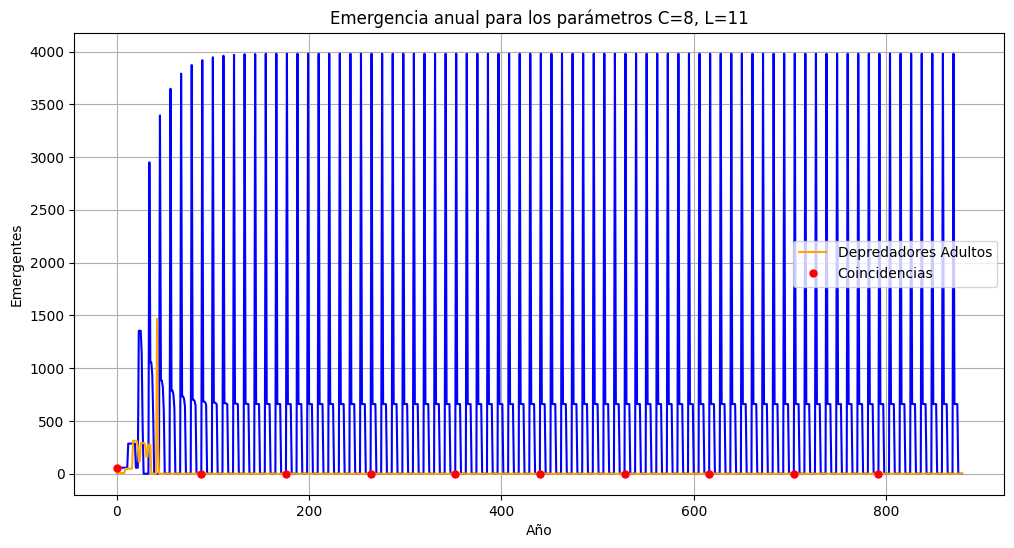

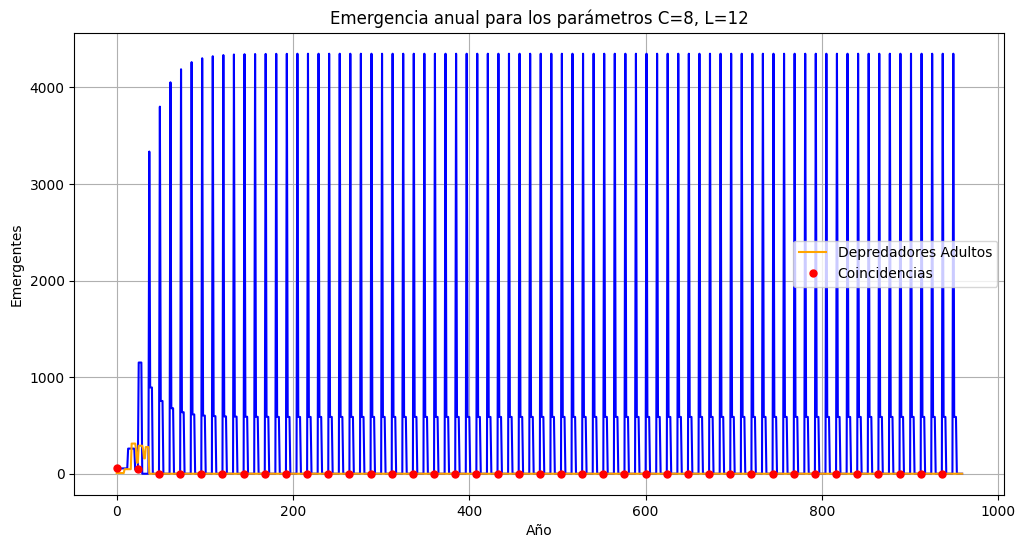

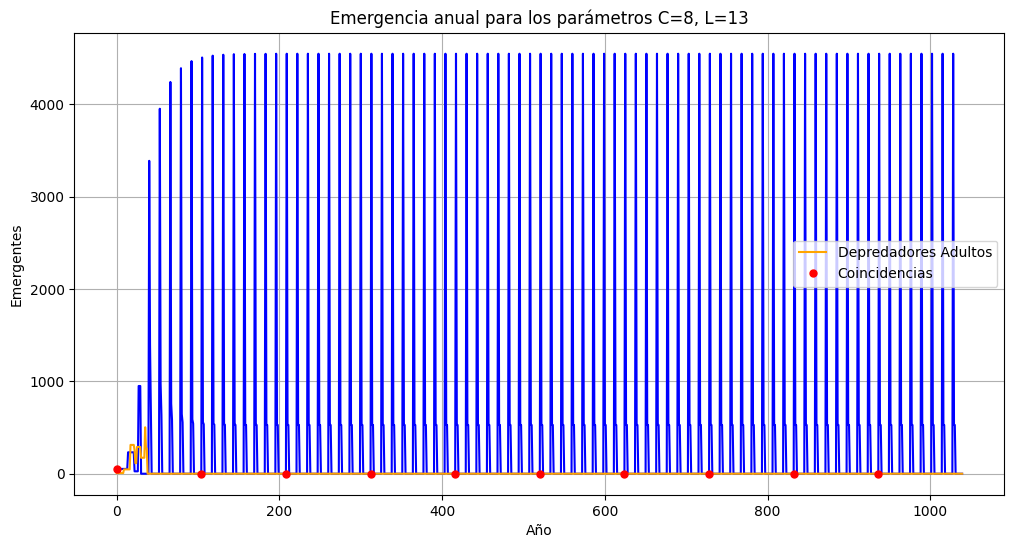

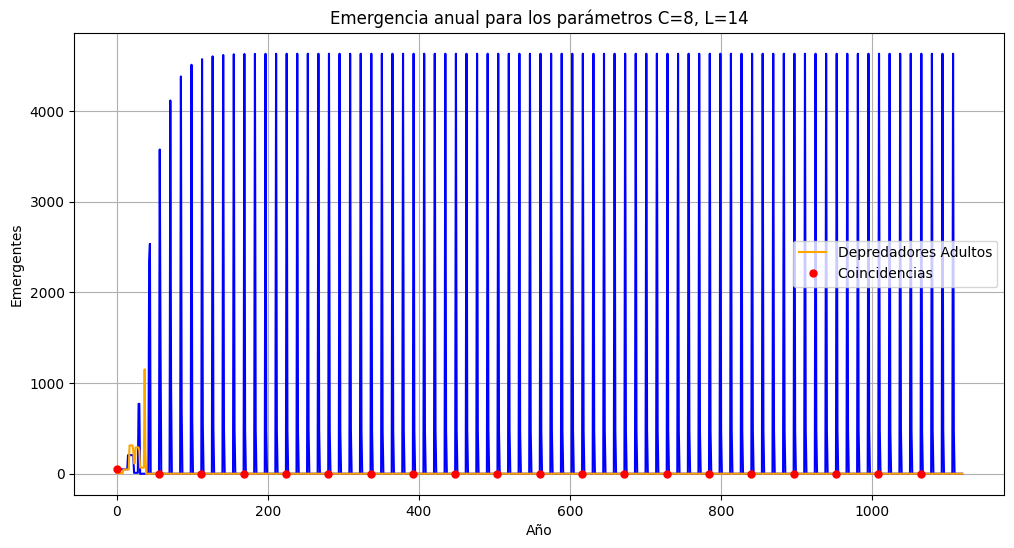

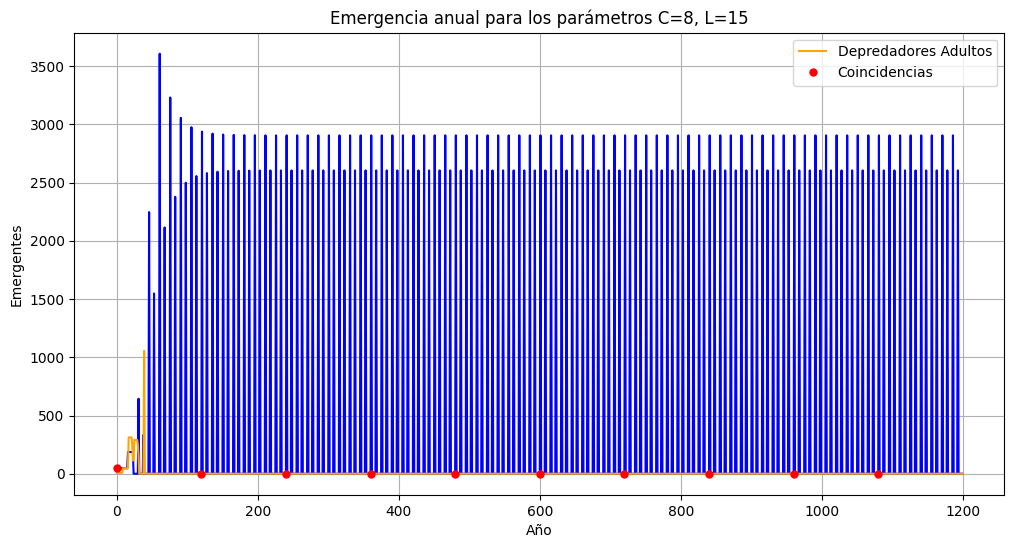

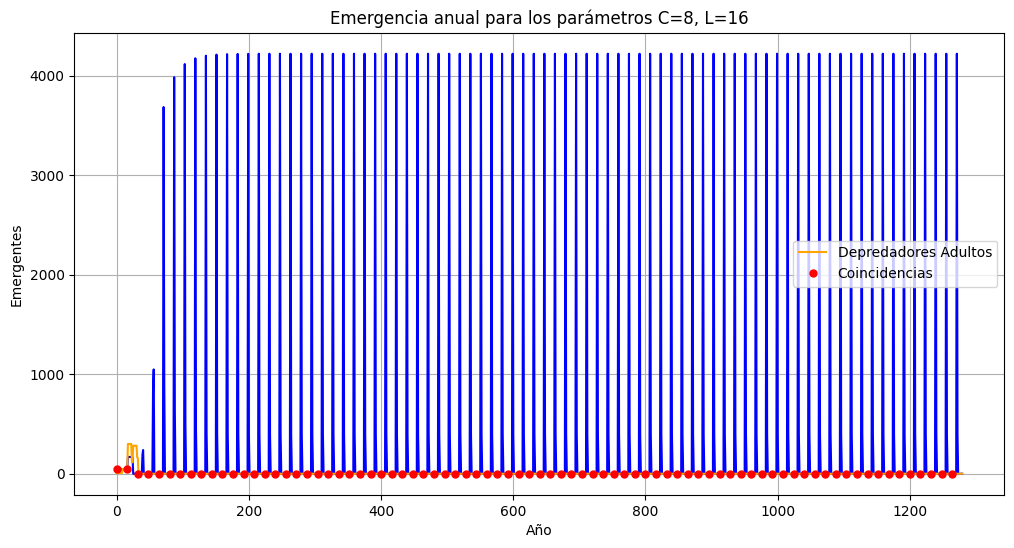

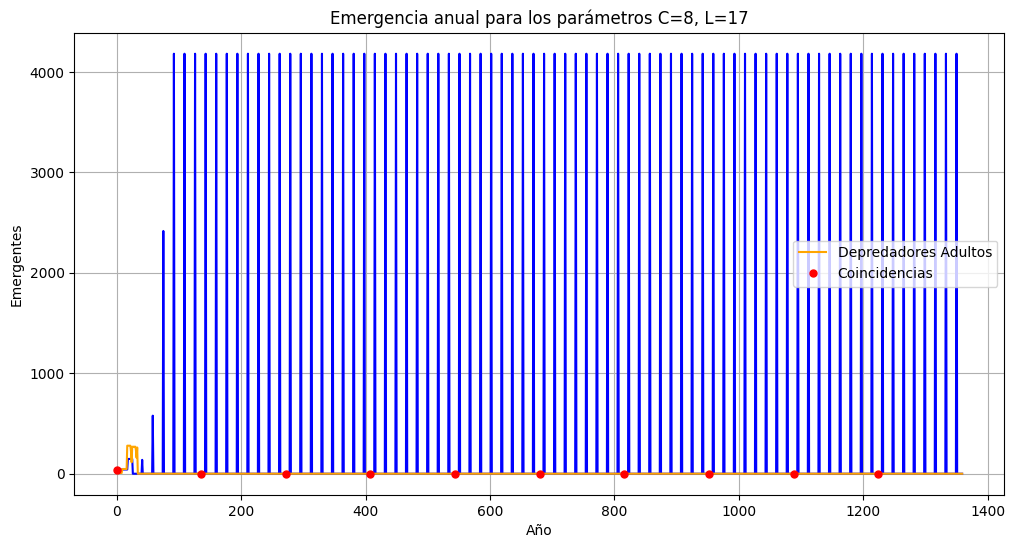

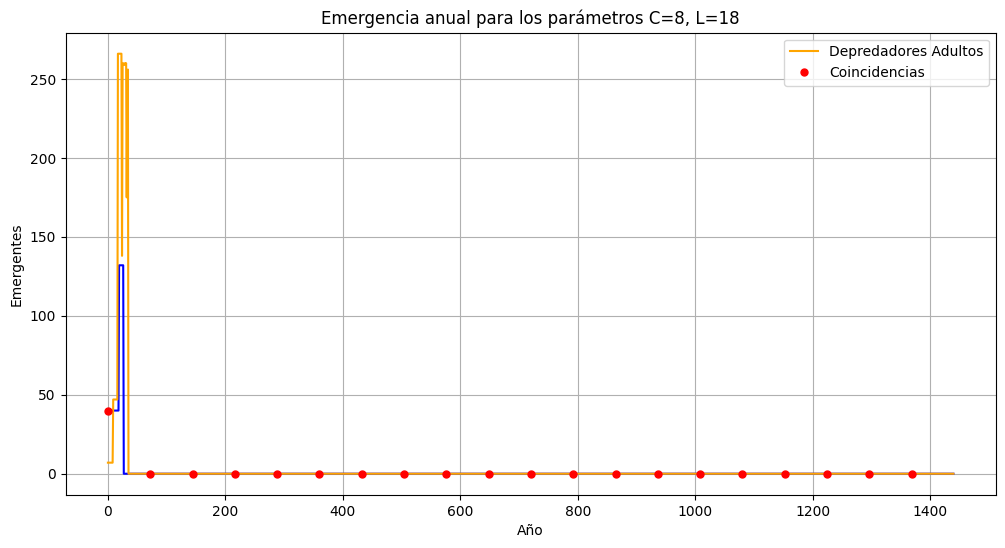

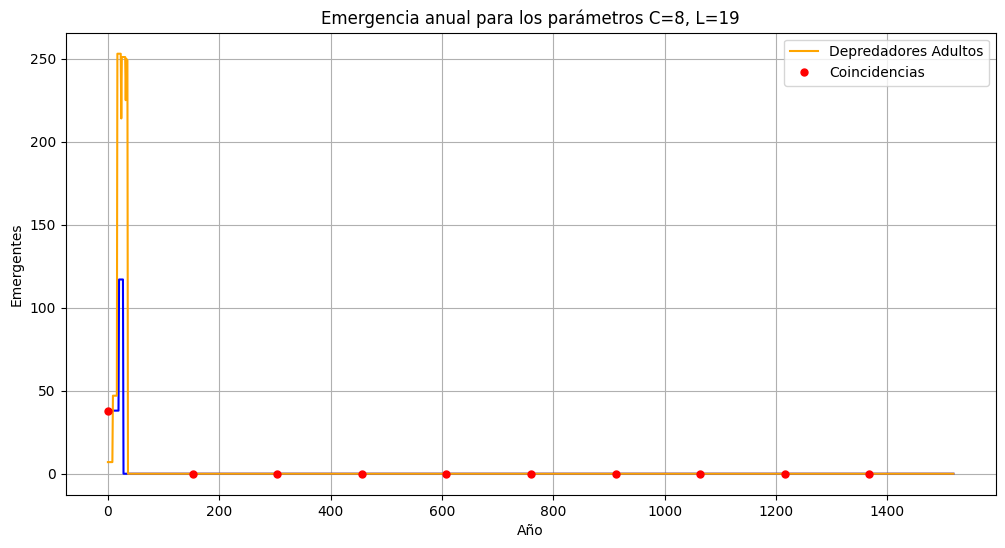

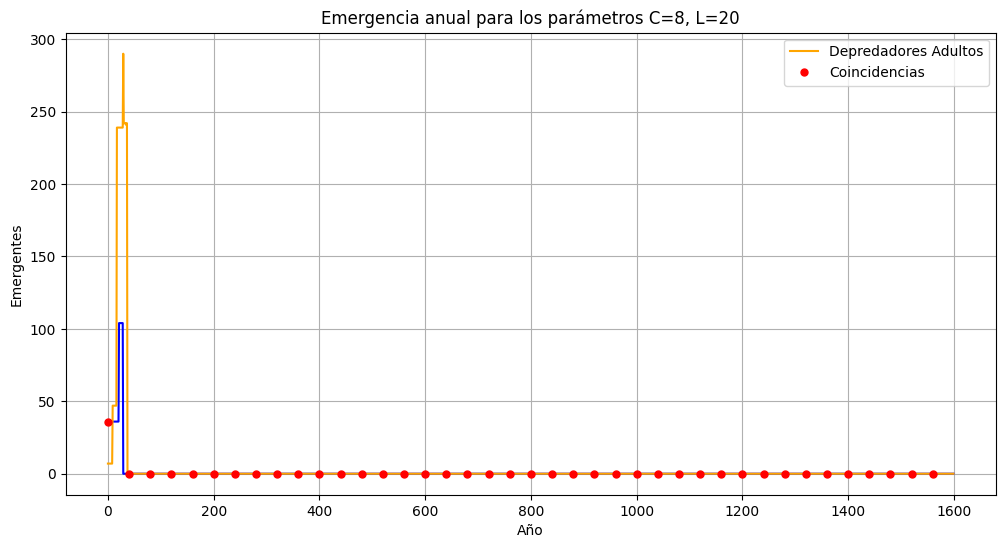

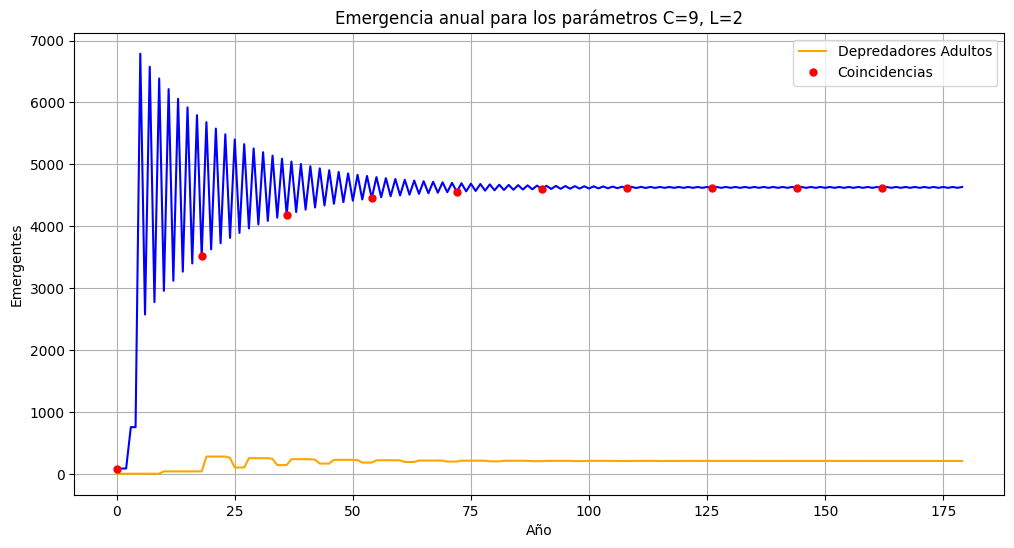

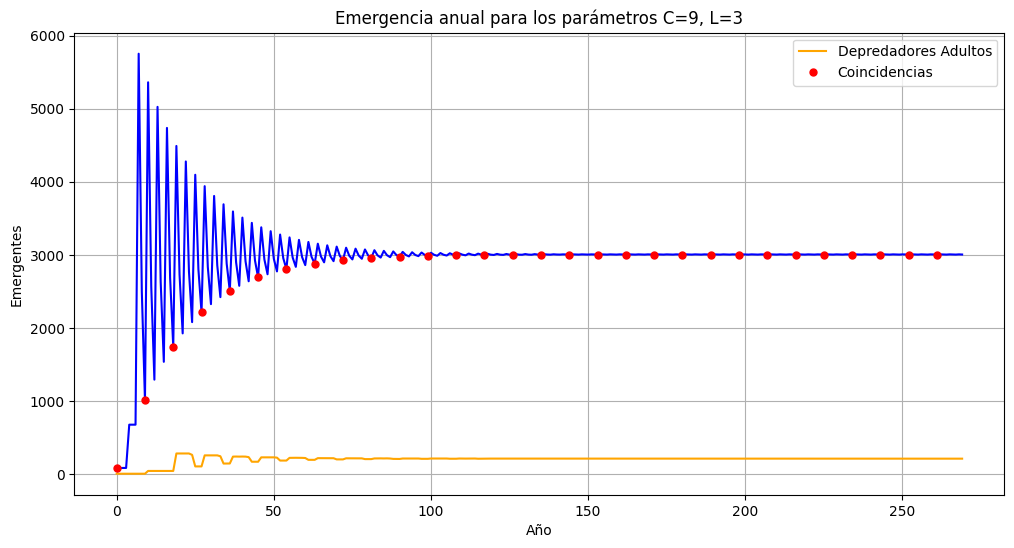

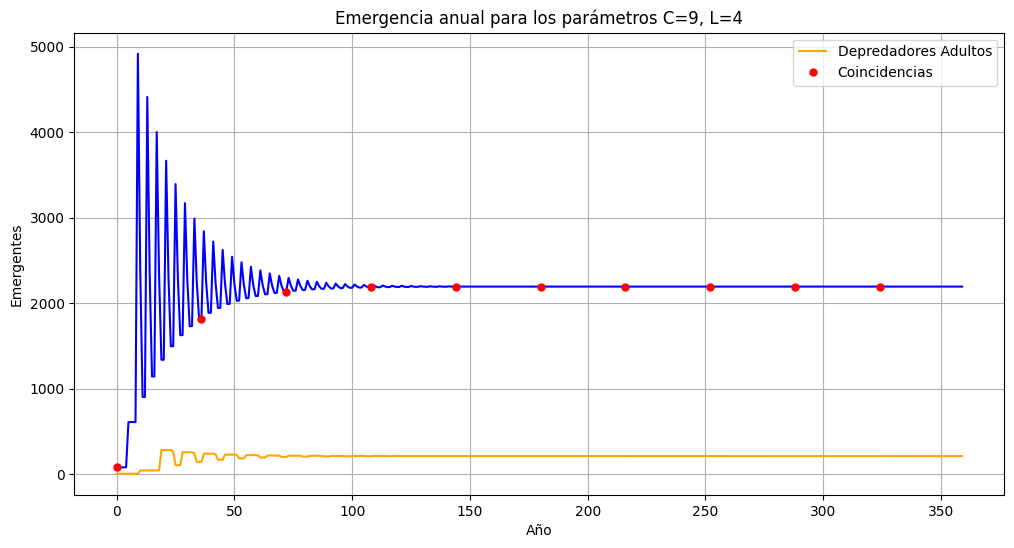

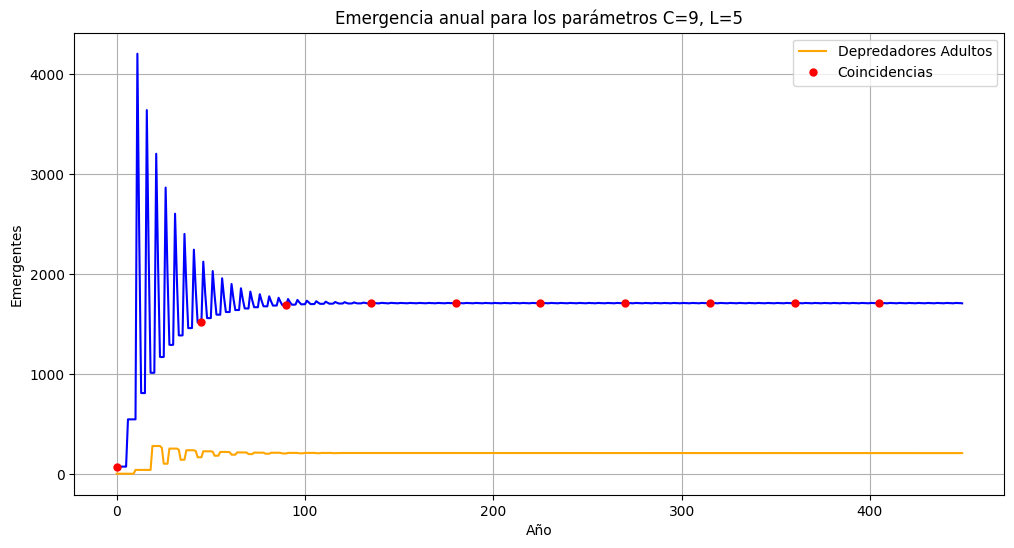

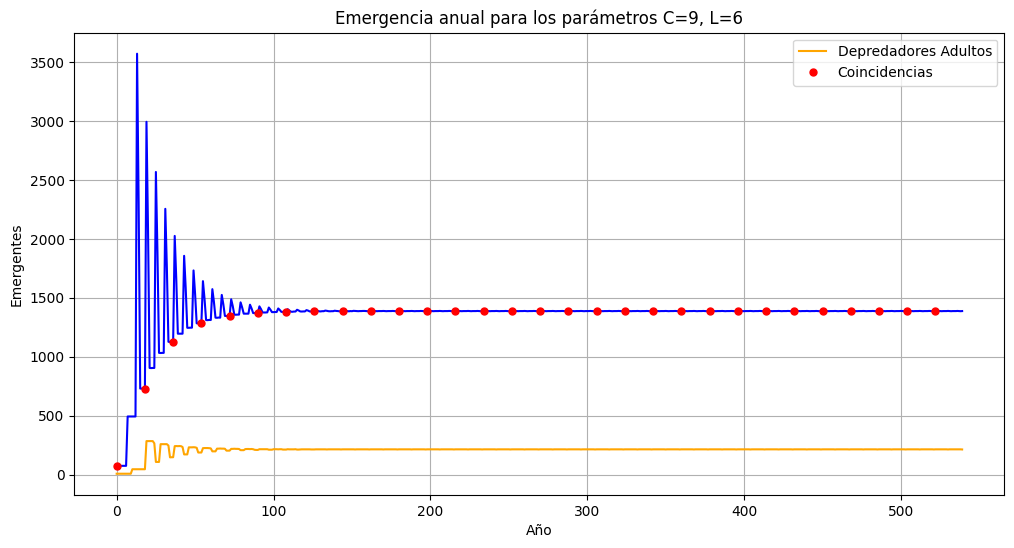

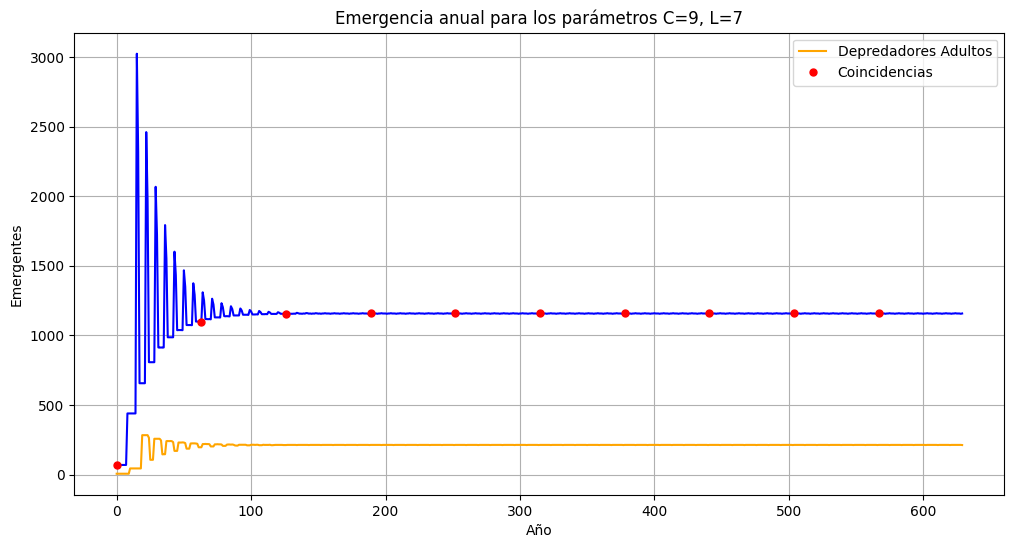

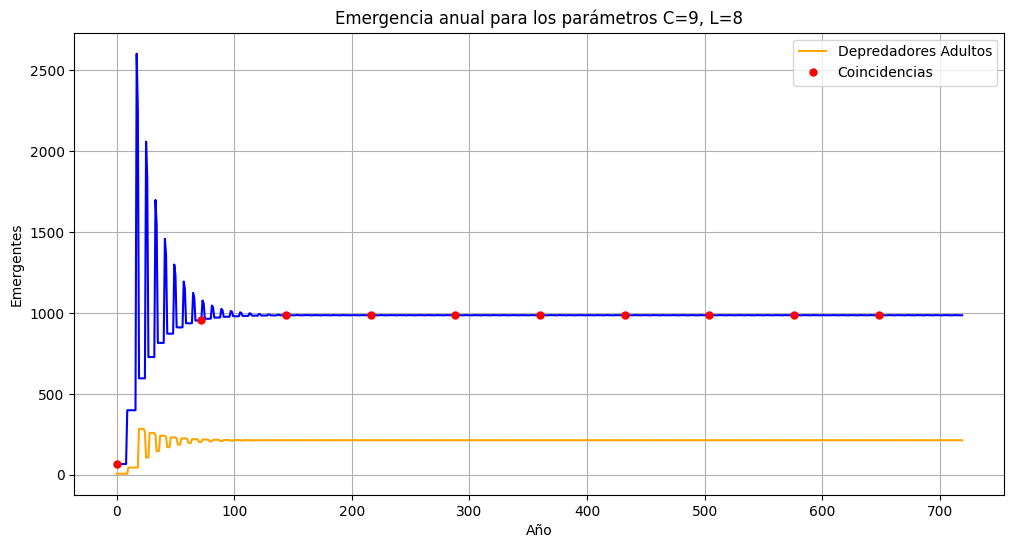

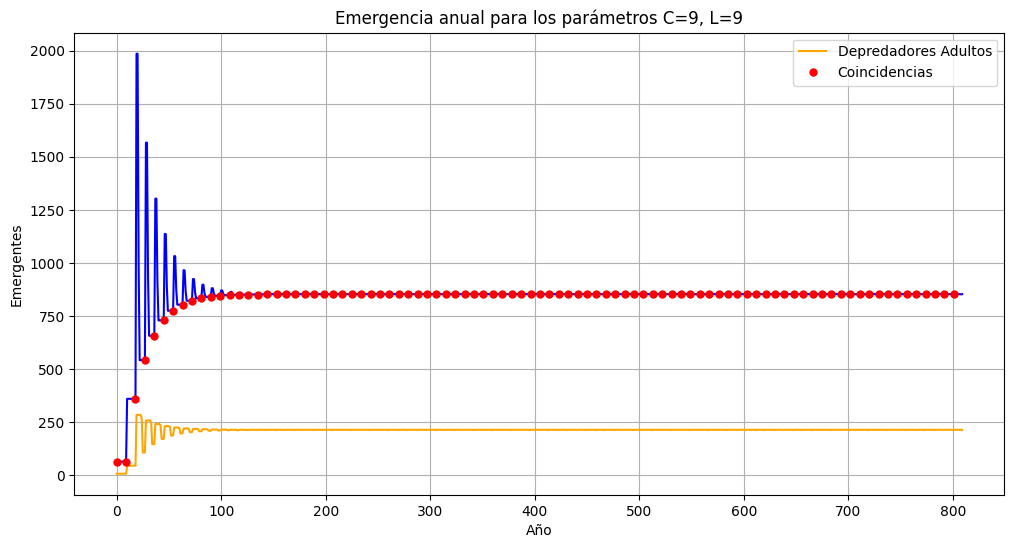

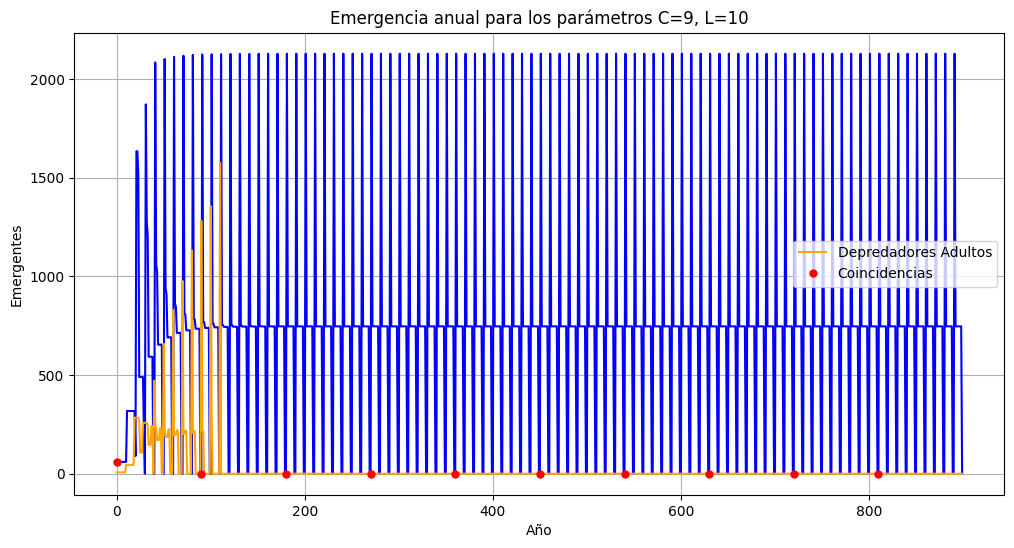

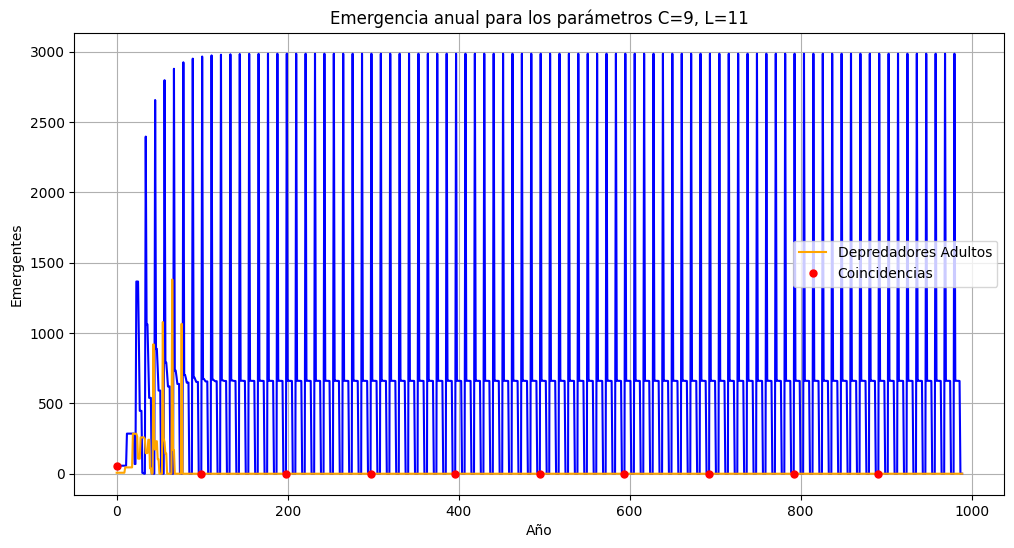

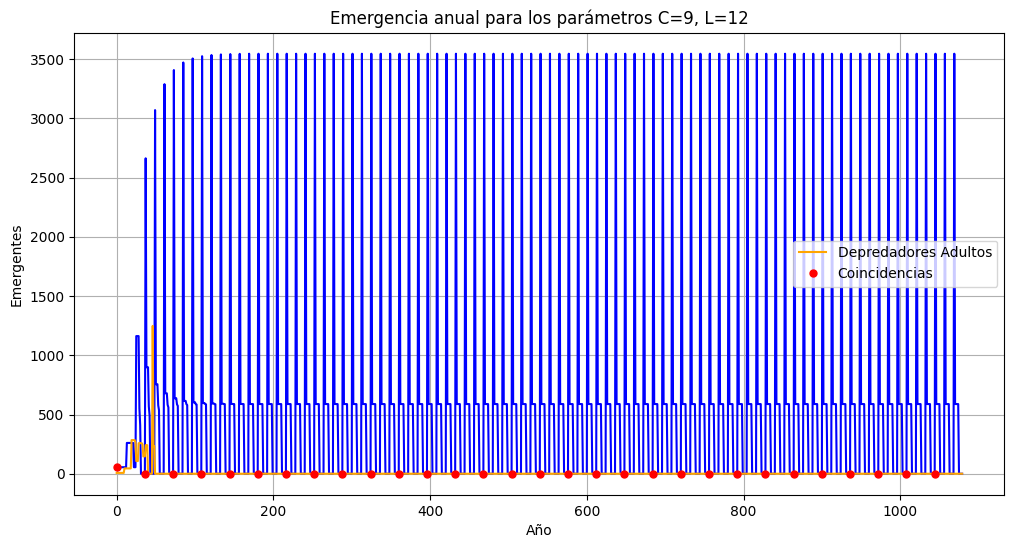

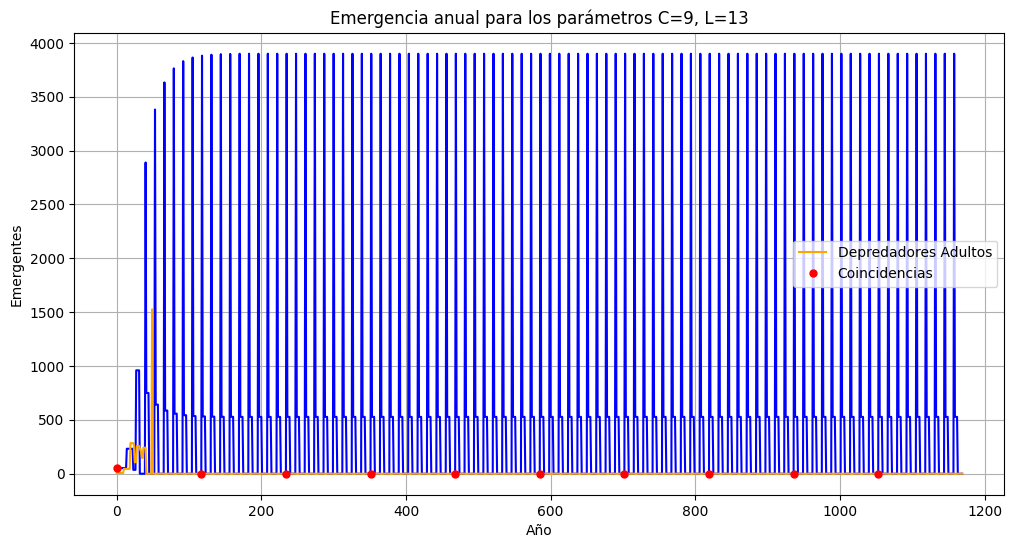

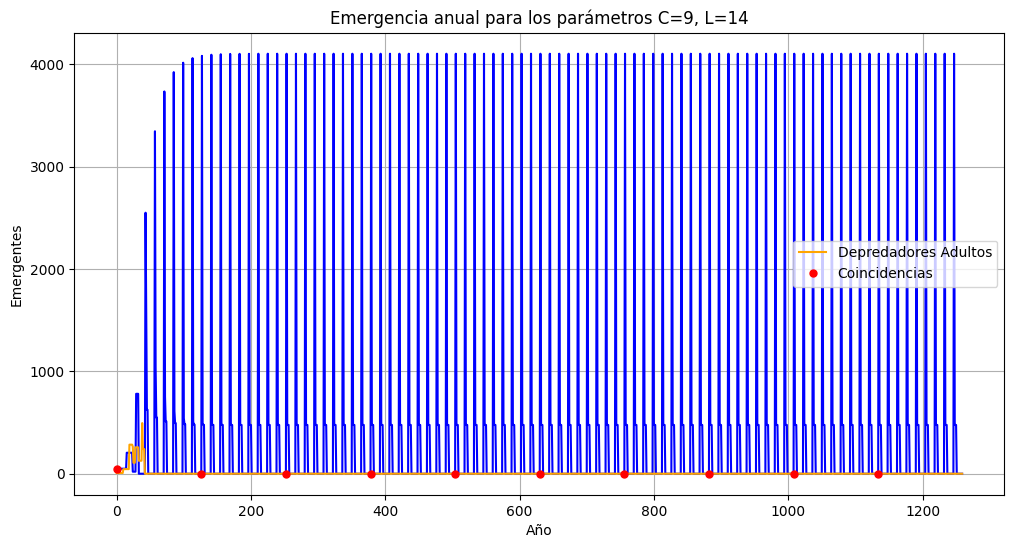

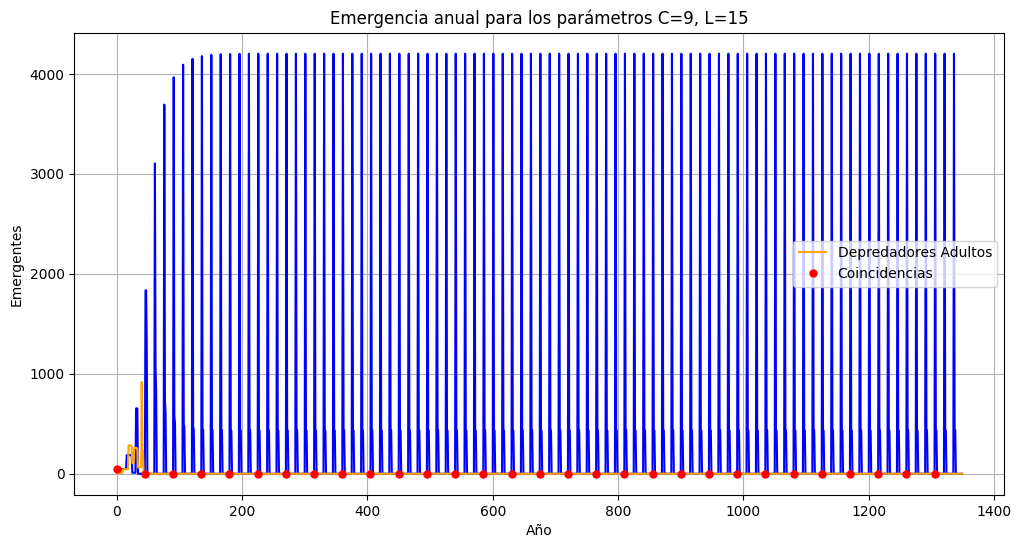

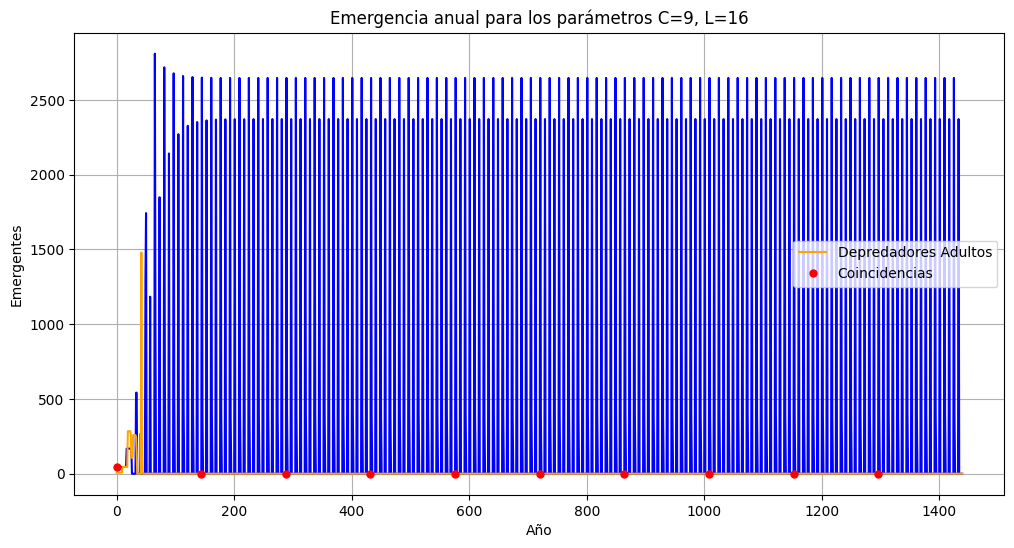

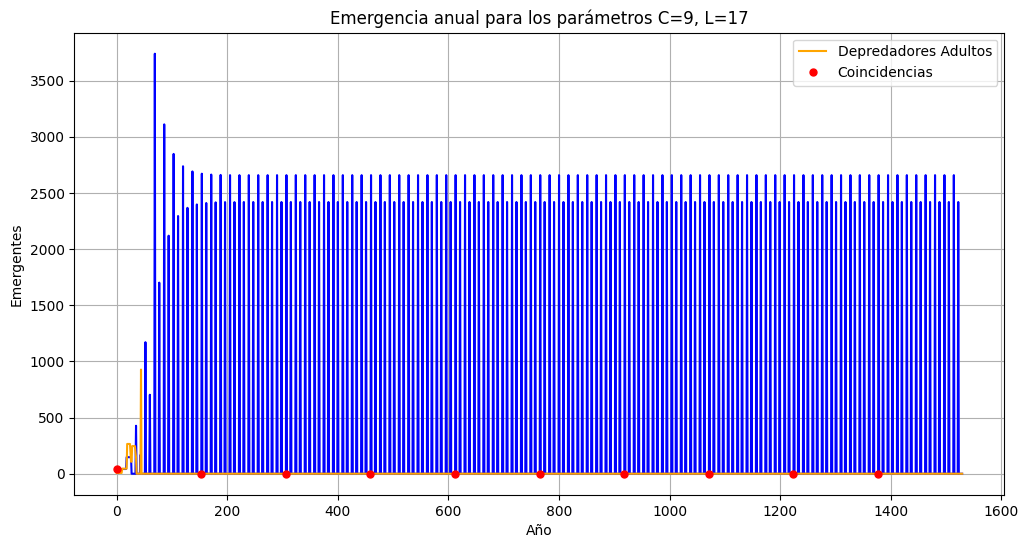

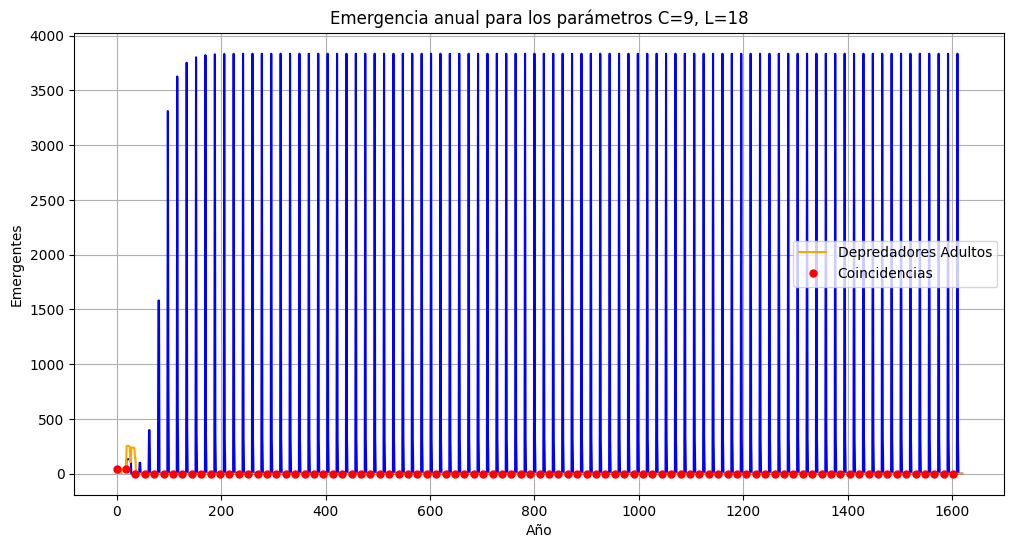

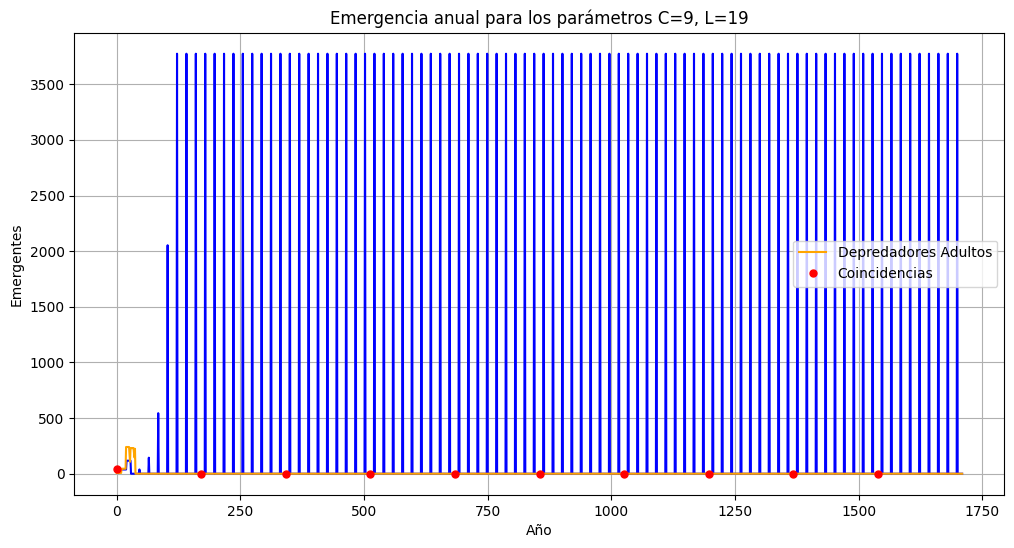

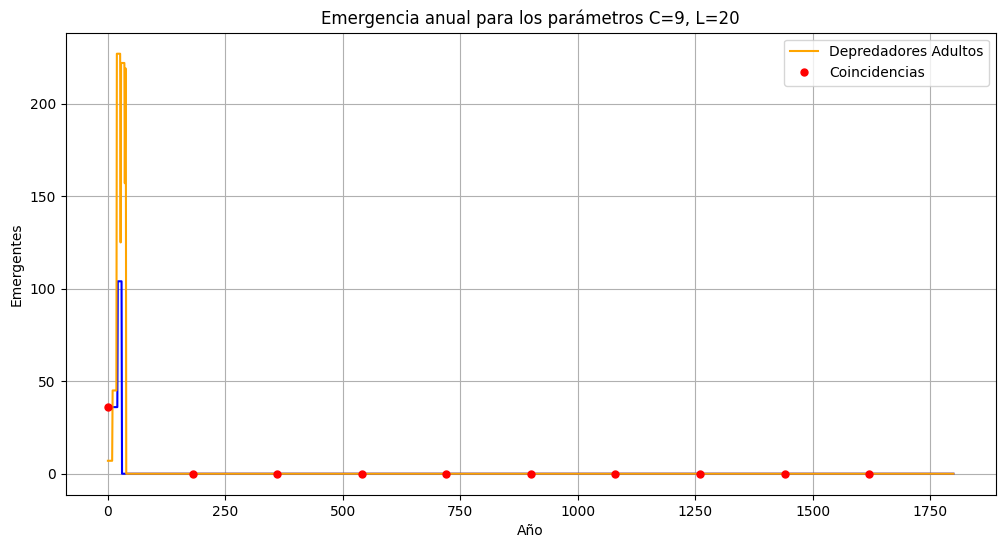

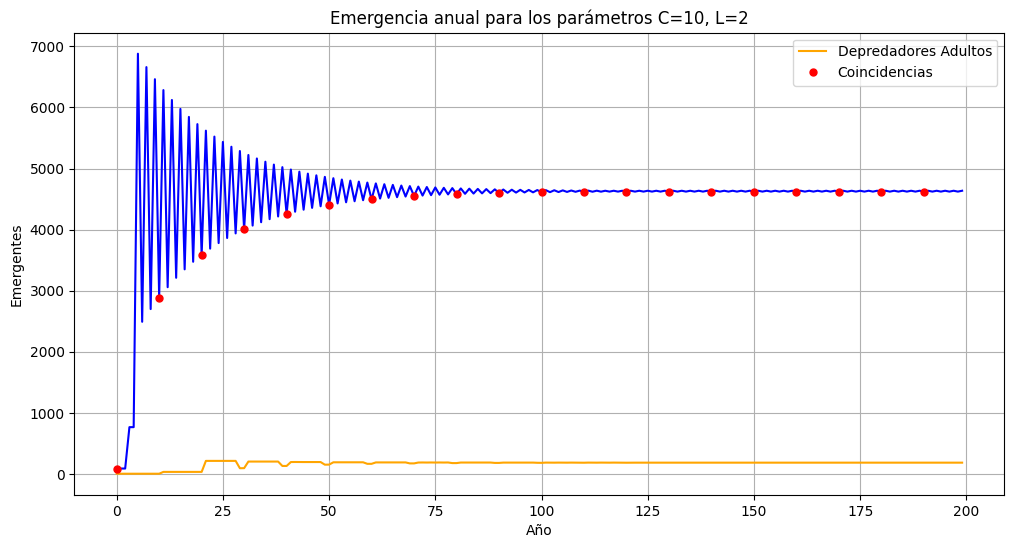

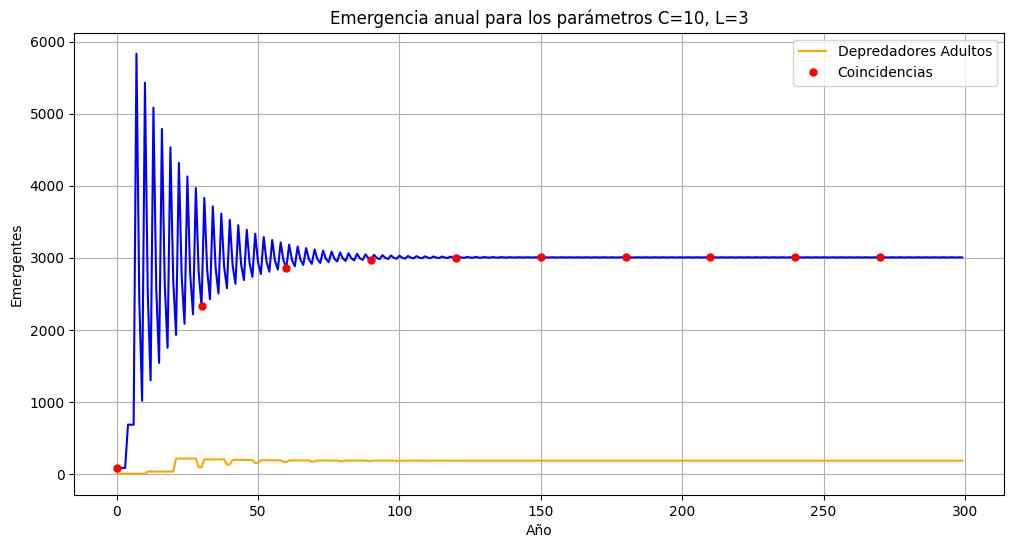

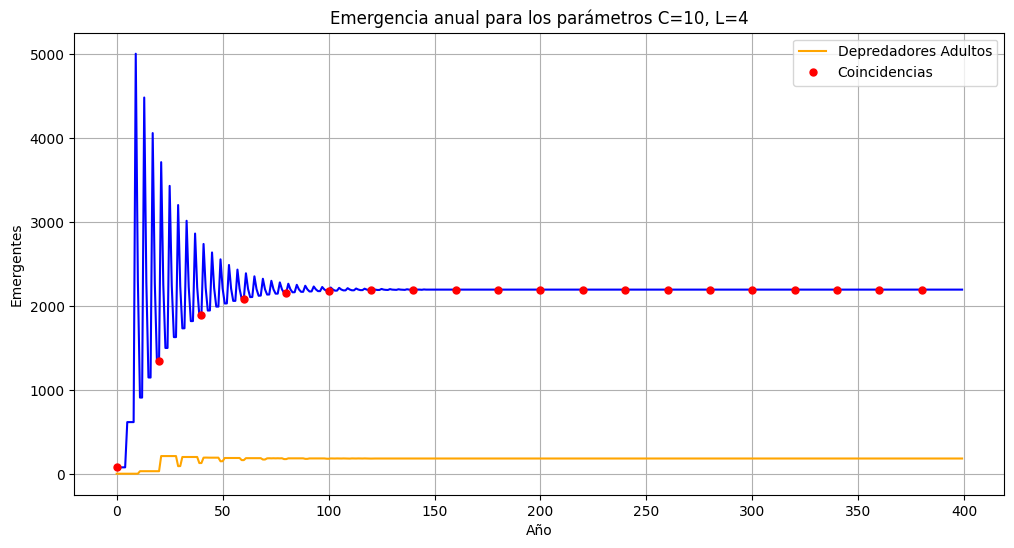

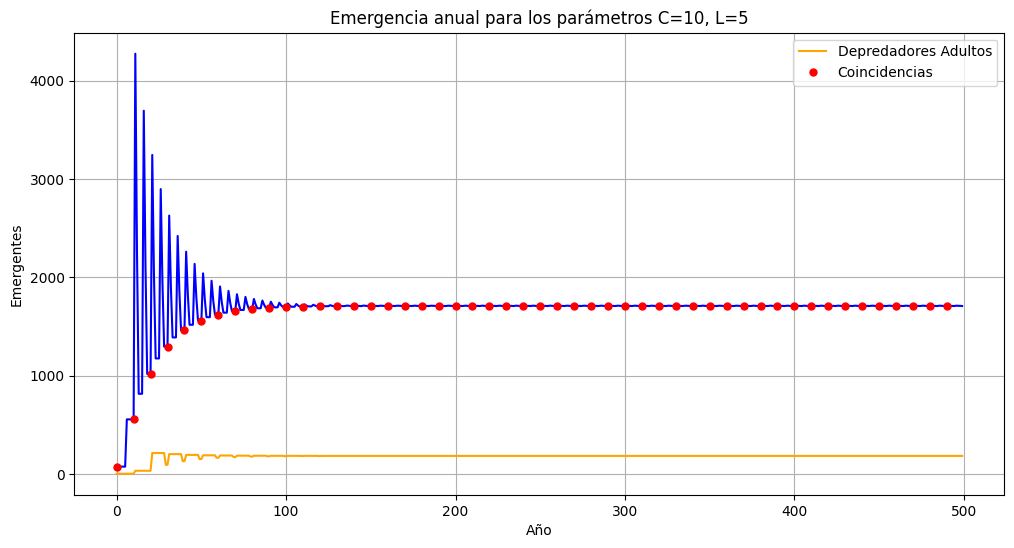

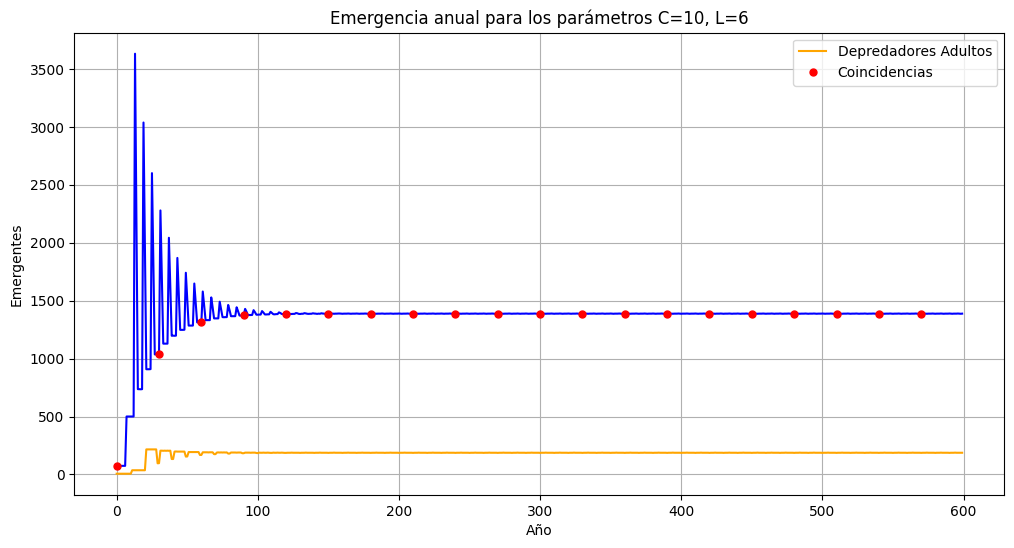

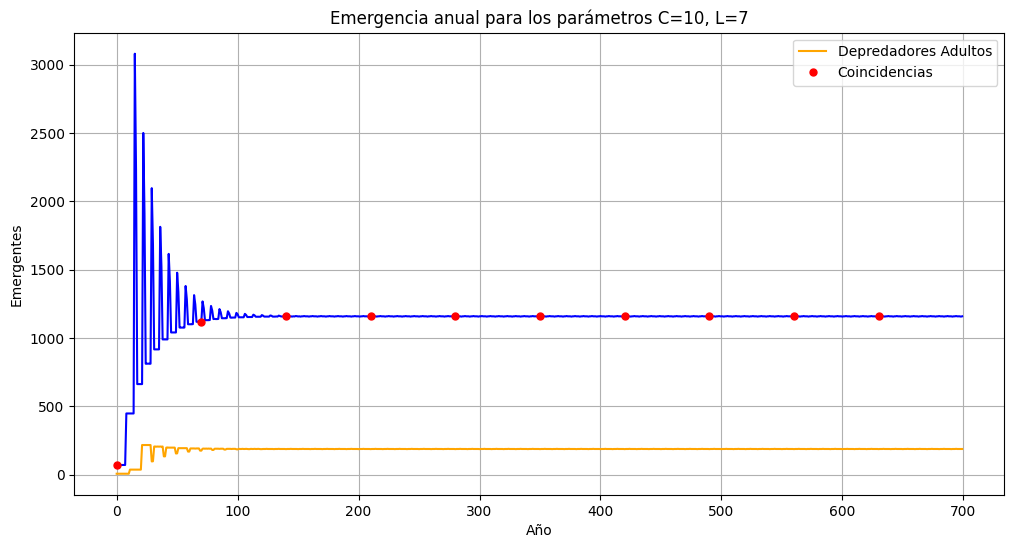

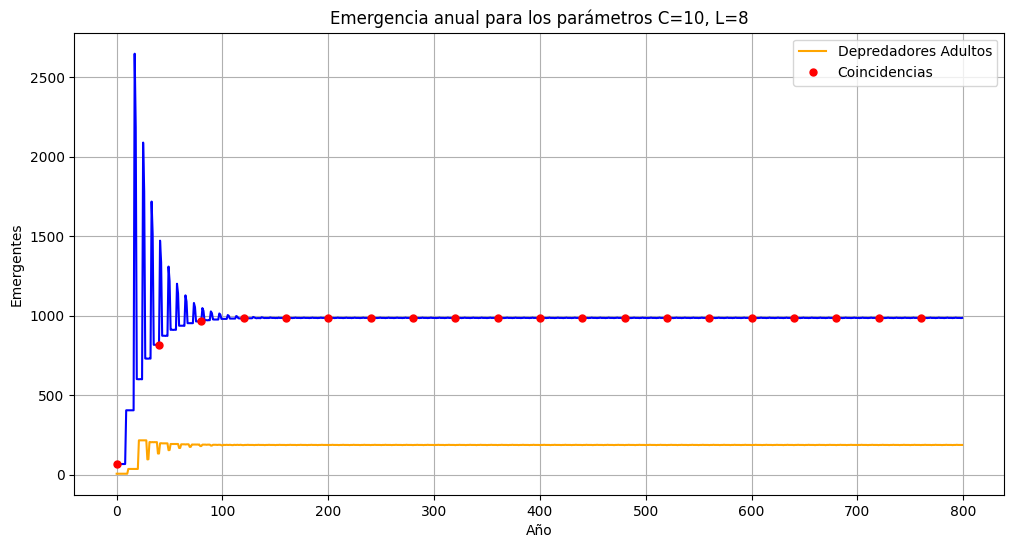

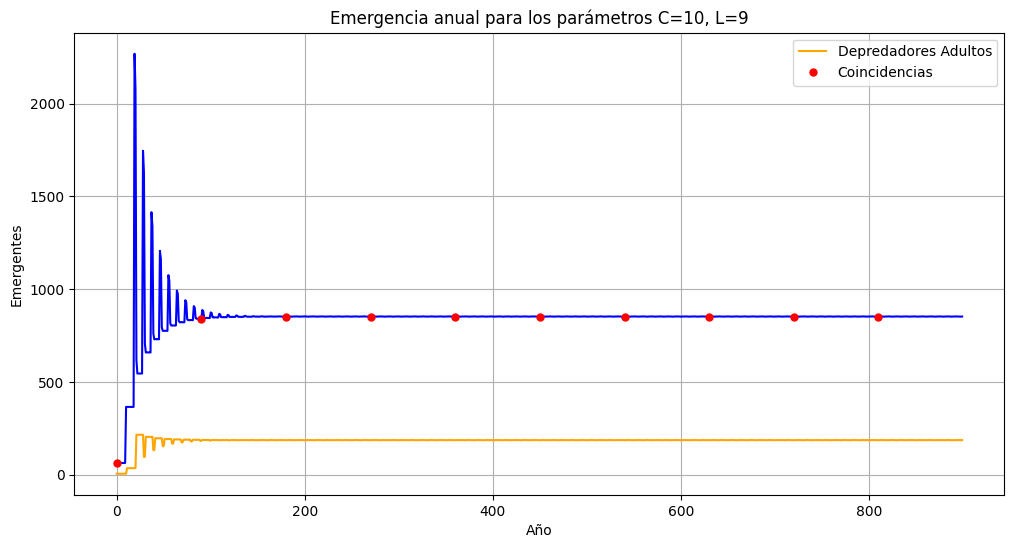

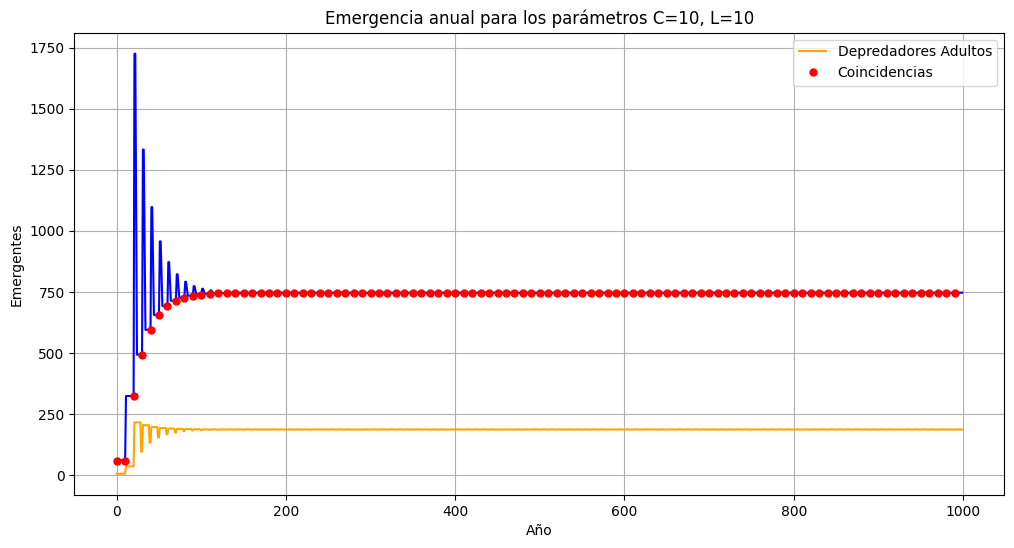

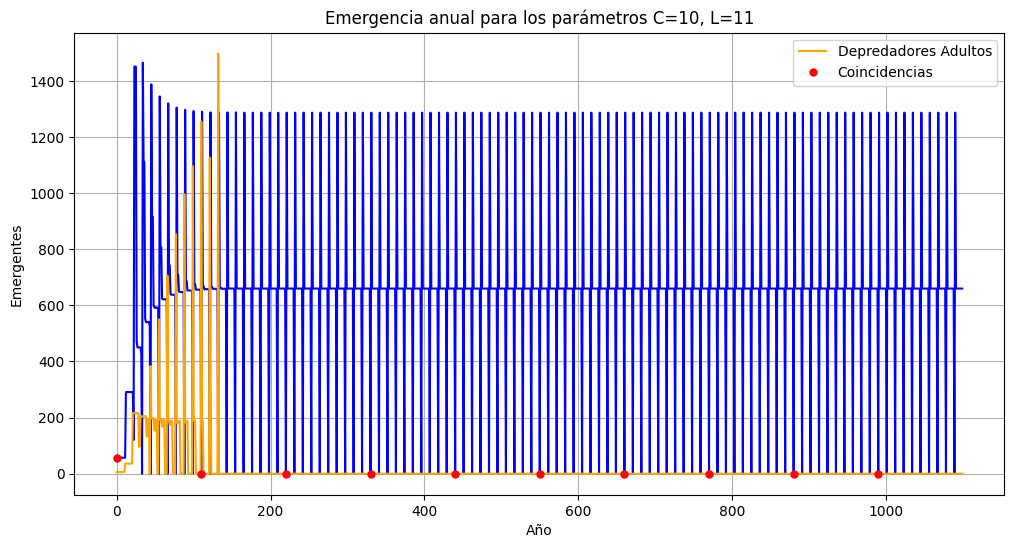

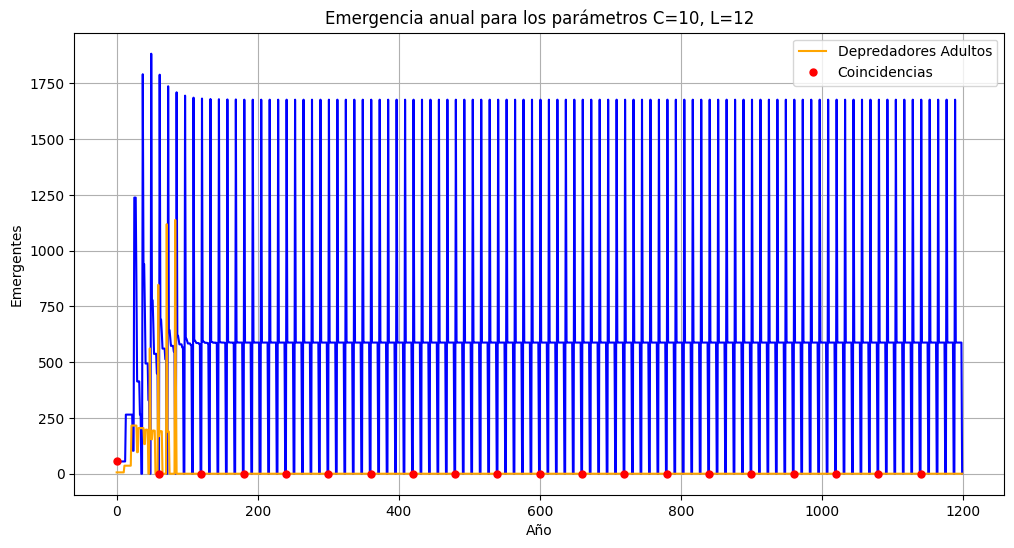

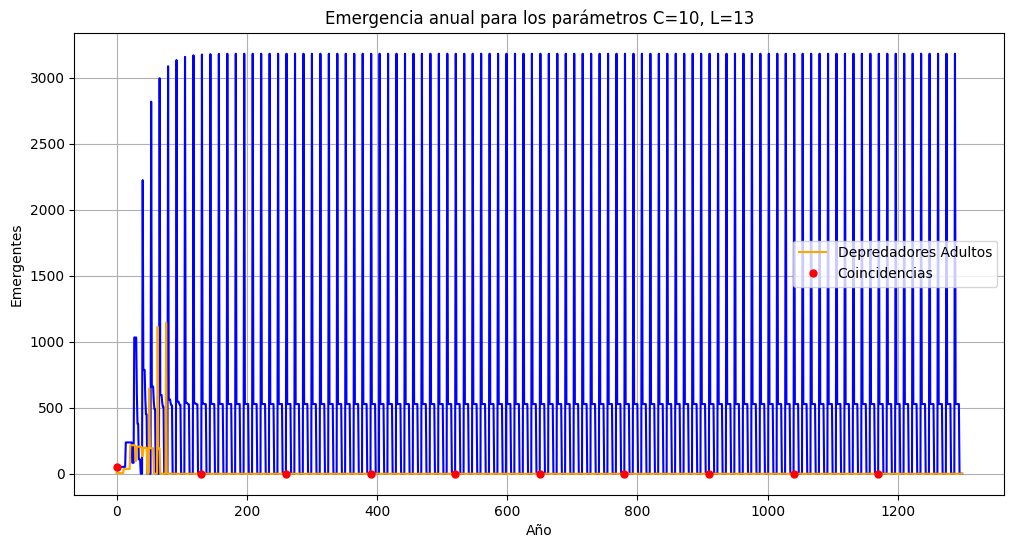

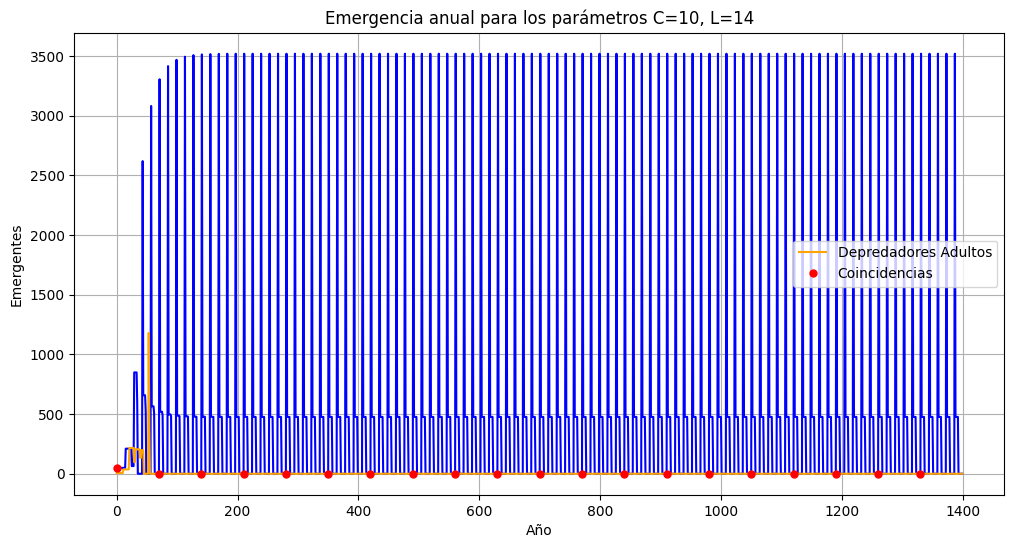

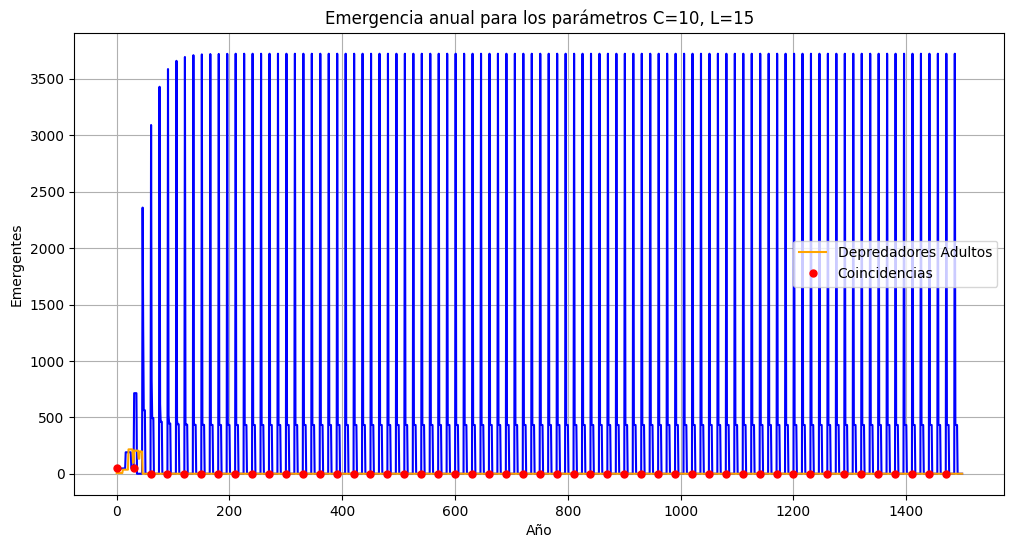

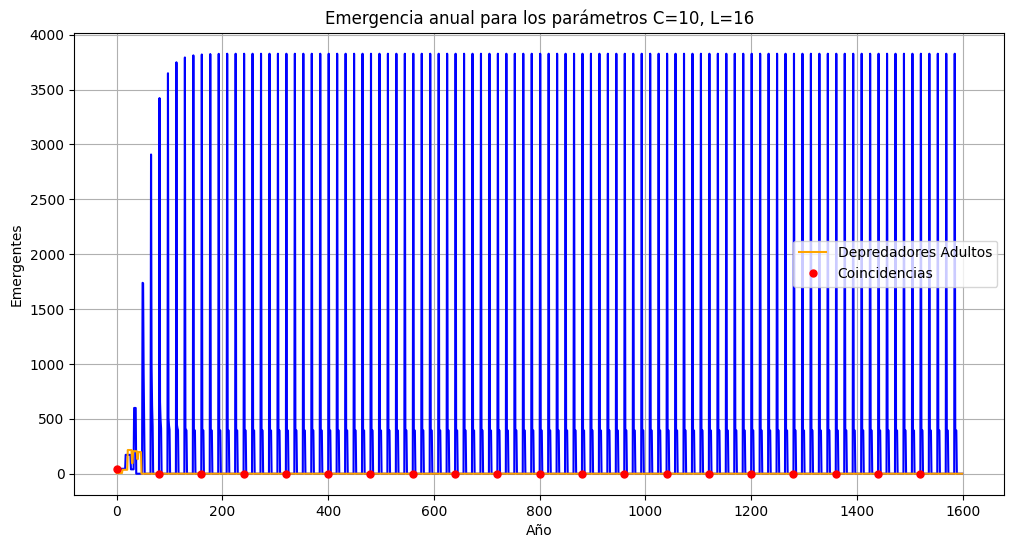

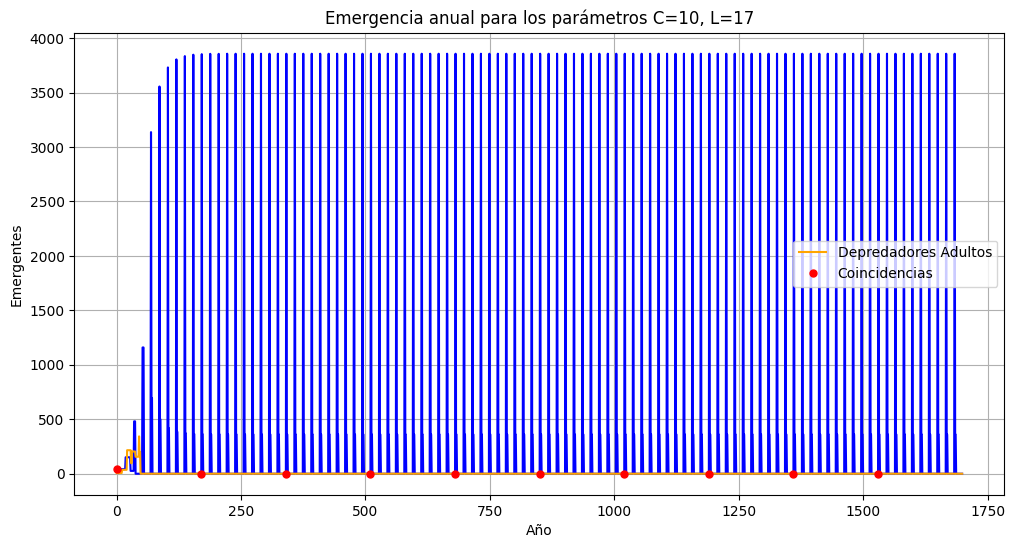

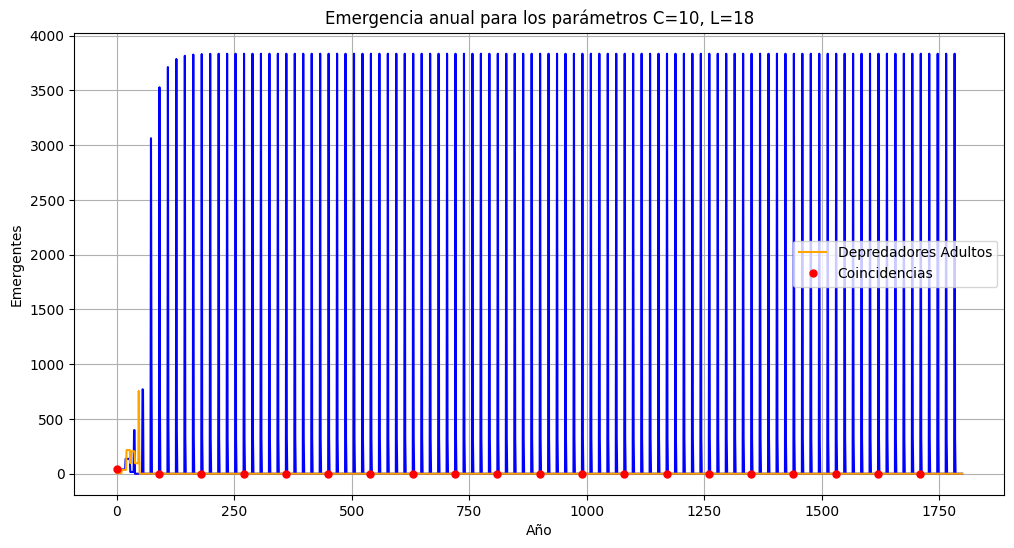

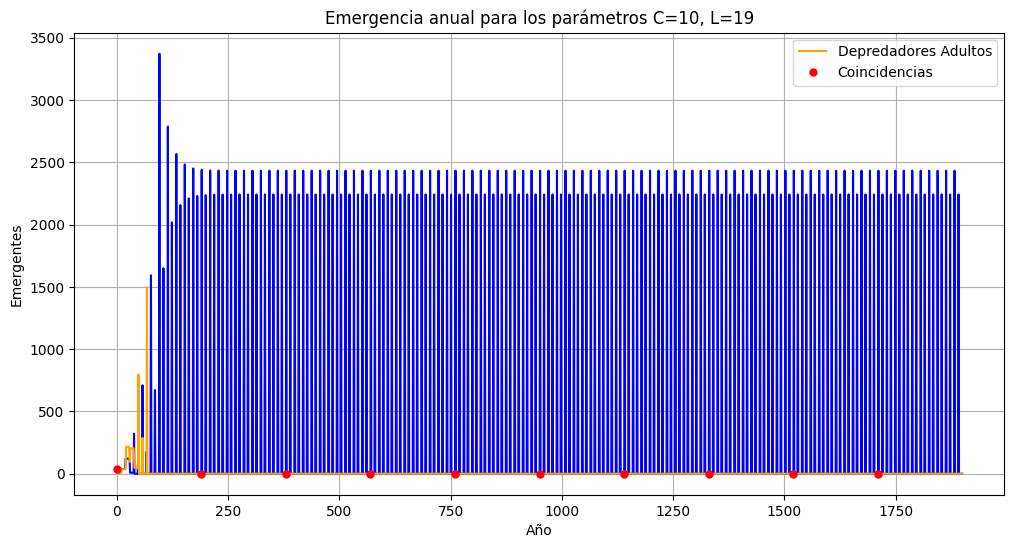

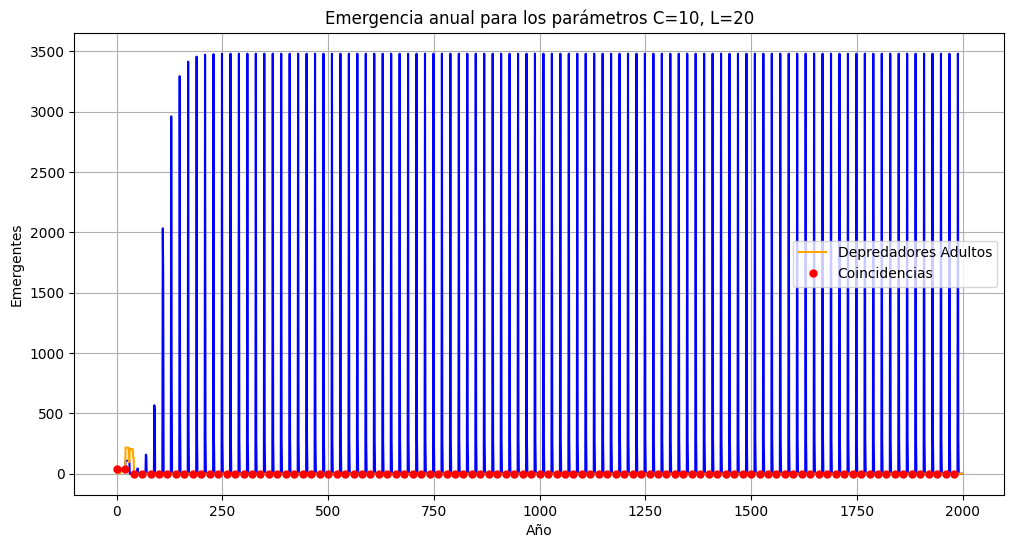

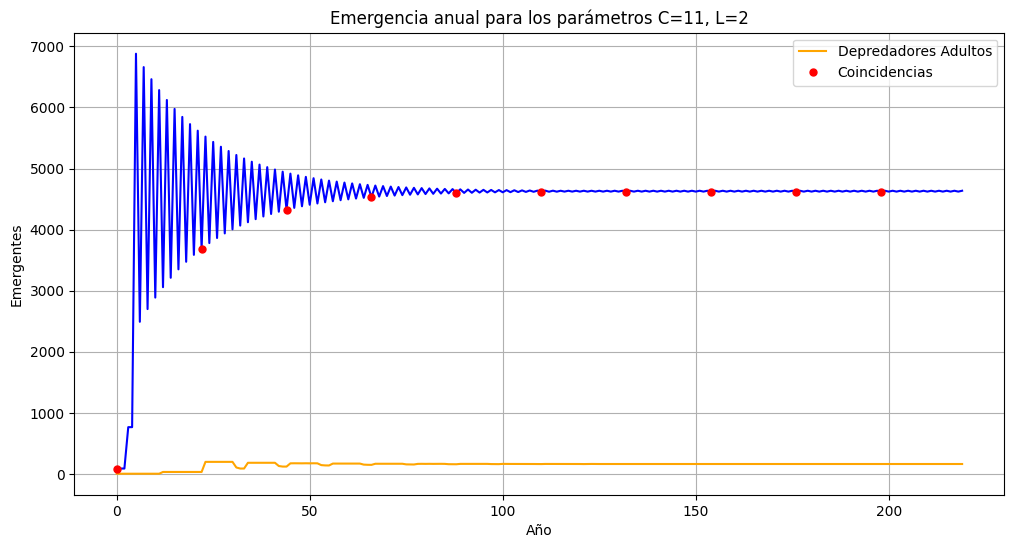

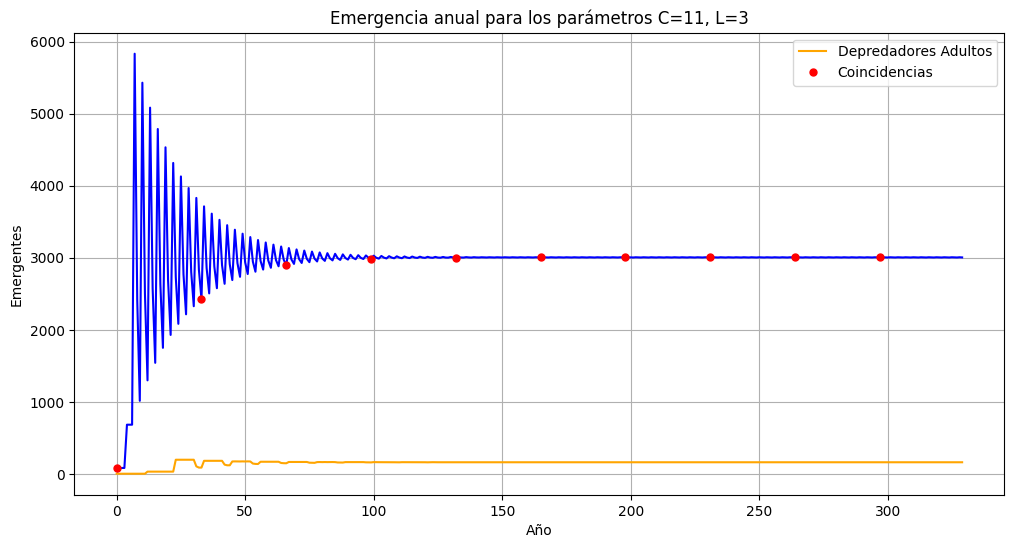

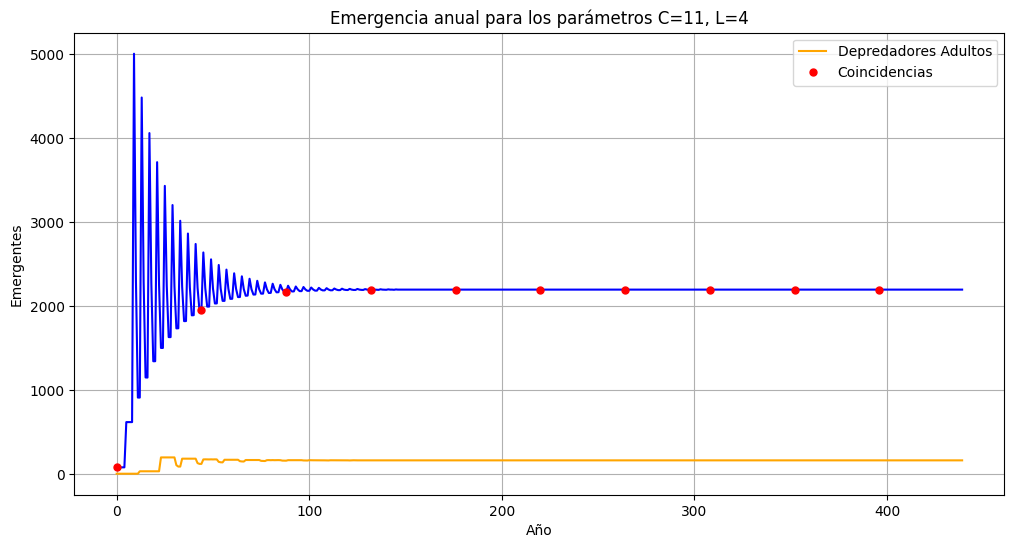

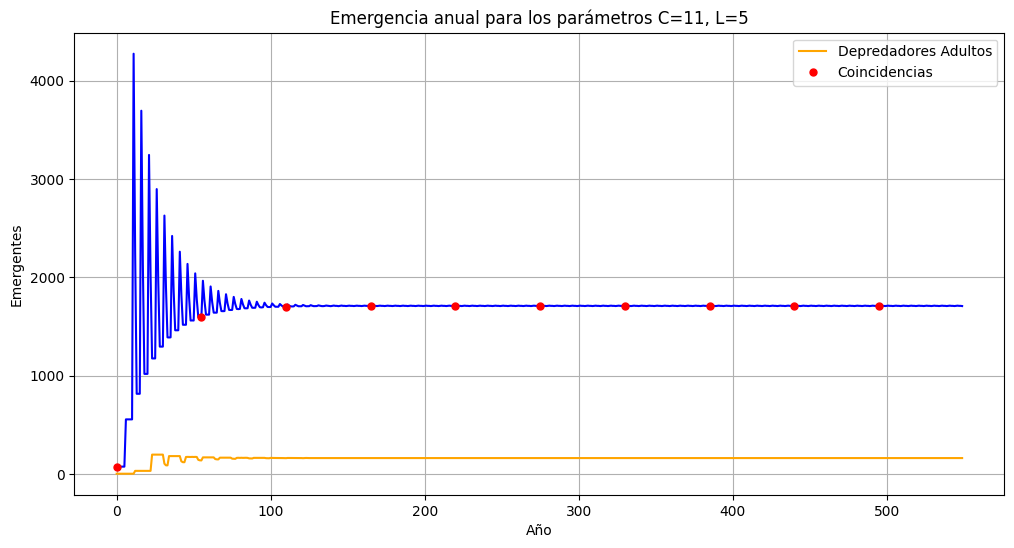

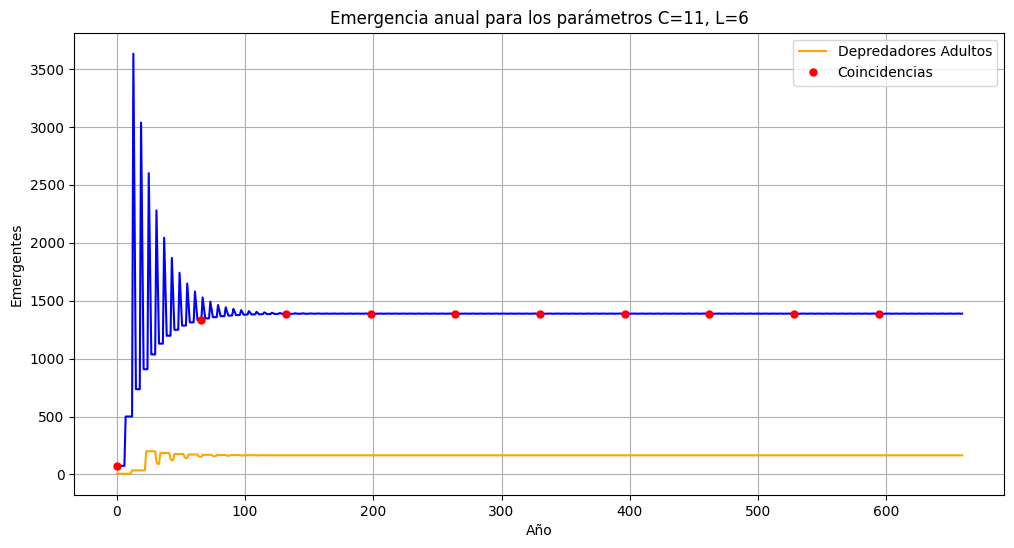

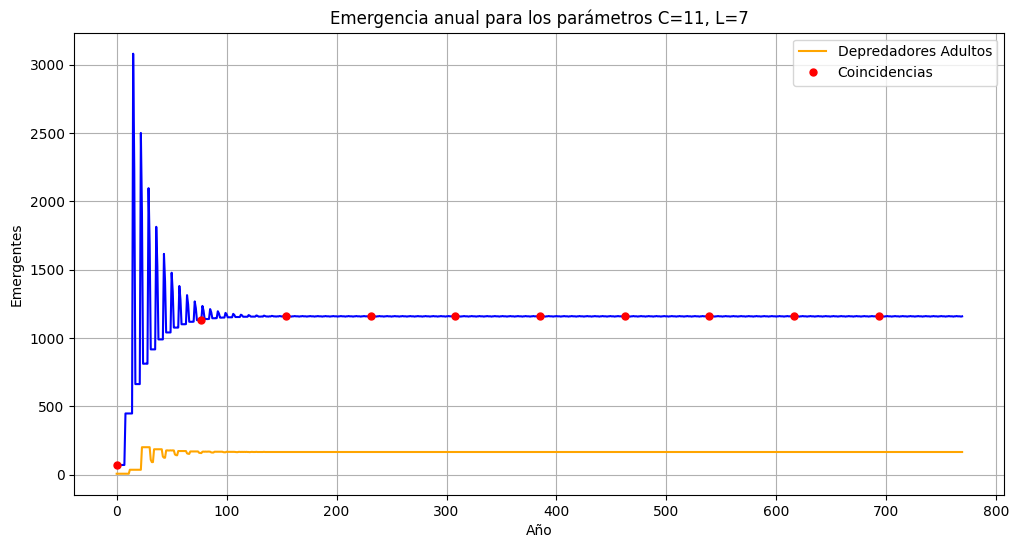

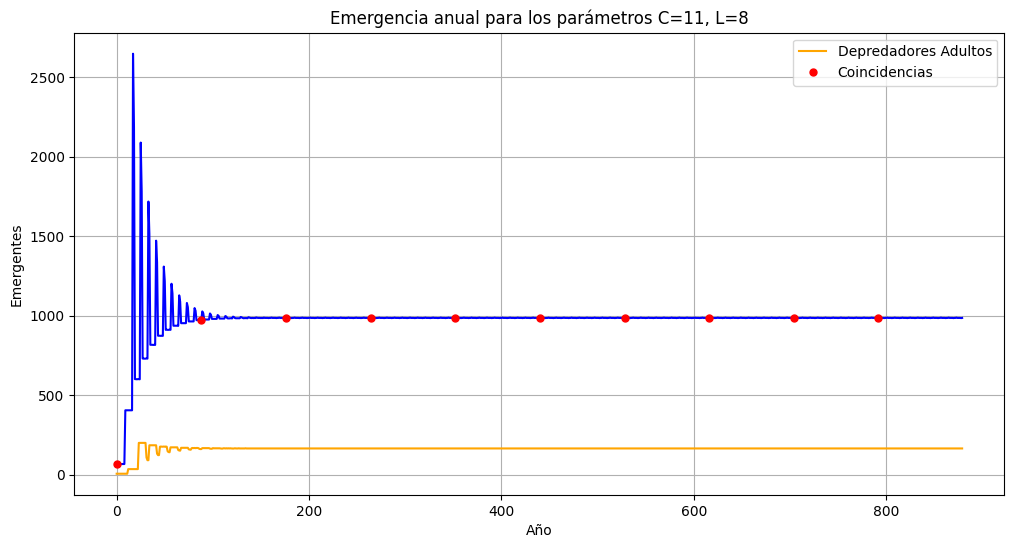

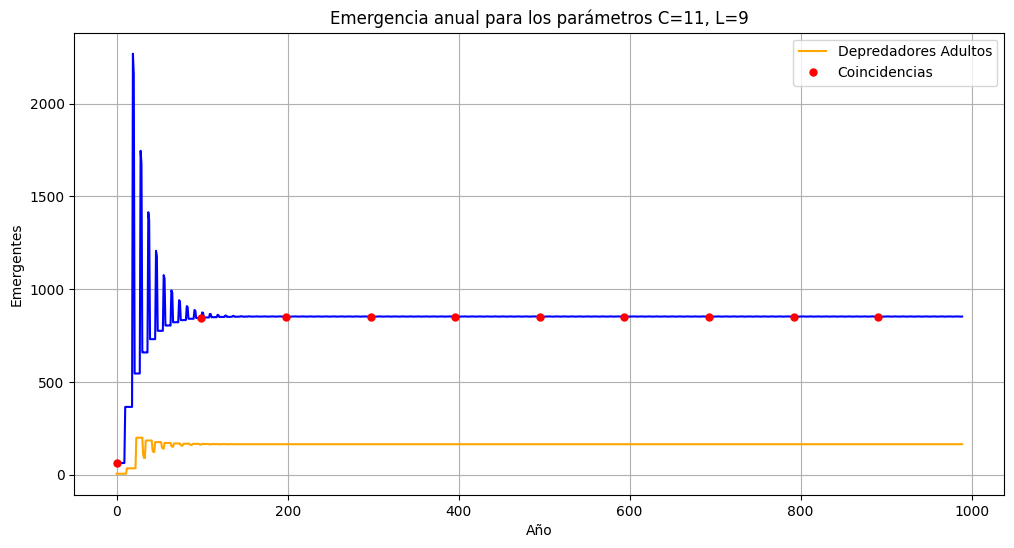

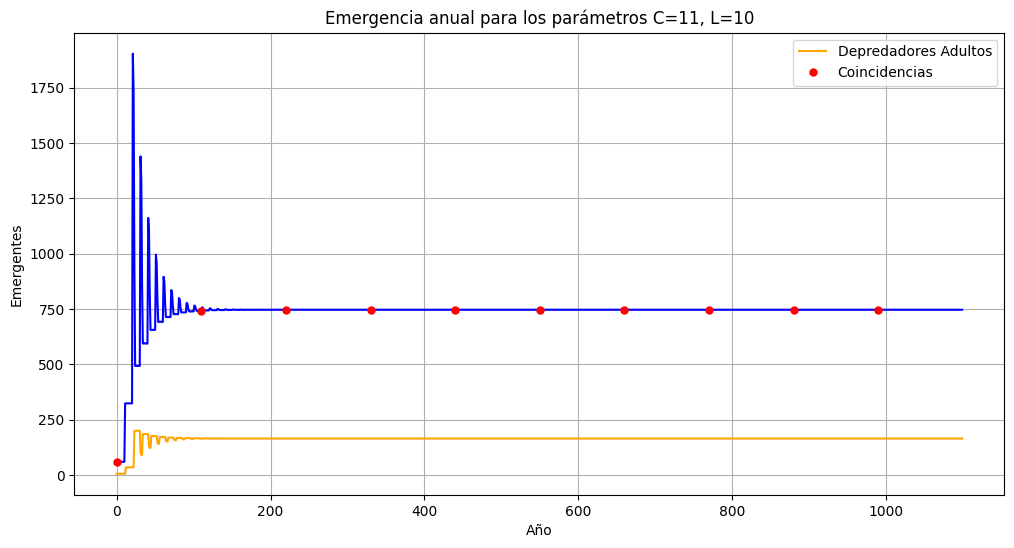

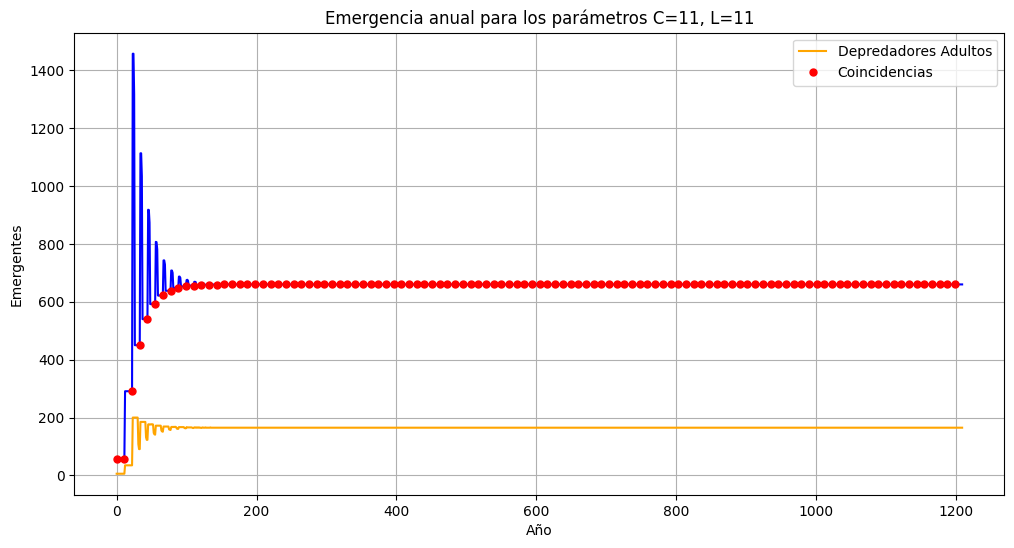

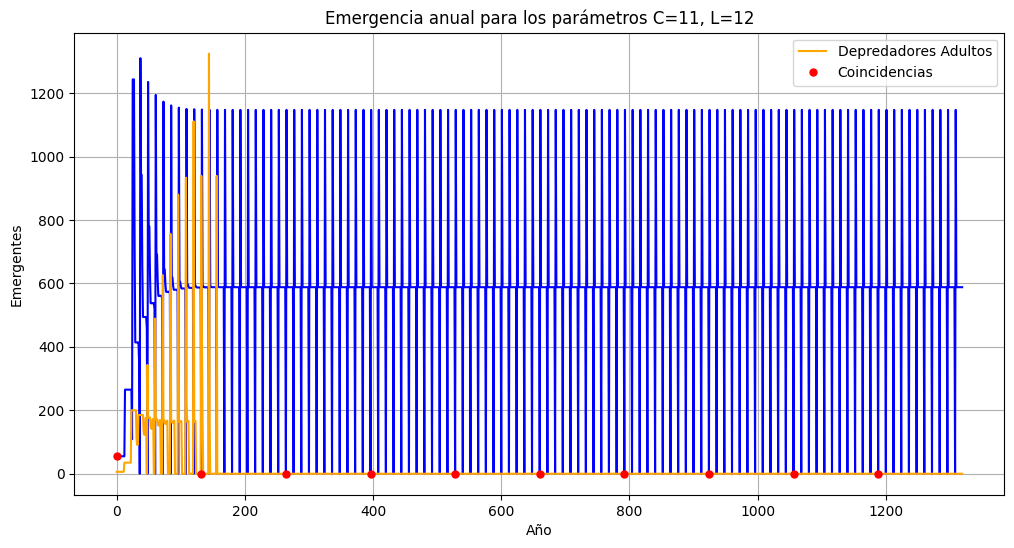

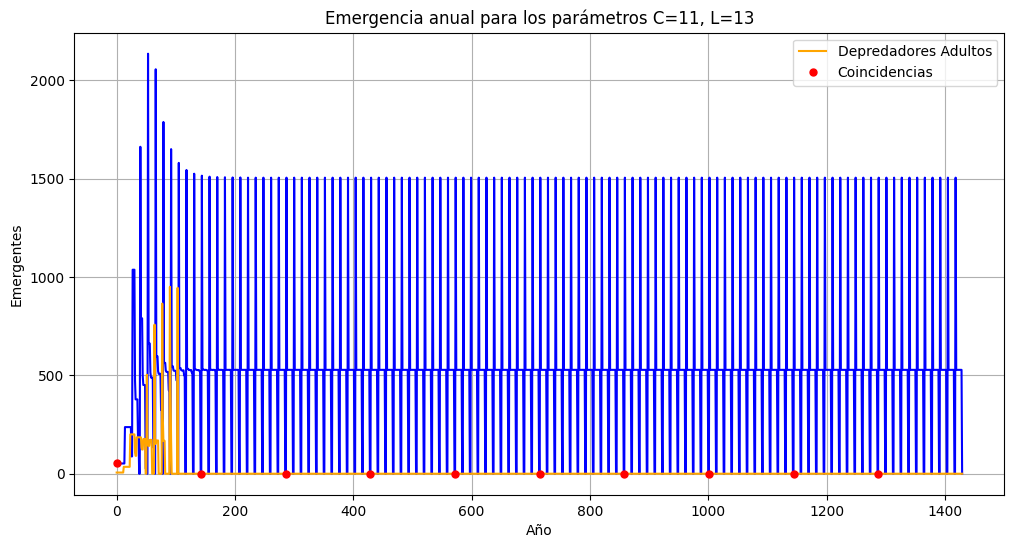

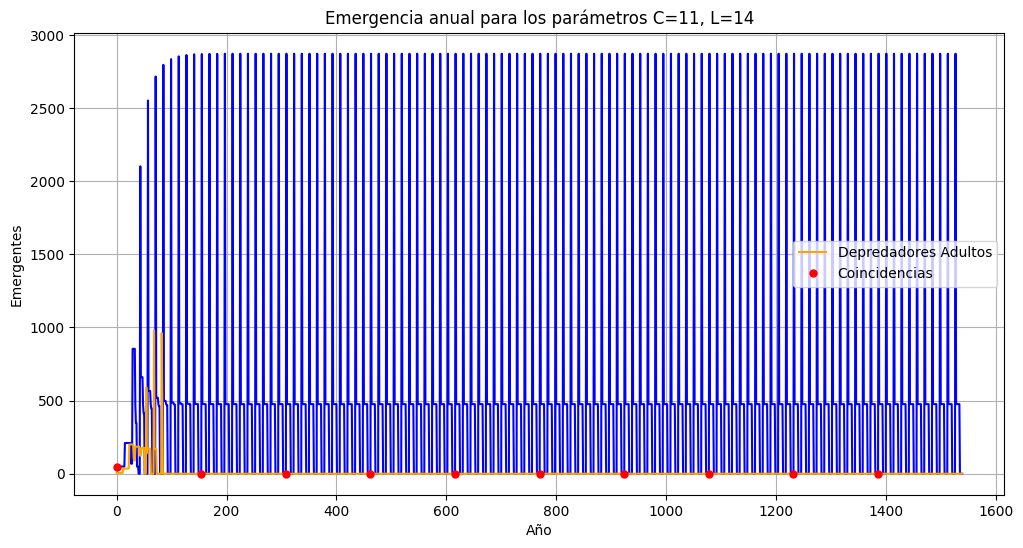

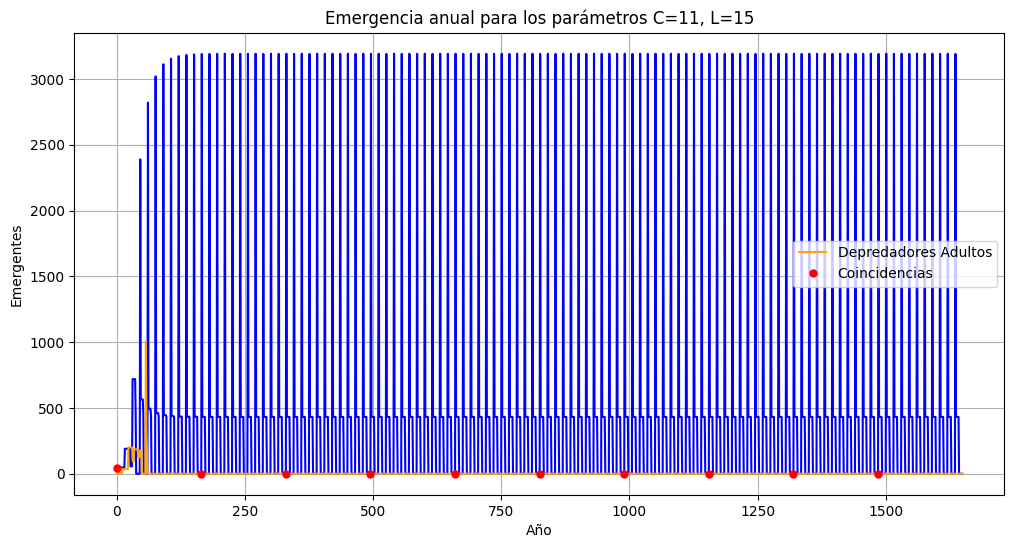

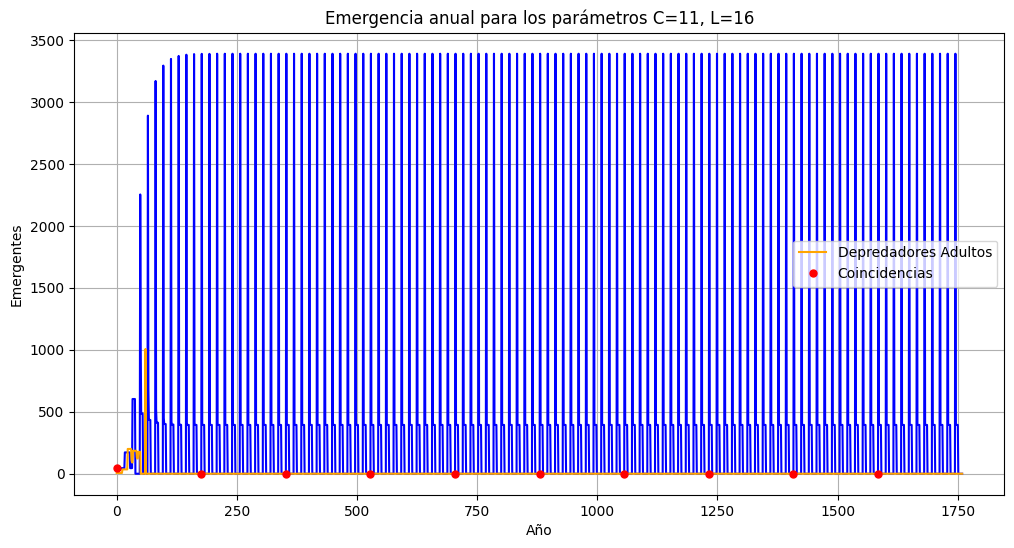

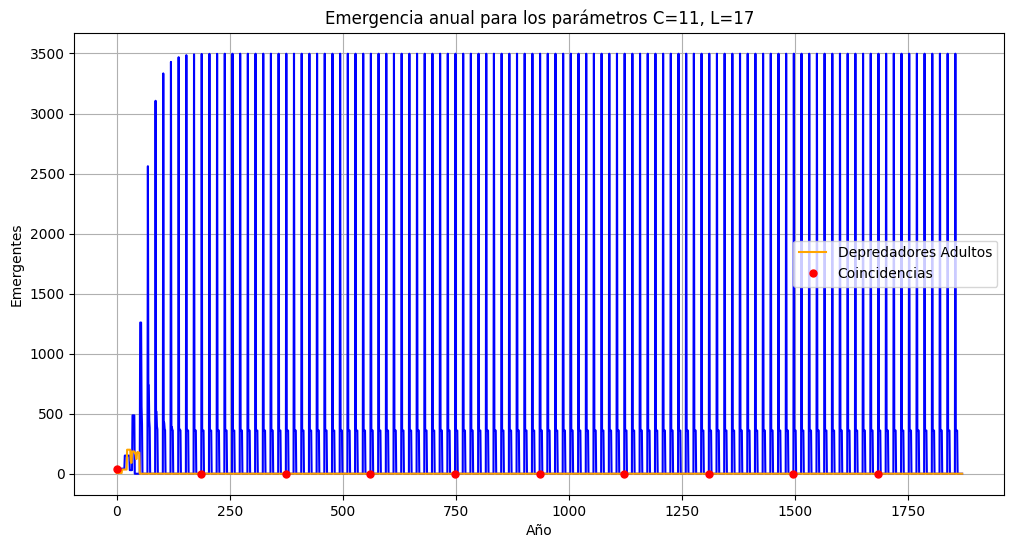

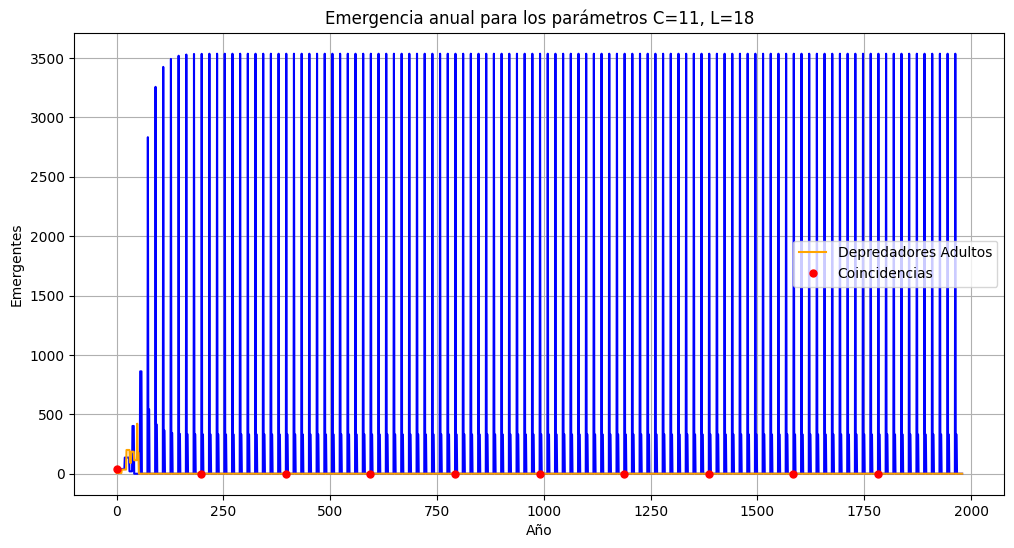

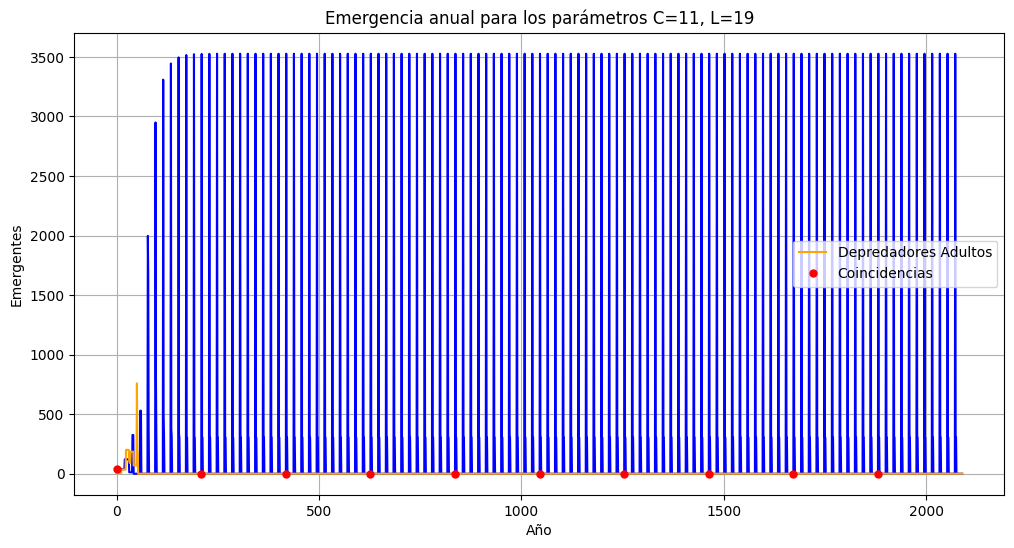

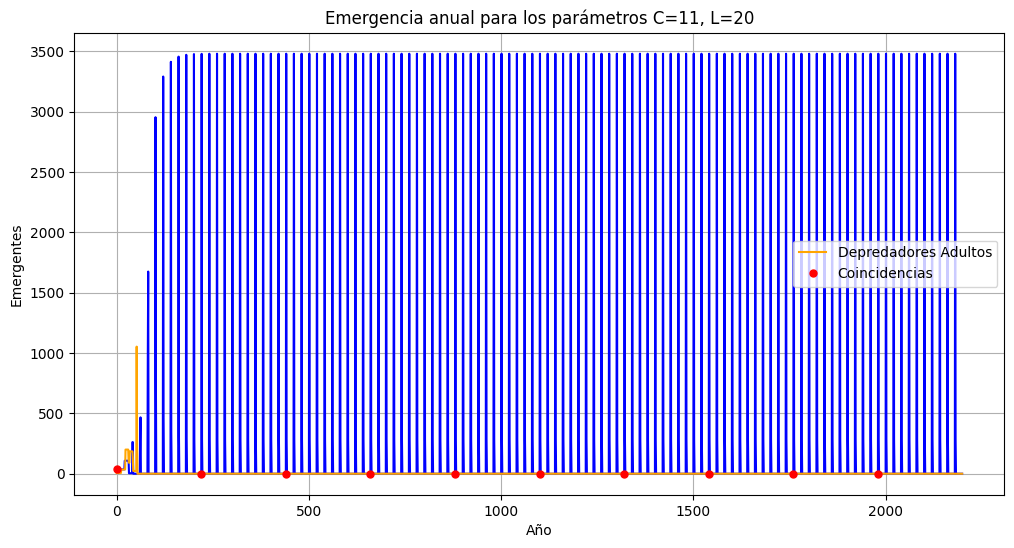

In [34]:
for ciclo_depredadores, ciclo_cicadas in it.product(C, L):
    df = simulacion(x0, y0, K, Q, k, alfa, ciclo_cicadas, ciclo_depredadores, f, g)
    graficar(df, ciclo_depredadores, ciclo_cicadas)